In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 5.4MB/s 
     |████████████████████████████████| 266kB 17.5MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 276kB 24.3MB/s 
     |████████████████████████████████| 6.8MB 29.8MB/s 
     |████████████████████████████████| 13.9MB 273kB/s 
     |████████████████████████████████| 148.9MB 79kB/s 
     |████████████████████████████████| 174kB 47.2MB/s 
     |████████████████████████████████| 1.8MB 44.8MB/s 
     |████████████████████████████████| 66.3MB 60kB/s 
     |████████████████████████████████| 1.6MB 40.6MB/s 
     |████████████████████████████████| 3.1MB 33.7MB/s 
     |████████████████████████████████| 604kB 38.5MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 2.1MB 42.5MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
 

In [ ]:
from pycaret.classification import *

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/Notebooks/desafio_train.csv'
df_rec_trei = pd.read_csv(url)


In [3]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/Notebooks/desafio_test.csv'
df_rec_test= pd.read_csv(url)

In [4]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False


In [5]:
df_rec_test.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,s,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.000000,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,y,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.005597,0.004738,8.343705e-06,0.001462,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,z,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.000000,7.473043e-05,0.000659,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,z,0.022149,0.042115,0.143274,0.052107,0.005284,0.0,0.042115,0.056179,0.044911,0.004436,0.0,0.145176,0.003389,0.000693,1.104422e-03,0.003108,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.3091,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,p,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.000000,0.000000e+00,0.000387,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''df_rec_trei = pd.read_csv('desafio_train.csv')
df_rec_test = pd.read_csv('desafio_test.csv')

In [6]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False


In [7]:
df_rec_test.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,s,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.000000,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,y,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.005597,0.004738,8.343705e-06,0.001462,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,z,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.000000,7.473043e-05,0.000659,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,z,0.022149,0.042115,0.143274,0.052107,0.005284,0.0,0.042115,0.056179,0.044911,0.004436,0.0,0.145176,0.003389,0.000693,1.104422e-03,0.003108,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.3091,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,p,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.000000,0.000000e+00,0.000387,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_rec_trei.shape

(11033, 63)

In [9]:
df_rec_test.shape

(1000, 62)

In [10]:
df_rec_trei[['target']].count()


target    11033
dtype: int64

In [11]:
#verificando os tipos
df_rec_trei.dtypes

id          int64
cnae2       int64
rf2        object
md1       float64
md2       float64
           ...   
ind40     float64
ind41     float64
ind42     float64
ind43     float64
target       bool
Length: 63, dtype: object

In [12]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [8]:
#função mostra isna

def mostra_isna(df):
    l_rec_trei = df.columns
    d = 0
    for i in l_rec_trei:
        f = df[i].isna().sum()
        g = df[i].dtypes
        if f != 0:
            d = d + 1
            print('{} = {}: {}'.format(i, df[i].isna().sum(),g))
    print('qt de colunas con isna:{}'.format(d))
    
    

In [9]:
#função mostra sem isna
def mostra_sem_isna(df):
    l_rec_trei = df.columns
    d = 0
    for i in l_rec_trei:
        f = df[i].isna().sum()
        g = df[i].dtypes
        if f == 0:
            d = d + 1
            print('{} = {}: {}'.format(i, df[i].isna().sum(), g))
    print('qt de colunas con isna:{}'.format(d))
    

    

check no df de teste

In [10]:
mostra_sem_isna(df_rec_test)

id = 0: int64
cnae2 = 0: int64
rf2 = 0: object
md1 = 0: float64
md2 = 0: float64
md3 = 0: float64
md4 = 0: float64
md5 = 0: float64
md6 = 0: float64
md7 = 0: float64
md8 = 0: float64
md9 = 0: float64
md10 = 0: float64
md11 = 0: float64
md12 = 0: float64
mc4 = 0: float64
qt de colunas con isna:16


In [11]:
mostra_isna(df_rec_test)

mc1 = 45: float64
mc2 = 45: float64
mc3 = 45: float64
ind01 = 4: float64
ind02 = 4: float64
ind03 = 4: float64
ind04 = 4: float64
ind05 = 4: float64
ind06 = 4: float64
ind07 = 4: float64
ind08 = 4: float64
ind09 = 4: float64
ind10 = 4: float64
ind11 = 4: float64
ind12 = 4: float64
ind13 = 4: float64
ind14 = 4: float64
ind15 = 4: float64
ind16 = 4: float64
ind17 = 4: float64
ind18 = 4: float64
ind19 = 4: float64
ind20 = 4: float64
ind21 = 43: float64
ind22 = 43: float64
ind23 = 43: float64
ind24 = 43: float64
ind25 = 43: float64
ind26 = 43: float64
ind27 = 43: float64
ind28 = 4: float64
ind29 = 4: float64
ind30 = 4: float64
ind31 = 4: float64
ind32 = 4: float64
ind33 = 4: float64
ind34 = 4: float64
ind35 = 4: float64
ind36 = 4: float64
ind37 = 4: float64
ind38 = 43: float64
ind39 = 43: float64
ind40 = 4: float64
ind41 = 4: float64
ind42 = 43: float64
ind43 = 43: float64
qt de colunas con isna:46


Inicio do tratamento do df de treino

In [12]:
#16 coluna sem isna
mostra_sem_isna(df_rec_trei)

id = 0: int64
cnae2 = 0: int64
rf2 = 0: object
md1 = 0: float64
md2 = 0: float64
md3 = 0: float64
md4 = 0: float64
md5 = 0: float64
md6 = 0: float64
md7 = 0: float64
md8 = 0: float64
md9 = 0: float64
md10 = 0: float64
md11 = 0: float64
md12 = 0: float64
mc4 = 0: float64
target = 0: bool
qt de colunas con isna:17


In [13]:
#46 colunas com isna
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind01 = 34: float64
ind02 = 34: float64
ind03 = 34: float64
ind04 = 34: float64
ind05 = 34: float64
ind06 = 34: float64
ind07 = 34: float64
ind08 = 34: float64
ind09 = 34: float64
ind10 = 34: float64
ind11 = 34: float64
ind12 = 34: float64
ind13 = 34: float64
ind14 = 34: float64
ind15 = 34: float64
ind16 = 34: float64
ind17 = 34: float64
ind18 = 34: float64
ind19 = 34: float64
ind20 = 34: float64
ind21 = 599: float64
ind22 = 599: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind26 = 599: float64
ind27 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind33 = 34: float64
ind34 = 34: float64
ind35 = 34: float64
ind36 = 34: float64
ind37 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:46


In [14]:
#converte a target para True = 1 e False = 0
df_rec_trei['target_c'] = df_rec_trei[['target']].astype(int)

In [15]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,target_c
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False,0


###ANALISE DA TARGET

In [16]:
#somente para contragem
df2 = df_rec_trei[['target_c']]

In [17]:
df2.value_counts()

target_c
0           8513
1           2520
dtype: int64

In [18]:
a = df2.value_counts()
b = df2.value_counts()[0]/df2.shape[0]
c = df2.value_counts()[1]/df2.shape[0]
d = df2.shape[0]
print('Elementos:\n{}, Qtd:\n{}, percentual:\n{}, percentual:\n{}'.format(a,d,b,c))




Elementos:
target_c
0           8513
1           2520
dtype: int64, Qtd:
11033, percentual:
target_c
0           0.771594
dtype: float64, percentual:
target_c
1           0.228406
dtype: float64


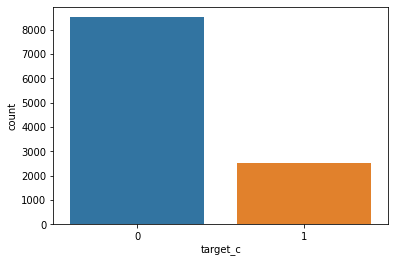

In [19]:
sns.countplot( x = 'target_c', data = df2)

In [25]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target', 'target_c'],
      dtype='object')

In [20]:
#elimina target_c
df_rec_trei['target'] = df2['target_c'].copy()
df_rec_trei.drop(columns = 'target_c', inplace = True)

In [21]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0


In [22]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [23]:
l_rec_trei_ind01_18 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18']
l_rec_trei_ind21_43 =[ 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [24]:
l_rec_trei_ind19_20 = ['ind19', 'ind20']

In [25]:
df4 = df_rec_trei[['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','ind21', 'ind22', 'ind23', 'ind24',
                'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
                'ind41', 'ind42', 'ind43']]

In [26]:
df3 = df_rec_trei[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']]

In [27]:
df3.describe()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.106722,0.157427,0.346646,0.364934,0.378858,0.397906,0.305112,0.355596,0.007454,0.001375,0.001093,0.141280,0.170552,0.034556,0.019556,0.003789,0.014774,0.004045,0.694791,0.700189
std,0.305922,0.315114,0.470182,0.451587,0.449015,0.473002,0.430549,0.440732,0.069064,0.031814,0.029262,0.312289,0.322844,0.161135,0.129848,0.059799,0.118014,0.062567,0.452090,0.450725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.083300,1.000000,1.000000,1.000000,1.000000,0.862600,0.932700,0.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#df_rec_trei['ind01'].mode()
df_rec_trei['ind01'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
11028    False
11029    False
11030    False
11031    False
11032    False
Name: ind01, Length: 11033, dtype: bool

In [29]:
for i in l_rec_trei_ind01_18:
    print(f'coluna: {i}')
    print(f'mode: {df_rec_trei[i].mode()}')
    print(f'mediana: {df_rec_trei[i].median()}')  
    print(f'+++++++++++')

coluna: ind01
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind02
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind03
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind04
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind05
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
coluna: ind06
mode: 0    0.0
dtype: float64
mediana: 0.02190000000000003
+++++++++++
coluna: ind07
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind08
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind09
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind10
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind11
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind12
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind13
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind14
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
co

In [ ]:
#verificar como substituir
'''for i in l_rec_trei_ind01_20:
    if df_rec_trei[i].mode() == df_rec_trei[i].median():
        for j in l_index_trein:
            df_rec_trei[i][j] = df_rec_trei[i].median()
    else:
       for j in l_index_trein:
           df_rec_trei[i][j] = df_rec_trei[i].mode()  
            
                 
        
        
    

SyntaxError: ignored

In [30]:
#opção de substituir tudo pela moda dos ind01 a ind18

for i in l_rec_trei_ind01_18:
    df_rec_trei[i].fillna(0.0, inplace=True)

In [31]:
#opção de substituir tudo pela moda dos ind19 e ind20

for i in l_rec_trei_ind19_20:
    df_rec_trei[i].fillna(1.0, inplace=True)

In [32]:
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind21 = 599: float64
ind22 = 599: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind26 = 599: float64
ind27 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind33 = 34: float64
ind34 = 34: float64
ind35 = 34: float64
ind36 = 34: float64
ind37 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:26


In [33]:
for i in l_rec_trei_ind21_43:
    print(f'indicador: {i}')
    print(f'mode: {df_rec_trei[i].mode()}')
    print(f'mediana: {df_rec_trei[i].median()}')  
    print(f'+++++++++++')

indicador: ind21
mode: 0    1.0
dtype: float64
mediana: 0.75
+++++++++++
indicador: ind22
mode: 0    1.0
dtype: float64
mediana: 0.5832999999999999
+++++++++++
indicador: ind23
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
indicador: ind24
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
indicador: ind25
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind26
mode: 0    1.0
dtype: float64
mediana: 0.625
+++++++++++
indicador: ind27
mode: 0    1.0
dtype: float64
mediana: 0.5278
+++++++++++
indicador: ind28
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind29
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind30
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind31
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind32
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind33
mode: 0    1.0
dtype: float64
mediana: 1.0
+++++++++++
indicador: 

l_rec_trei_ind21_43 =[ 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [34]:
l_moda_um = ['ind21','ind22','ind26','ind27','ind33','ind35','ind36','ind37']
for i in l_moda_um:
    df_rec_trei[i].fillna(1.0, inplace=True)




In [ ]:
'''l_moda_zero = ['ind23','ind24','ind25','ind28','ind29','ind30','ind31','ind32','ind34','ind38','ind39','ind40','ind41','ind42','ind43']
for d in l_moda_zero:
    df_rec_trei[i].fillna(0.0, inplace=True)

In [35]:
l_mc = ['mc1', 'mc2', 'mc3']

for i in l_mc:
    print(f'indicador: {i}')
    print(f'mode: {df_rec_trei[i].mode()}')
    print(f'mediana: {df_rec_trei[i].median()}')  
    print(f'+++++++++++')

indicador: mc1
mode: 0    0.0
dtype: float64
mediana: 0.00046299326957024815
+++++++++++
indicador: mc2
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: mc3
mode: 0    0.0
dtype: float64
mediana: 9.110000506142275e-05
+++++++++++


In [36]:
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind34 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:18


In [37]:
df_rec_trei['mc1'].fillna(0.0, inplace=True)
df_rec_trei['mc2'].fillna(0.0, inplace=True)
df_rec_trei['mc3'].fillna(0.0, inplace=True)
df_rec_trei['ind23'].fillna(0.0, inplace=True)
df_rec_trei['ind24'].fillna(0.0, inplace=True)
df_rec_trei['ind25'].fillna(0.0, inplace=True)
df_rec_trei['ind28'].fillna(0.0, inplace=True)
df_rec_trei['ind29'].fillna(0.0, inplace=True)
df_rec_trei['ind30'].fillna(0.0, inplace=True)
df_rec_trei['ind31'].fillna(0.0, inplace=True)
df_rec_trei['ind32'].fillna(0.0, inplace=True)
df_rec_trei['ind34'].fillna(0.0, inplace=True)
df_rec_trei['ind38'].fillna(0.0, inplace=True)
df_rec_trei['ind39'].fillna(0.0, inplace=True)
df_rec_trei['ind40'].fillna(0.0, inplace=True)
df_rec_trei['ind41'].fillna(0.0, inplace=True)
df_rec_trei['ind42'].fillna(0.0, inplace=True)
df_rec_trei['ind43'].fillna(0.0, inplace=True)

In [38]:
mostra_isna(df_rec_trei)

qt de colunas con isna:0


In [39]:
df_rec_trei['ind43'].isna().sum()

0

In [5]:
#tratado de missiing
df_rec_trei.head()

NameError: ignored

In [ ]:
#df_rec_trei[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [41]:
df_rec_trei.shape

(11033, 63)

In [42]:
#copia do df_trei sme missing
df_rec_trei_sem_miss = df_rec_trei.copy()

###TRATANDO  OUT

In [43]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest

# Scaling variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#from pyod.models.abod import ABOD
#from pyod.models.cblof import CBLOF

#from pyod.models.feature_bagging import FeatureBagging
#from pyod.models.hbos import HBOS
#from pyod.models.iforest import IForest
#from pyod.models.knn import KNN
#from pyod.models.lof import LOF
from scipy import stats

# remove warnings to keep notebook clean
import warnings
warnings.filterwarnings('ignore')

In [44]:
l_rec_trei_ind01_18 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18']

In [45]:
l_rec_trei_ind19_20 = ['ind19', 'ind20']

In [46]:
l_rec_trei_ind01_20 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']

In [47]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [2]:
l_lista_geral = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [135]:
l_test =['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06']


In [80]:
'''l_val =[]
for i in l_test:
    d = df_rec_trei[h].value_counts()[df_rec_trei[h].max()]/df2.shape[0]
    l_val.append(d)
    e =df_rec_trei[h].value_counts()[df_rec_trei[h].min()]/df2.shape[0]
    l_val.append(e)

In [54]:
l_div = [['md1', 'md2', 'md3', 'md4', 'md5', 'md6'],['md7',
       'md8', 'md9', 'md10', 'md11', 'md12'],['mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02'],['ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08'],
       ['ind15', 'ind16','ind17', 'ind18', 'ind19', 'ind20'],['ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26'],['ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32'],
       ['ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38'],['ind39', 'ind40',
       'ind41', 'ind42', 'ind43']]

In [48]:
l_test1 = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6']

In [49]:
l_test2 = ['ind07', 'ind08', 'ind09', 'ind10', 'ind11', 'ind12']

In [50]:
l_test3 = ['mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02']
l_test4 = ['ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08']
l_test5 = ['ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14']
l_test6 = ['ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26']
l_test7 = ['ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32']
l_test8 = ['ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38']
l_test9 = ['ind39', 'ind40','ind41', 'ind42', 'ind43']





In [4]:
#depois DE TRATAR missing
#outliers lista geral
for d in l_lista_geral:
    df_rec_trei[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

NameError: ignored

In [65]:
# Jeito mais fácil (menos trabalhoso).



for i in l_lista_geral:
    
    Q1 = np.percentile(df_rec_trei[i], 25)
    Q3 = np.percentile(df_rec_trei[i], 75)
    IQR = Q3 - Q1
    print(f'++++++++')
    print(f'coluna: {i}')
    print(f'Q1:{Q1}')
    print(f'Q3:{Q3}\n')
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    lim_inf_out = Q1 - 1.5*IQR
    lim_sup_out = Q3 + 1.5*IQR
    print(f'Lim_inf_out: {lim_inf_out}')
    print(f'Lim_sup_out: {lim_sup_out}\n')
        
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
    min = df_rec_trei[i].min()
    max = df_rec_trei[i].max()
    print(f'max_valor: {max}')
    print(f'min_valor:{min}\n')
        
    perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]*100
    perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]*100
    print(f'perc_max_valor: {perc_max}')
    print(f'perc_min_valor:{perc_min}\n')
        
    mean = df_rec_trei[i].mean()
    median = df_rec_trei[i].median()
    moda = df_rec_trei[i].mode()
    print(f'mean:{mean}')
    print(f'median: {median}')
    print(f'moda: {moda}')
        

#d_dados1 = dict(zip(l_test1, l_val1))




#df_dados1 = pd.DataFrame(d_dados1, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


++++++++
coluna: md1
Q1:2.5773808824559053e-06
Q3:0.006034846522514576

Lim_inf_out: -0.009045826331565724
Lim_sup_out: 0.015083250234962757

max_valor: 1.0
min_valor:0.0

perc_max_valor: 0.009063717937097798
perc_min_valor:12.3447838303272

mean:0.011669523491646034
median: 0.00031632593421121566
moda: 0    0.0
dtype: float64
++++++++
coluna: md2
Q1:0.002421946635533409
Q3:0.012739863773658235

Lim_inf_out: -0.013054929071653832
Lim_sup_out: 0.028216739480845476

max_valor: 1.0
min_valor:0.0

perc_max_valor: 0.009063717937097798
perc_min_valor:0.027191153811293393

mean:0.012927650570991408
median: 0.005415165460685934
moda: 0    0.01511
dtype: float64
++++++++
coluna: md3
Q1:0.11007707937704167
Q3:0.11790281115151093

Lim_inf_out: 0.0983384817153378
Lim_sup_out: 0.12964140881321481

max_valor: 1.0000000000000002
min_valor:0.0

perc_max_valor: 0.009063717937097798
perc_min_valor:0.009063717937097798

mean:0.11826675569728777
median: 0.1120336020464186
moda: 0    0.108862
dtype: float6

In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test2 = ['ind07', 'ind08', 'ind09', 'ind10', 'ind11', 'ind12']
l_val2 = []

for i in l_test2:
    for j in range(len(l_test2)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val2.append(l_val[j])

d_dados2 = dict(zip(l_test2, l_val2))




df_dados2 = pd.DataFrame(d_dados2, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test3 = ['mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02']
l_val3 = []

for i in l_test3:
    for j in range(len(l_test3)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val3.append(l_val[j])

d_dados3 = dict(zip(l_test3, l_val3))




df_dados3 = pd.DataFrame(d_dados3, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test4 = ['ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08']
l_val4 = []

for i in l_test4:
    for j in range(len(l_test4)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val4.append(l_val[j])

d_dados4 = dict(zip(l_test4, l_val4))




df_dados4 = pd.DataFrame(d_dados4, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test5 = ['ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14']
l_val5 = []

for i in l_test5:
    for j in range(len(l_test5)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val5.append(l_val[j])

d_dados5 = dict(zip(l_test5, l_val5))




df_dados5 = pd.DataFrame(d_dados5, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test6 = ['ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26']
l_val6 = []

for i in l_test6:
    for j in range(len(l_test6)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val6.append(l_val[j])

d_dados6 = dict(zip(l_test6, l_val6))




df_dados6 = pd.DataFrame(d_dados6, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test7 = ['ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32']
l_val7 = []

for i in l_test7:
    for j in range(len(l_test7)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val7.append(l_val[j])

d_dados7 = dict(zip(l_test7, l_val7))




df_dados7 = pd.DataFrame(d_dados7, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test8 = ['ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38']
l_val8 = []

for i in l_test8:
    for j in range(len(l_test8)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val8.append(l_val[j])

d_dados8 = dict(zip(l_test8, l_val8))




df_dados8 = pd.DataFrame(d_dados8, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [58]:
'''# Jeito mais fácil (menos trabalhoso).
l_test9 = ['ind39', 'ind40','ind41', 'ind42', 'ind43']
l_val9 = []

for i in l_test9:
    for j in range(len(l_test9)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val9.append(l_val[j])

d_dados9 = dict(zip(l_test9, l_val9))




df_dados9 = pd.DataFrame(d_dados9, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


NameError: ignored

In [152]:
# Jeito mais fácil (menos trabalhoso).

l_val2 = []

for i in l_test3:
    for j in range(len(l_test3)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val2.append(l_val[j])

d_dados3 = dict(zip(l_test3, l_val2))




df_dados3 = pd.DataFrame(d_dados2, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [67]:
a = df2.value_counts()
b = df2.value_counts()[0]/df2.shape[0]
c = df2.value_counts()[1]/df2.shape[0]
d = df2.shape[0]
print('Elementos:\n{}, Qtd:\n{}, percentual:\n{}, percentual:\n{}'.format(a,d,b,c))



Elementos:
target_c
0           8513
1           2520
dtype: int64, Qtd:
11033, percentual:
target_c
0           0.771594
dtype: float64, percentual:
target_c
1           0.228406
dtype: float64


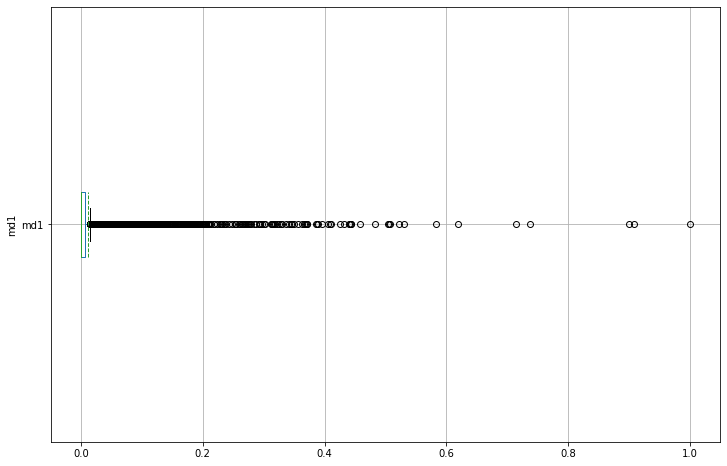

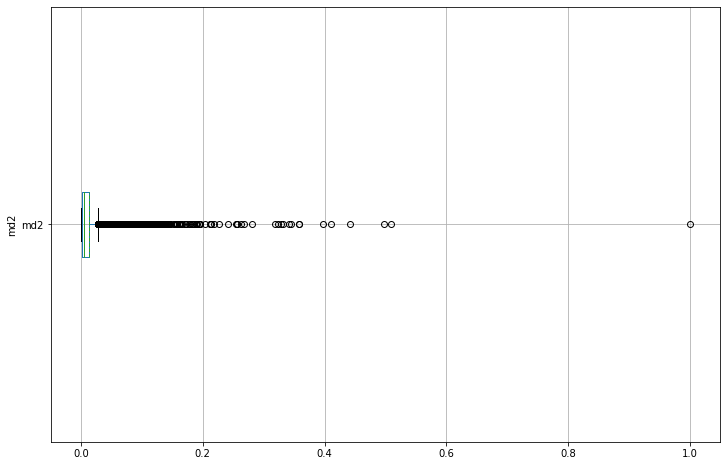

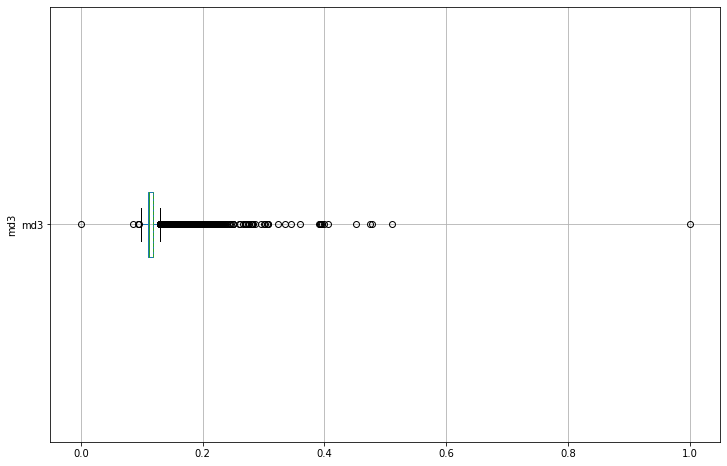

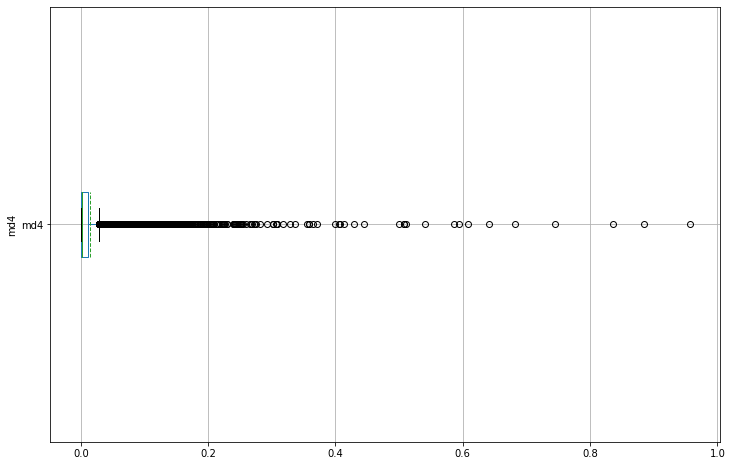

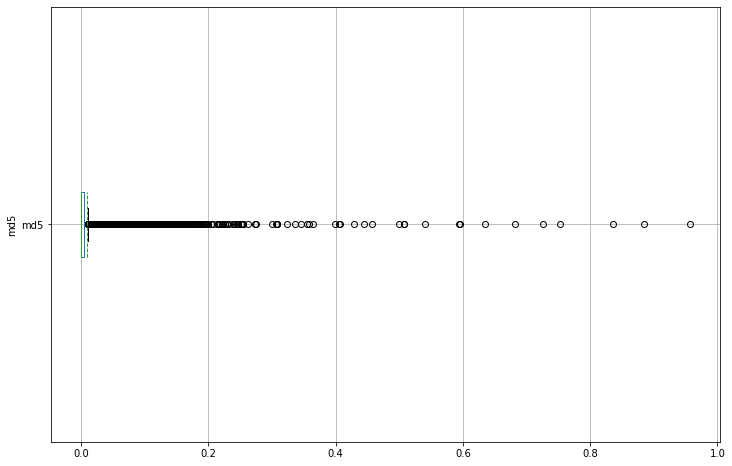

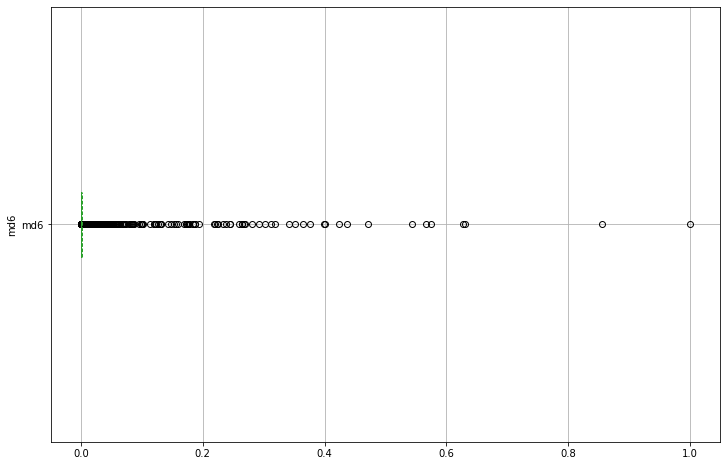

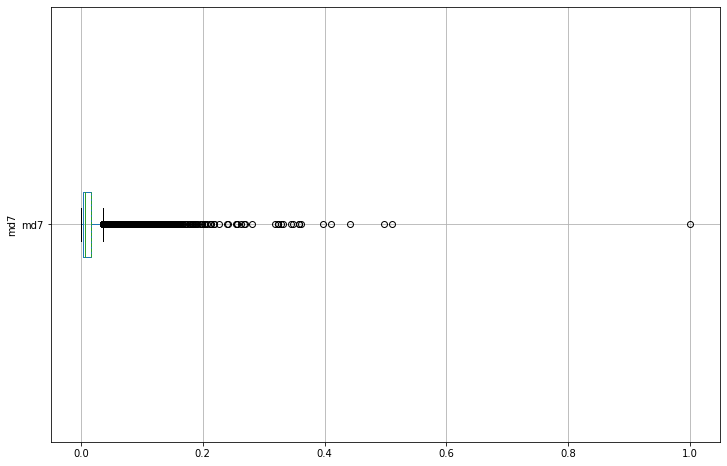

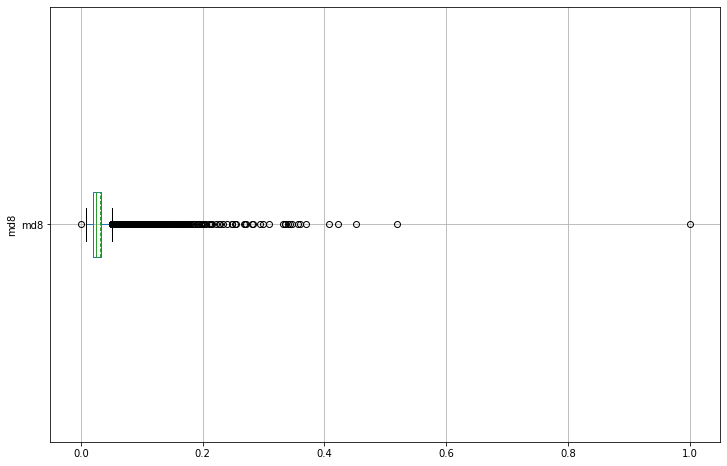

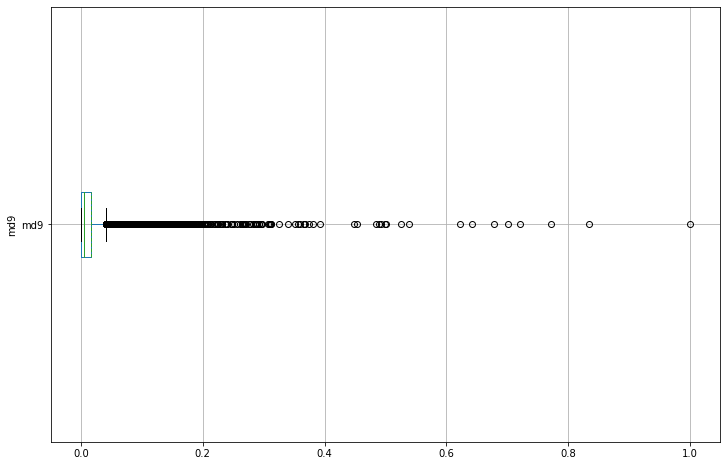

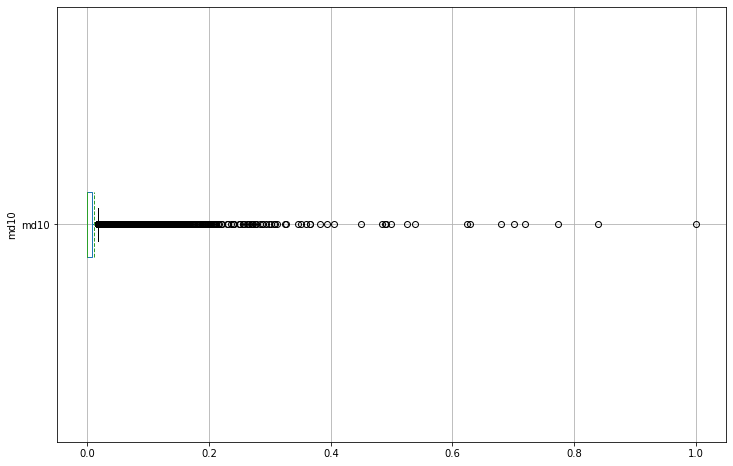

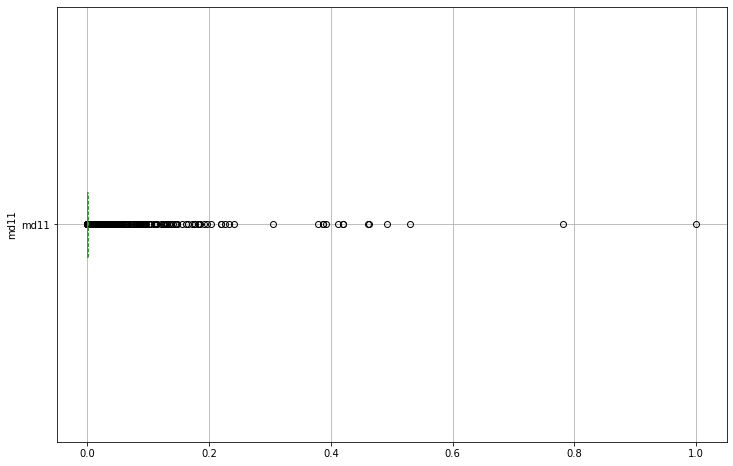

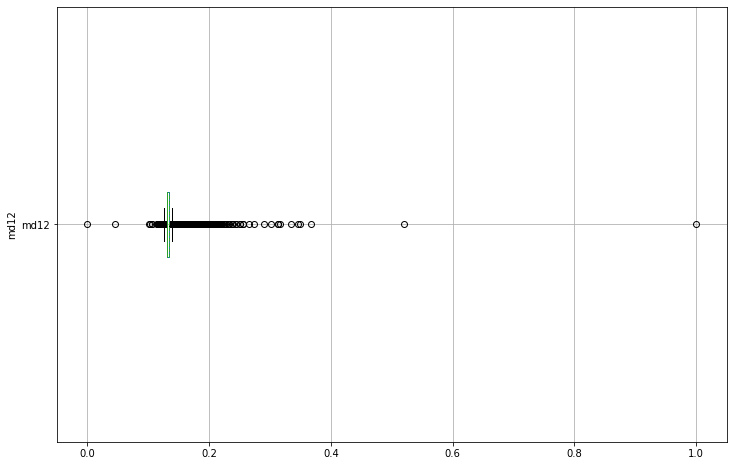

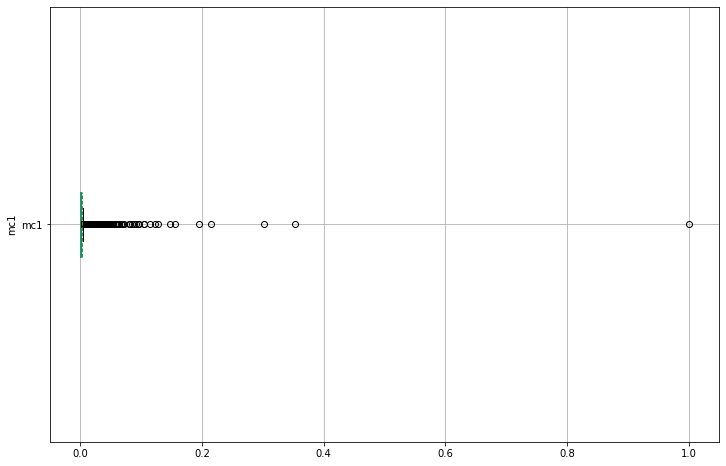

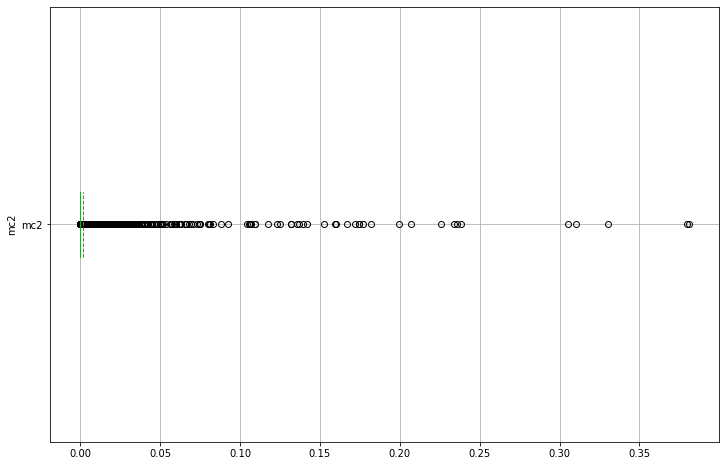

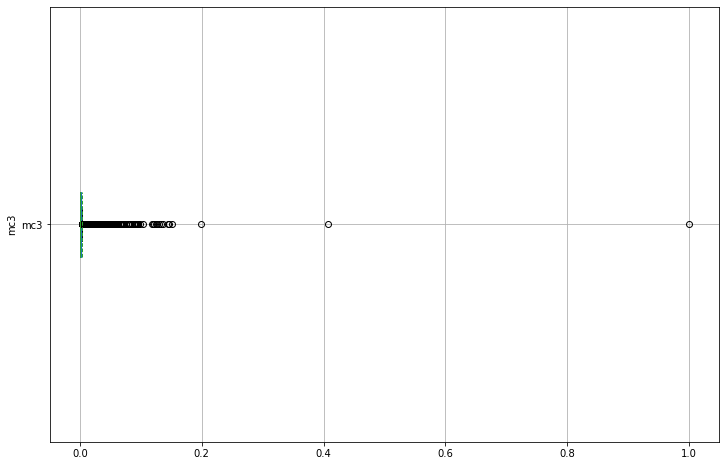

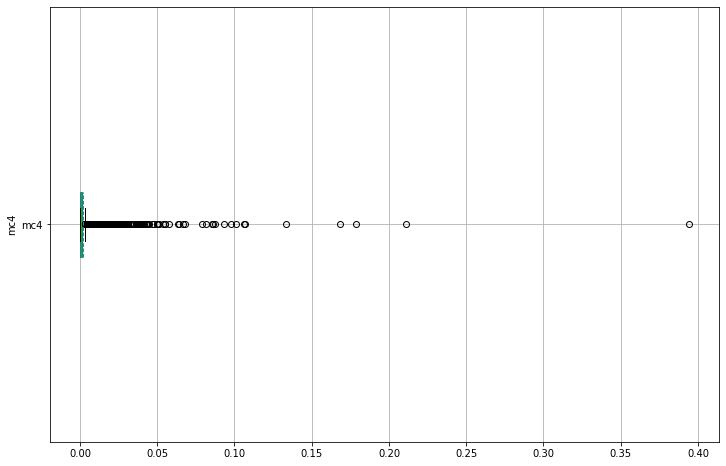

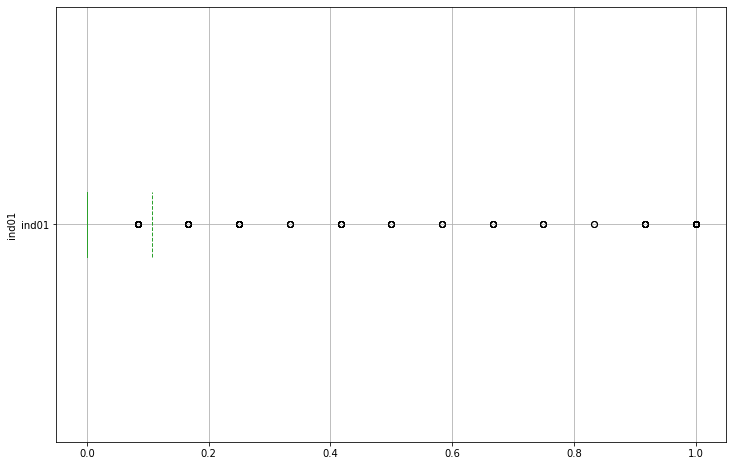

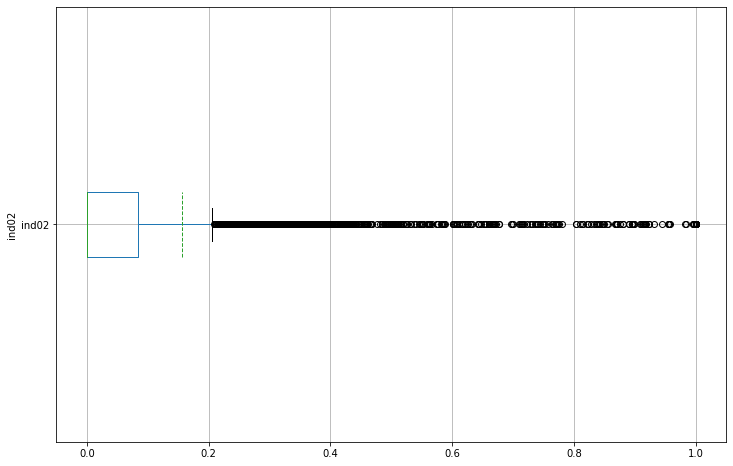

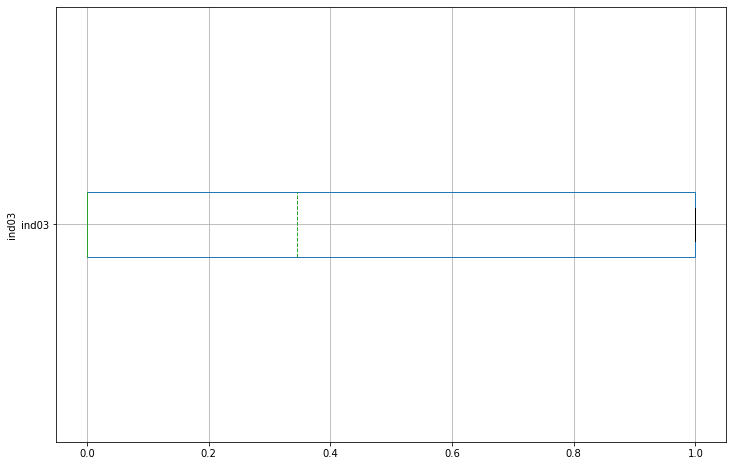

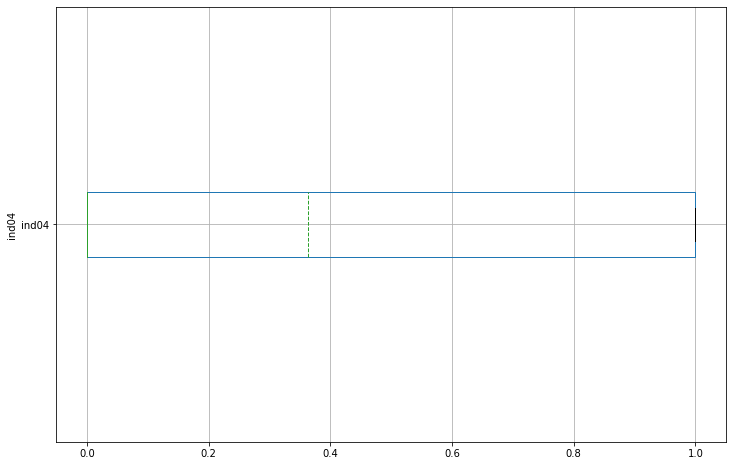

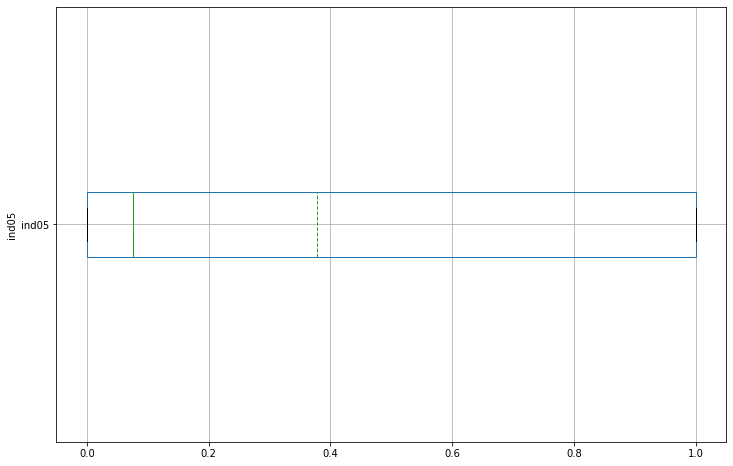

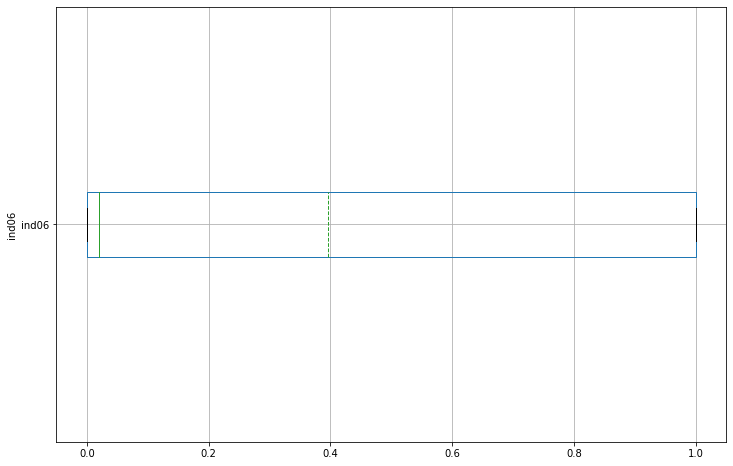

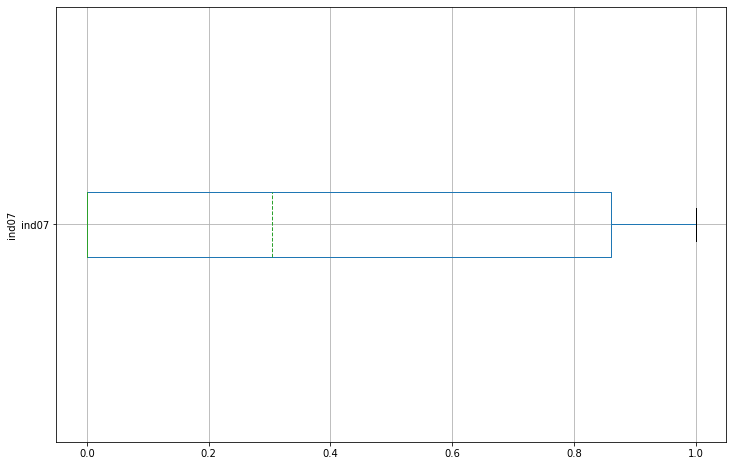

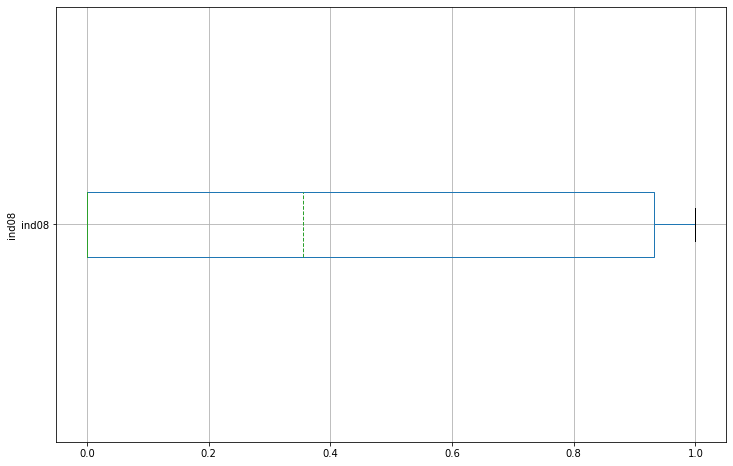

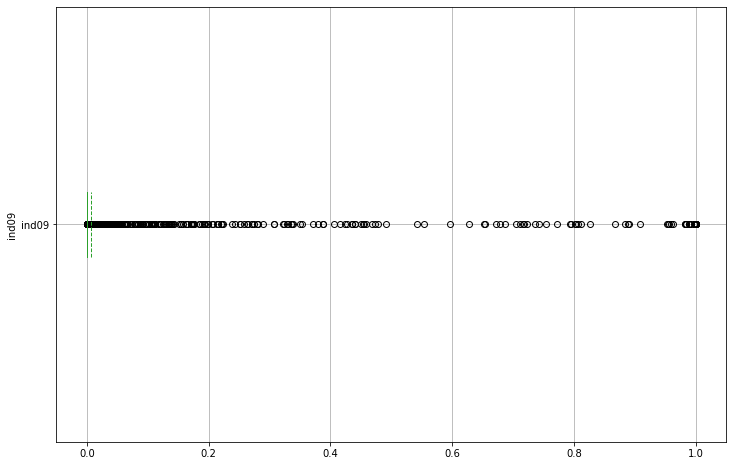

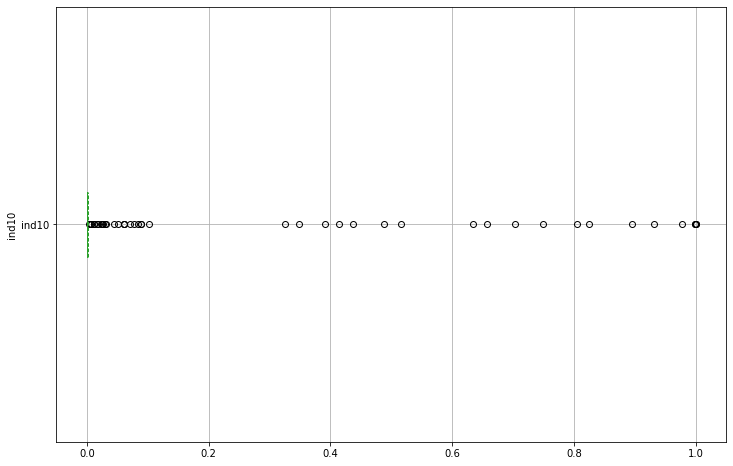

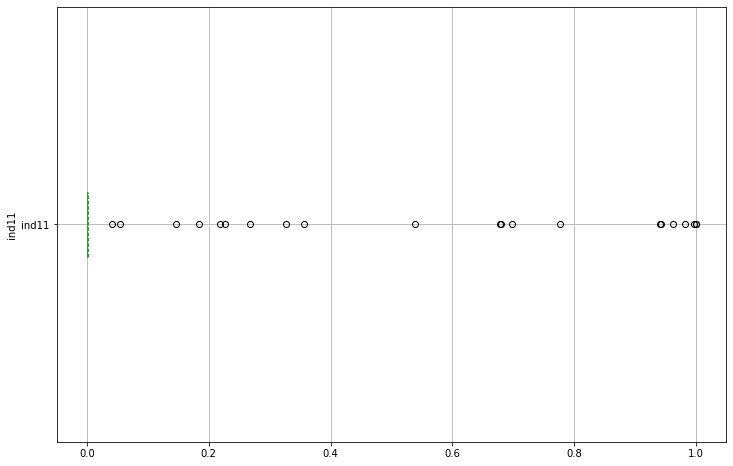

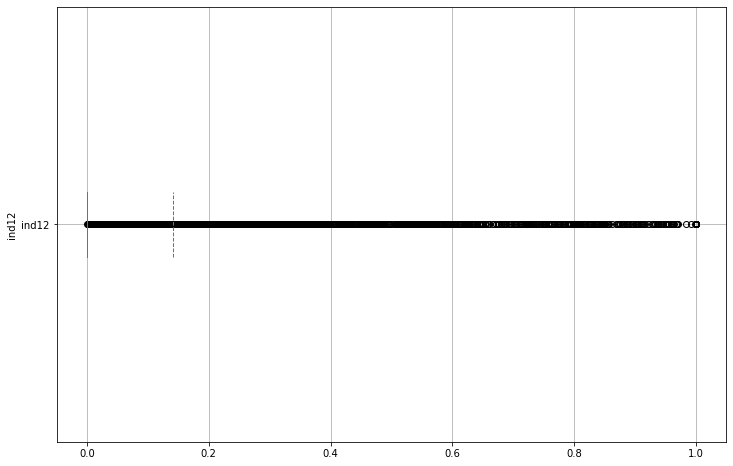

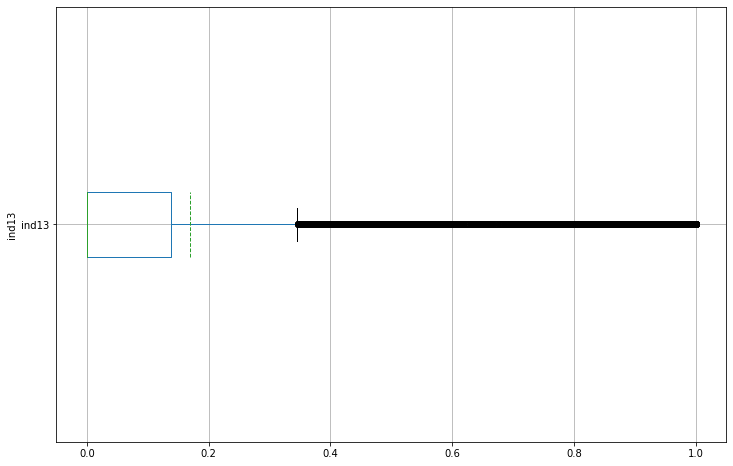

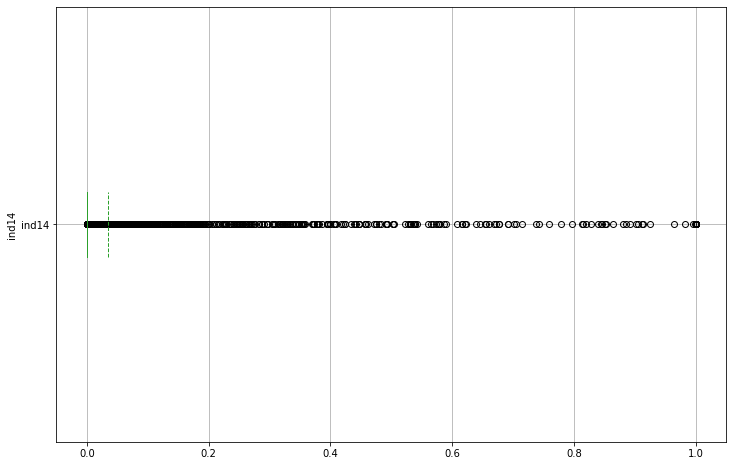

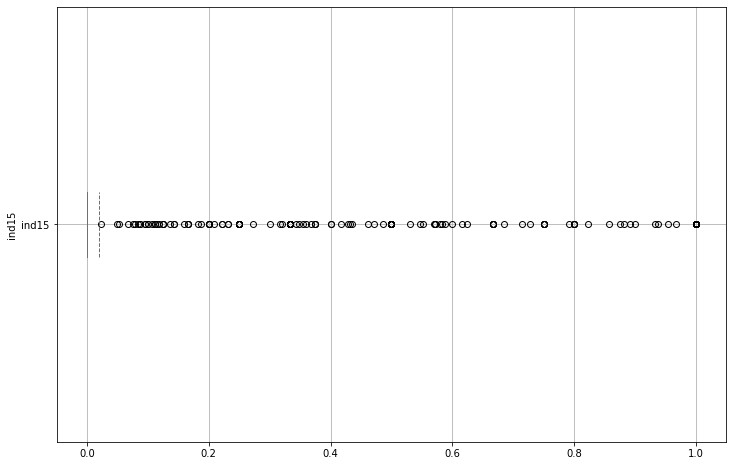

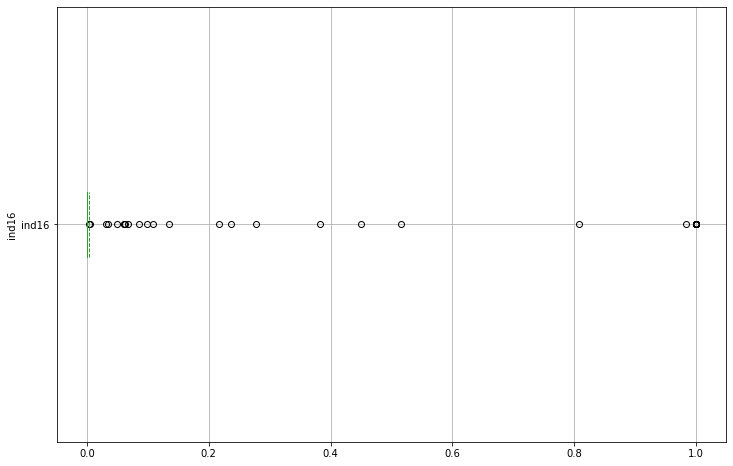

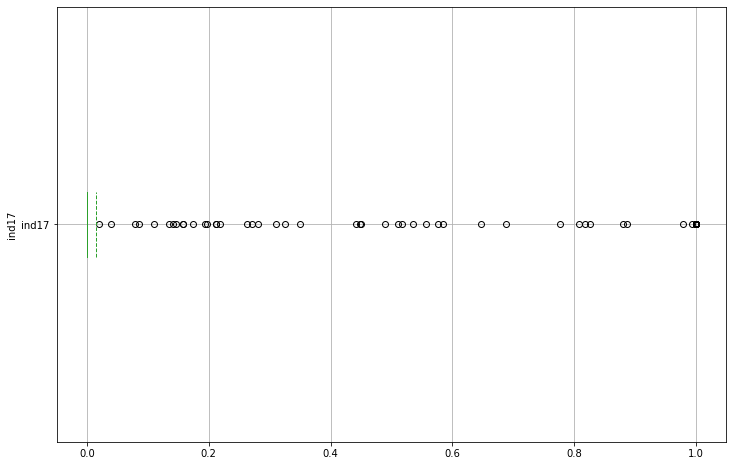

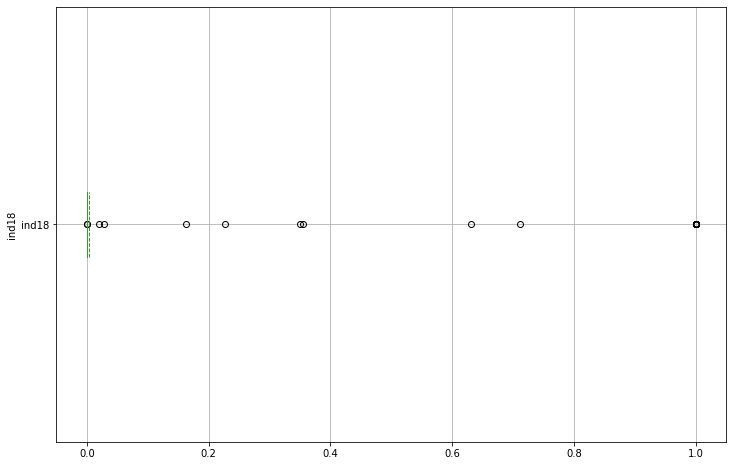

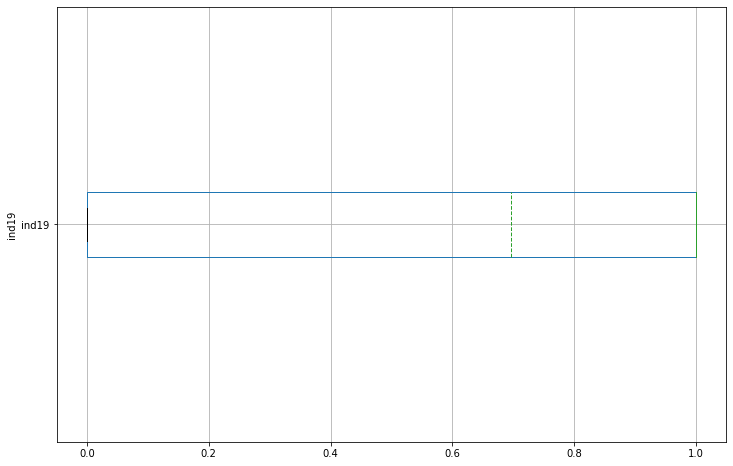

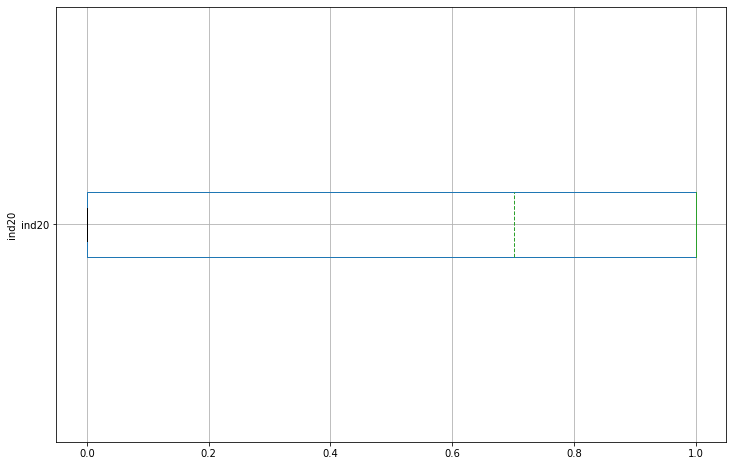

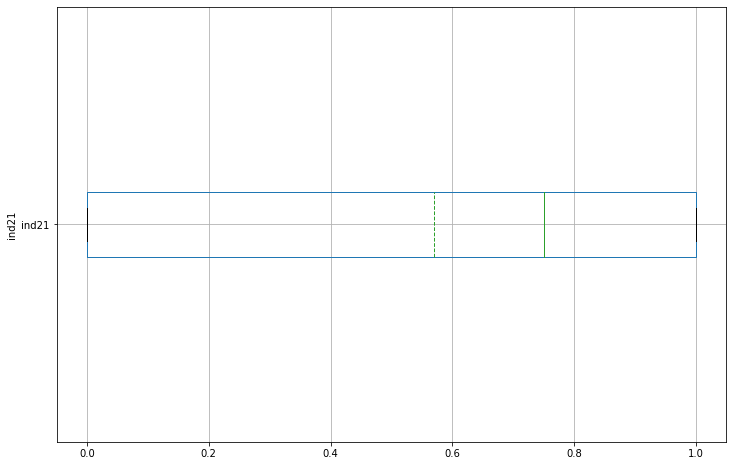

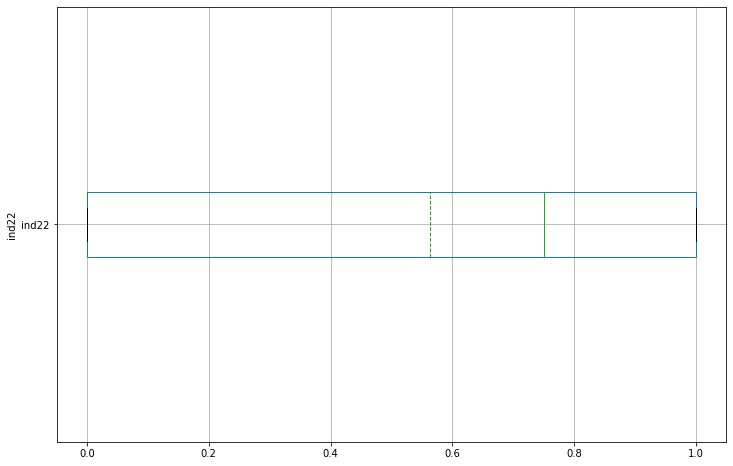

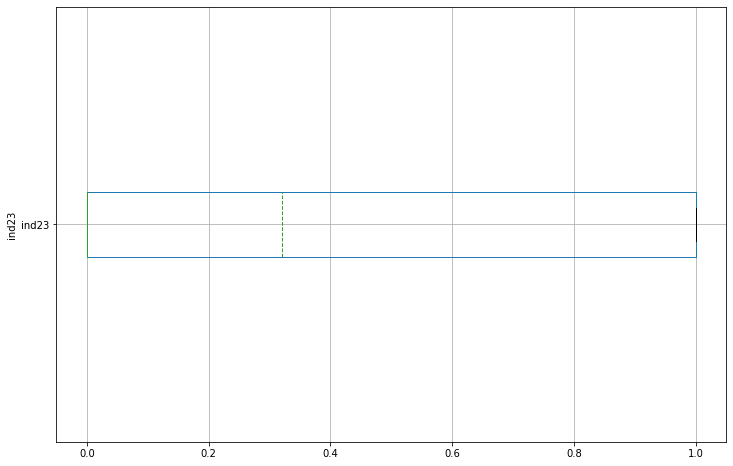

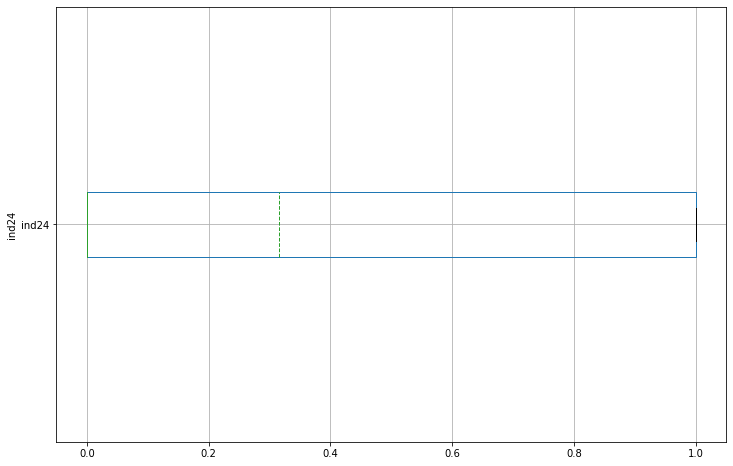

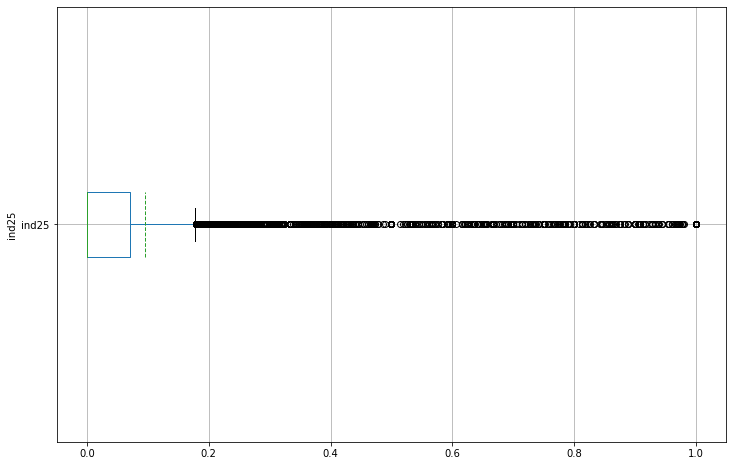

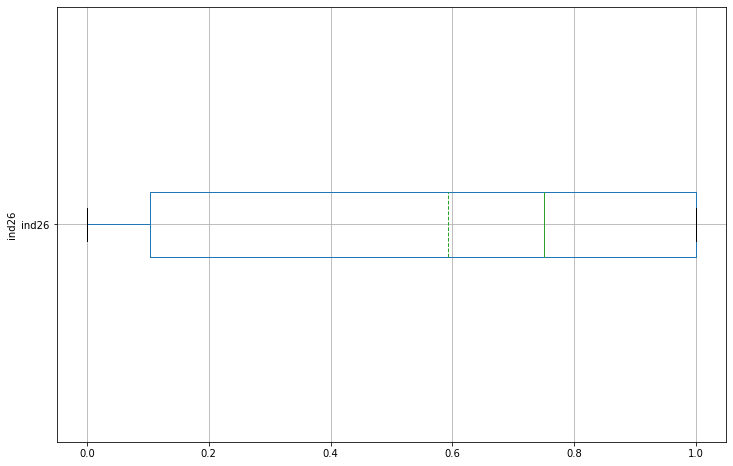

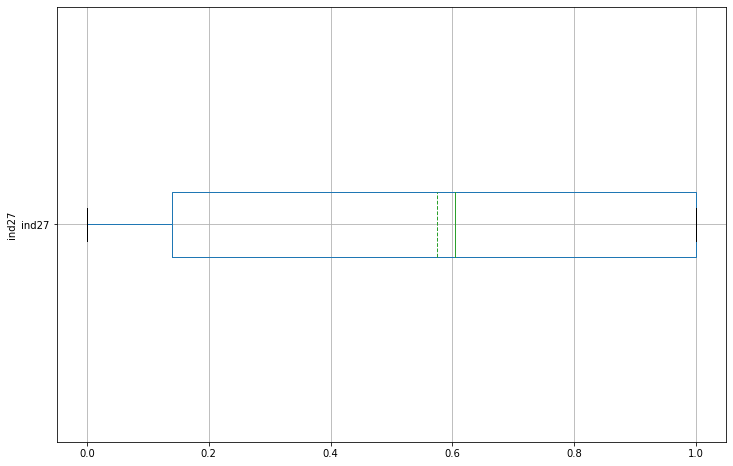

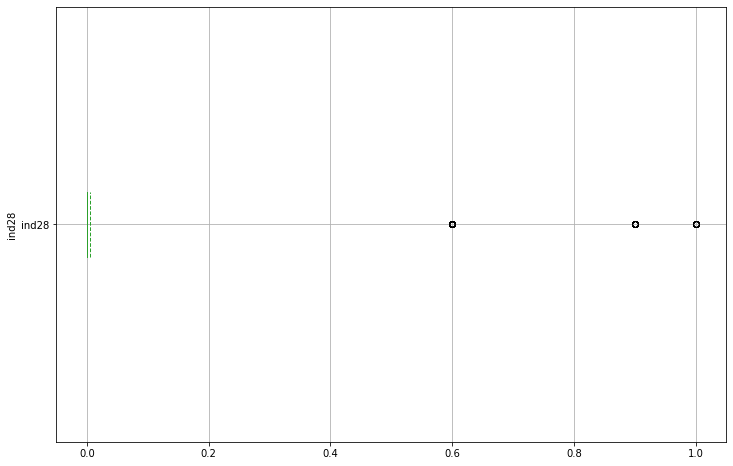

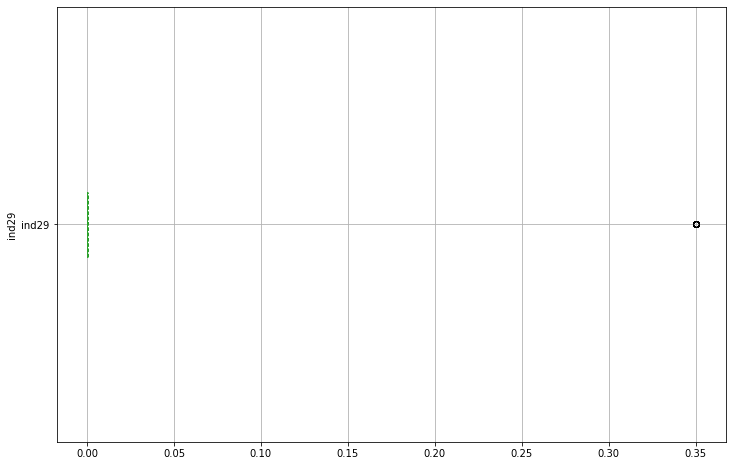

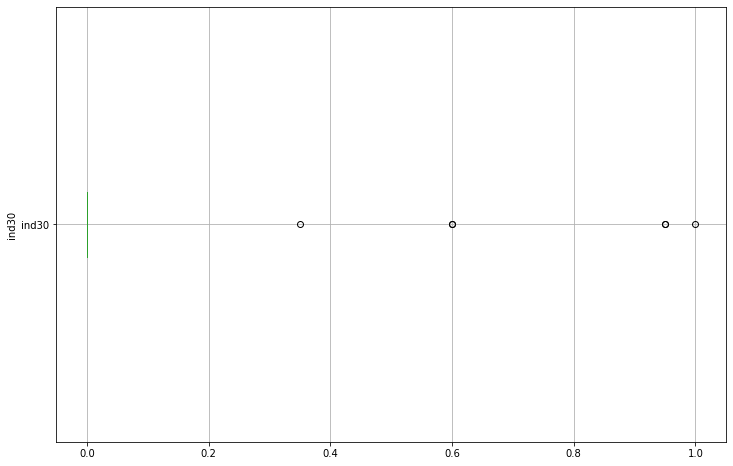

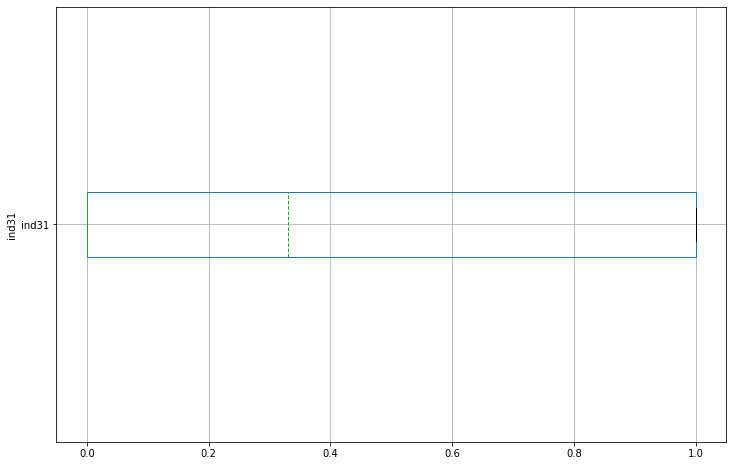

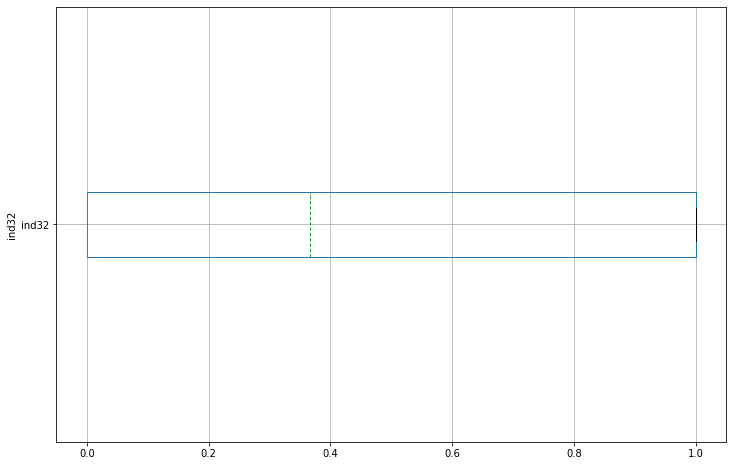

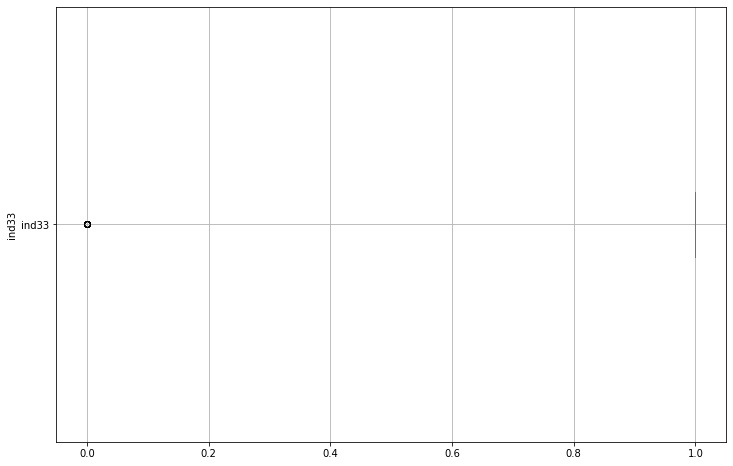

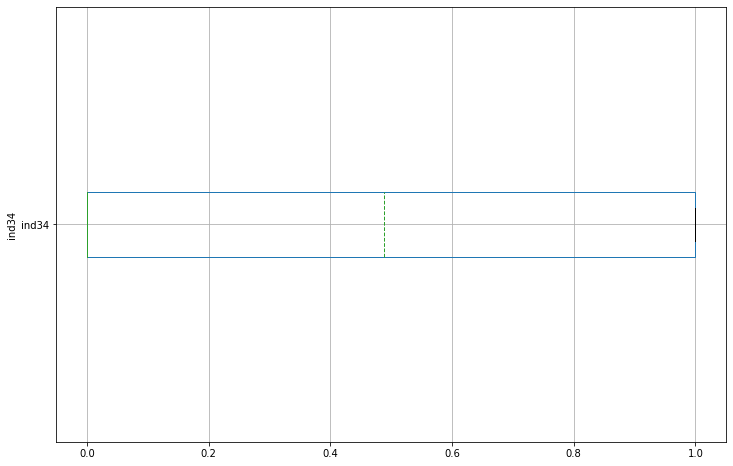

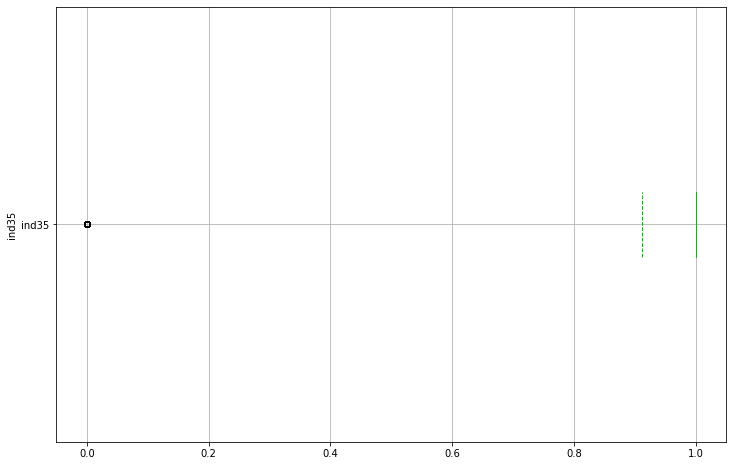

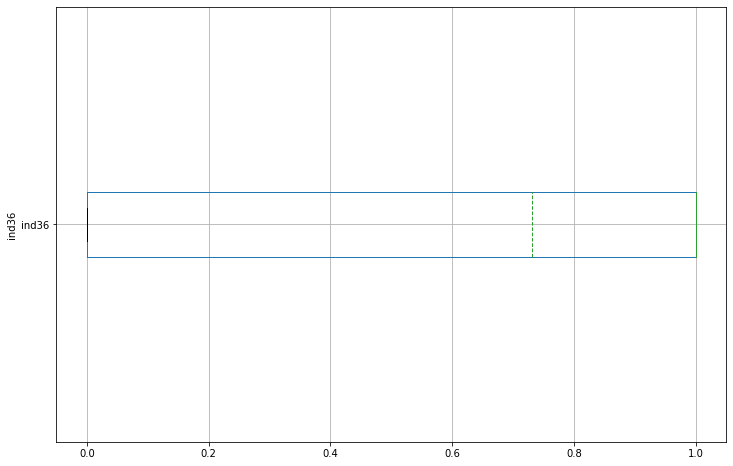

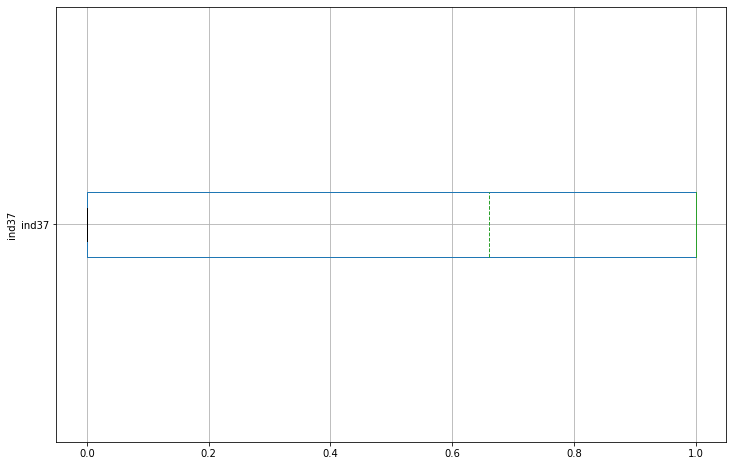

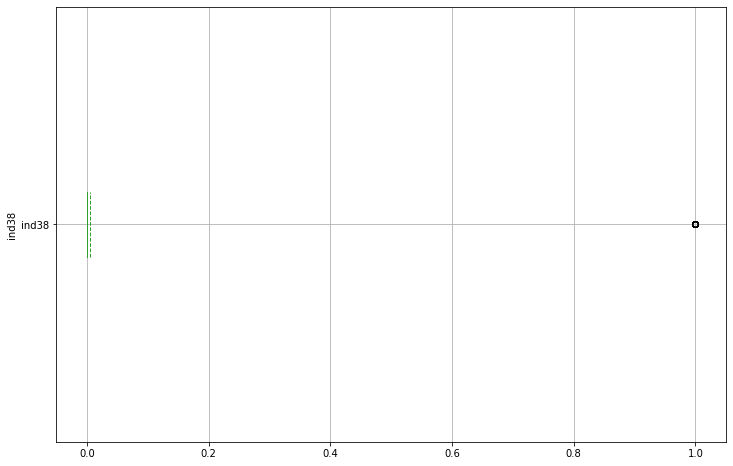

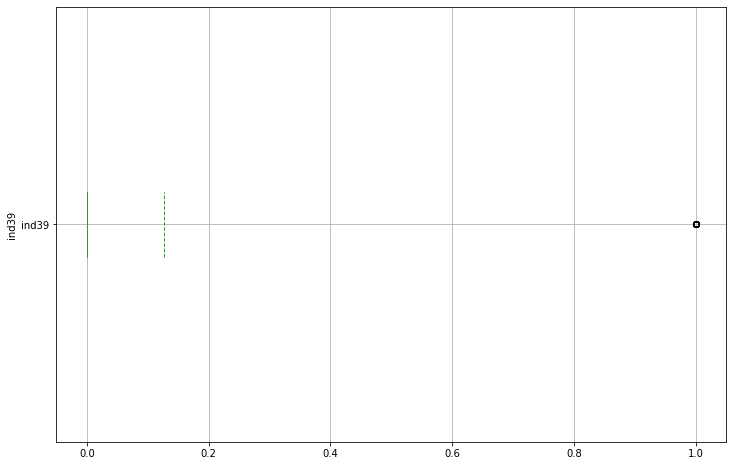

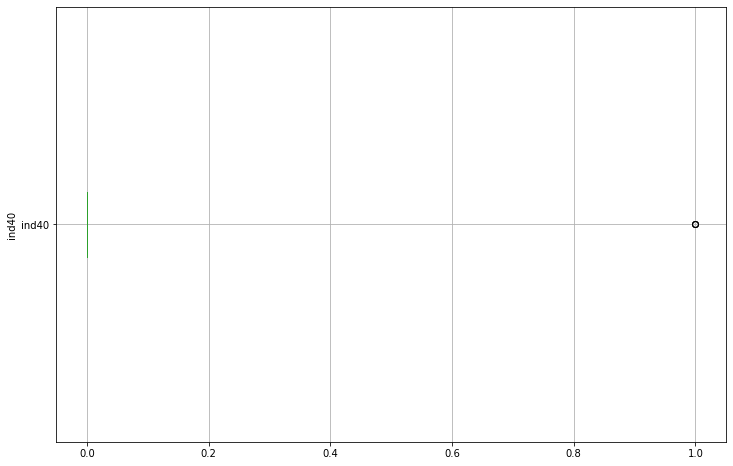

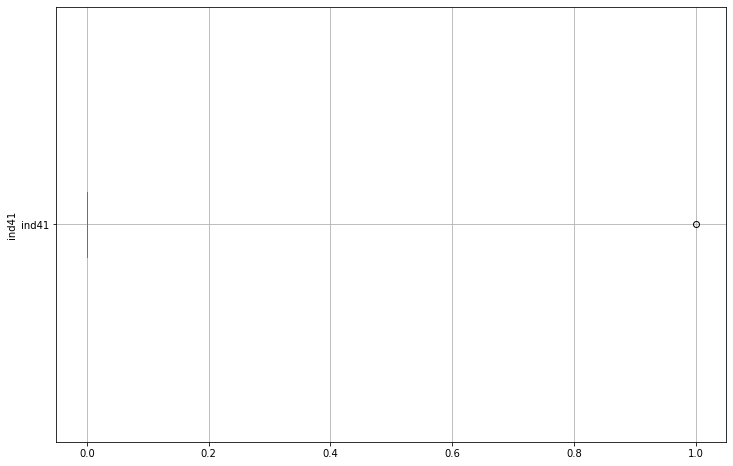

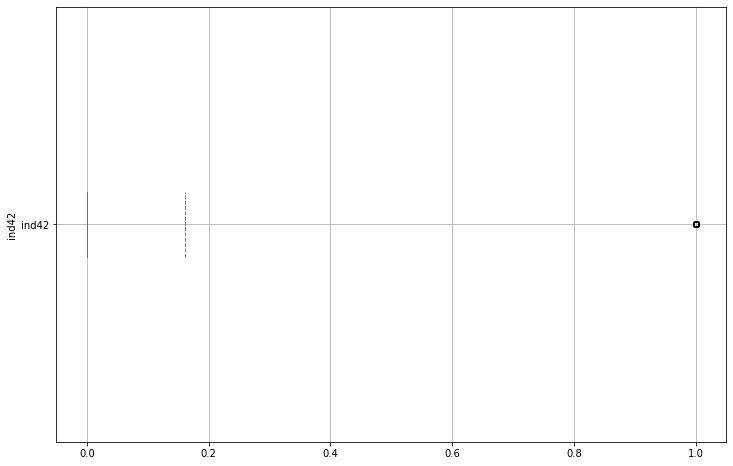

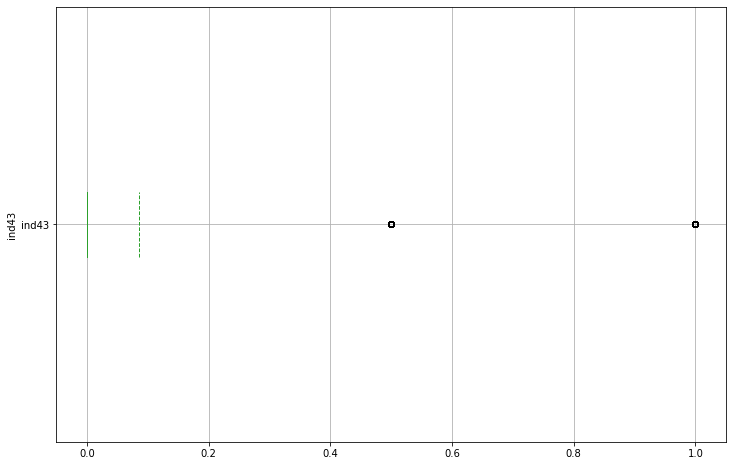

In [ ]:
#depois DE TRATAR missing
#outliers lista geral
for d in l_lista_geral:
    df_rec_trei[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
'''l_geral_out_trei

SyntaxError: ignored

In [ ]:
from scipy import stats 

In [ ]:
'''l_rec_trei_ind01_20

['ind01',
 'ind02',
 'ind03',
 'ind04',
 'ind05',
 'ind06',
 'ind07',
 'ind08',
 'ind09',
 'ind10',
 'ind11',
 'ind12',
 'ind13',
 'ind14',
 'ind15',
 'ind16',
 'ind17',
 'ind18',
 'ind19',
 'ind20']

In [ ]:
'''#lista out de ins01 a ind20
l_out_ind0120 =['ind01','ind02', 'ind09', 'ind10',
 'ind11',
 'ind12',
 'ind13',
 'ind14',
 'ind15',
 'ind16',
 'ind17',
 'ind18']

In [ ]:
# Jeito mais fácil (menos trabalhoso).
for i in l_geral_out_trei:
    Q1 = np.percentile(df_rec_trei[i], 25)
    Q3 = np.percentile(df_rec_trei[i], 75)
    IQR = Q3 - Q1
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    

NameError: ignored

In [ ]:
for i in l_geral_out_trei:
    a = df_rec_trei[i].mean()
    b = df_rec_trei[i].mode()
    c = df_rec_trei[i].median()
    print(f'coluna: {i};\n mean: {a}; mode: {b}; meedina: {c}')
    print(f'+++++++++')

NameError: ignored

In [ ]:
def trata_outliers(df, coluna):
    #sns.boxplot(x = coluna, data = df)
    print(f'++++++++')
    print(f'coluna: {coluna}')


    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    media = df[coluna].mean()
    print(f"Media: {media}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[(df[coluna] > limite_superior_outliers)|(df[coluna] < limite_inferior_outliers), coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(media, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_superior_outliers

In [ ]:
'''def trata_outliers_inf(df, coluna):
    #sns.boxplot(x = coluna, data = df)
    print(f'++++++++')
    print(f'coluna: {coluna}')


    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    media = df[coluna].mean()
    print(f"Media: {media}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[df[coluna] < limite_inferior_outliers, coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(media, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_inferior_outliers

In [ ]:
l_out_ind0120 = ['ind01','ind02', 'ind09', 'ind10',
 'ind11',
 'ind12',
 'ind13',
 'ind14',
 'ind15',
 'ind16',
 'ind17',
 'ind18']

In [ ]:
l_demais_com_out = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
                'ind25', 'ind28', 'ind29', 'ind30', 'ind33', 'ind35', 'ind38', 'ind39', 'ind40',
                'ind41', 'ind42', 'ind43']

In [ ]:
l_geral_out_trei = l_demais_com_out + l_out_ind0120

In [ ]:
len(l_geral_out_trei)

40

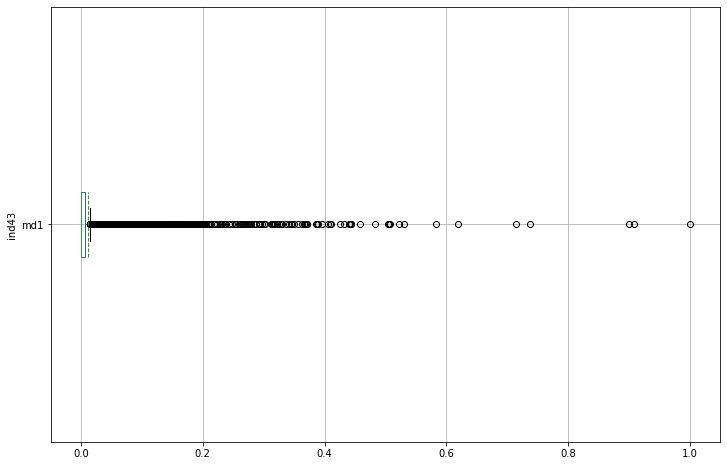

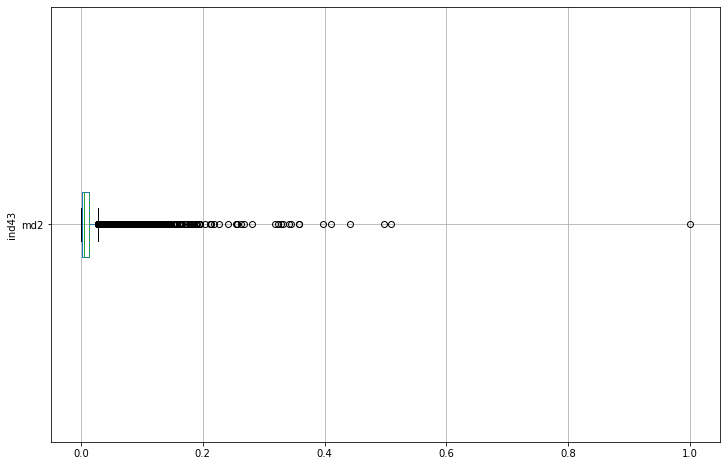

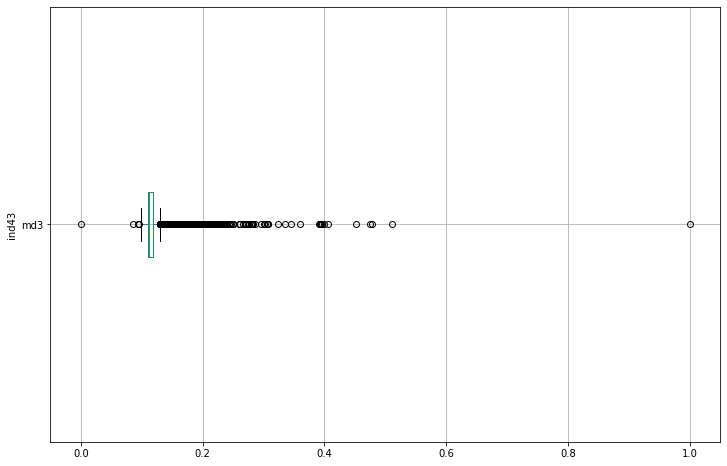

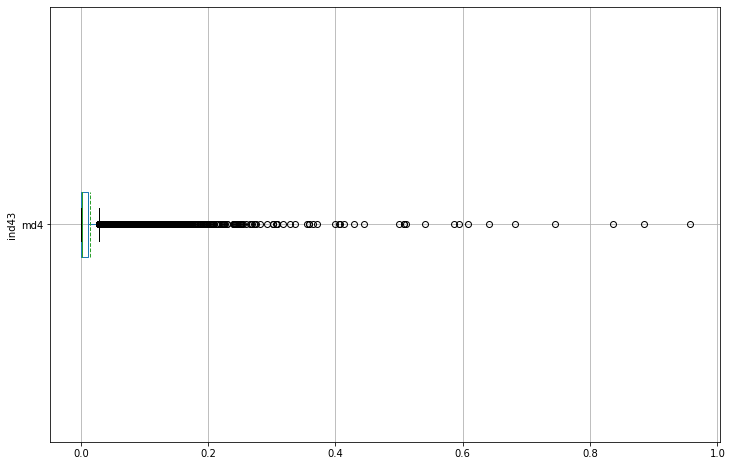

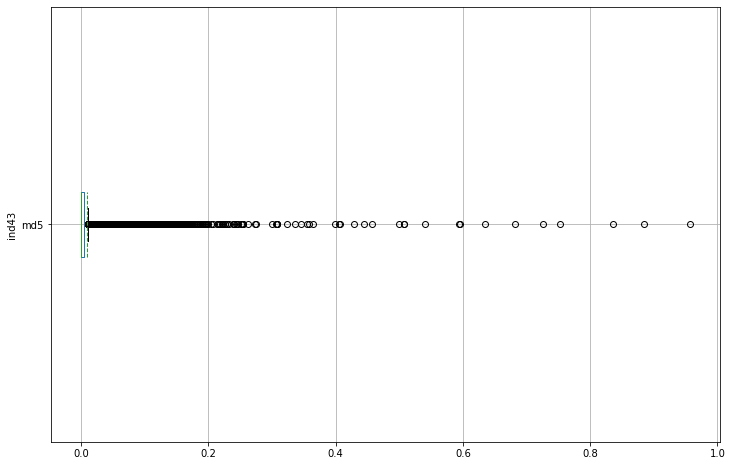

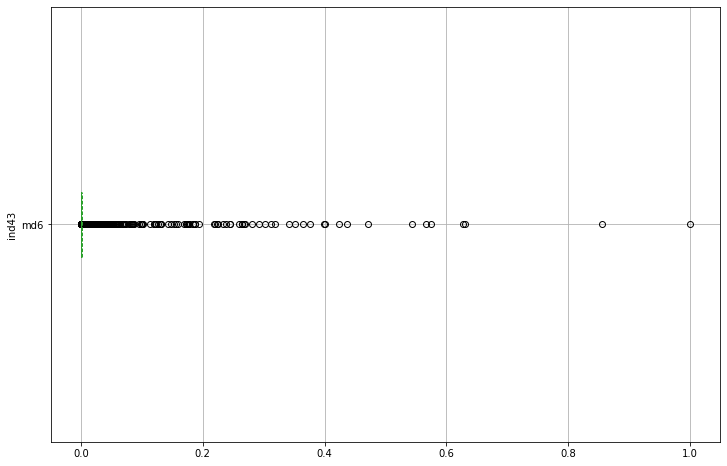

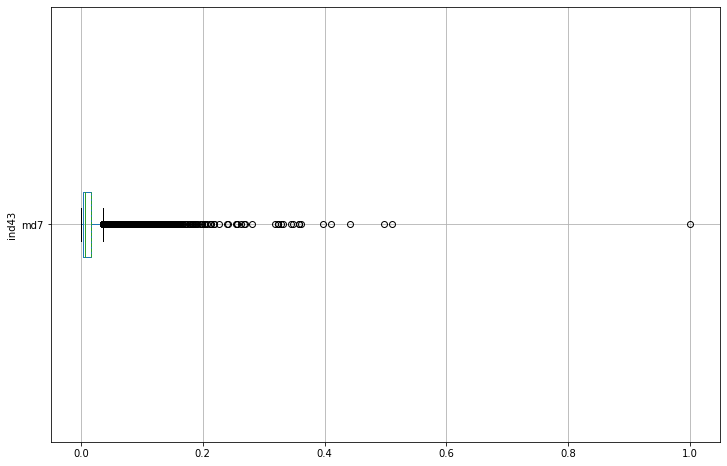

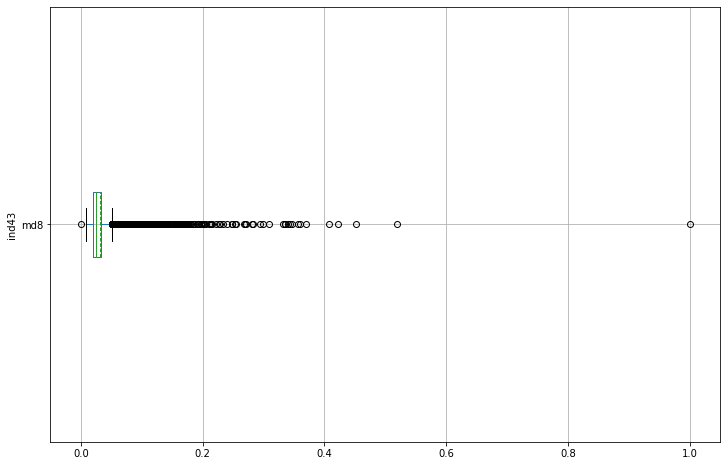

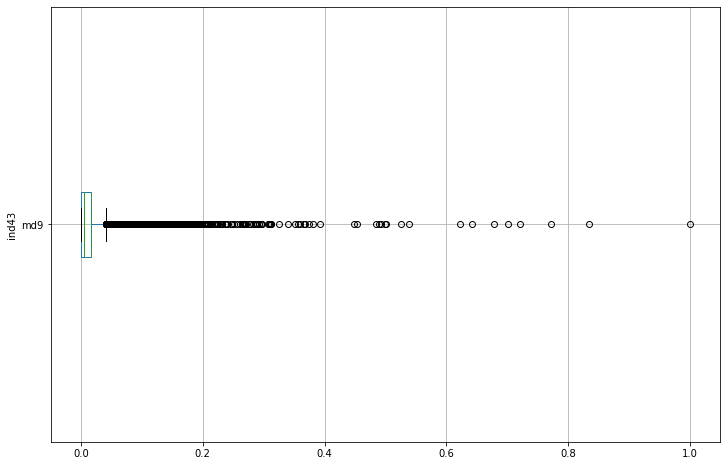

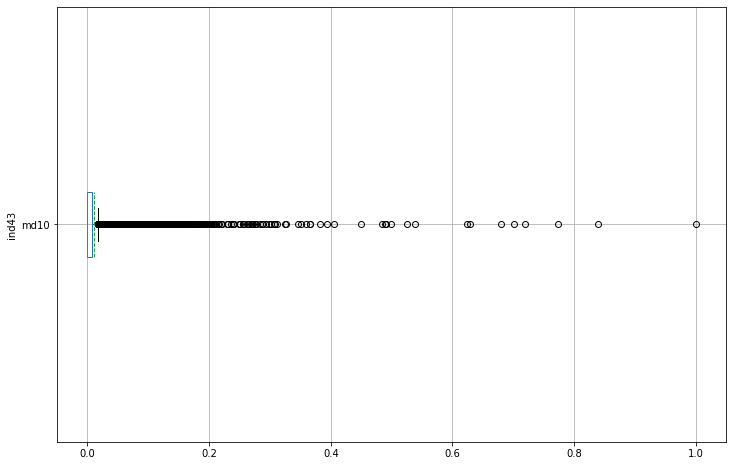

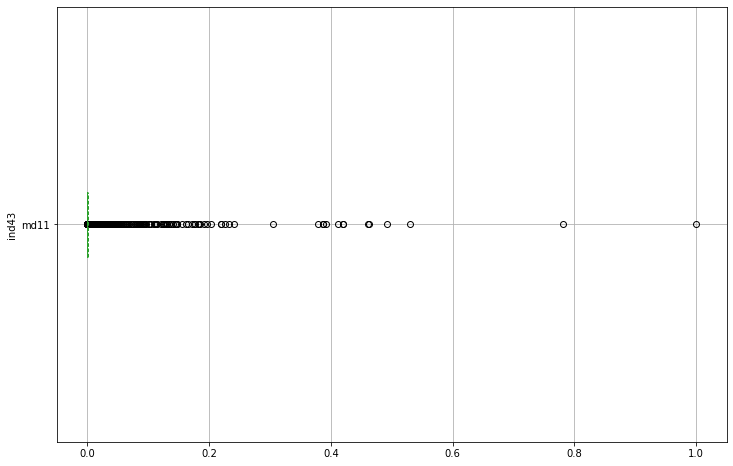

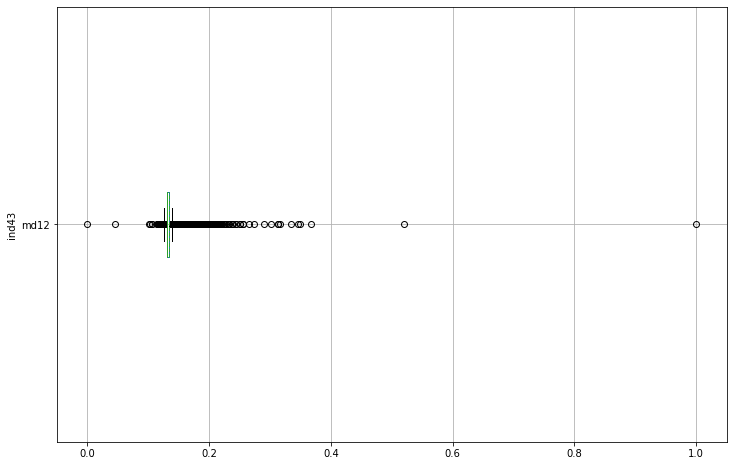

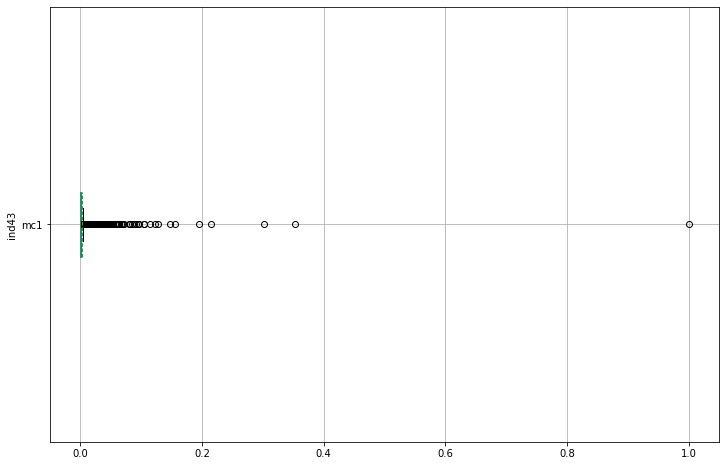

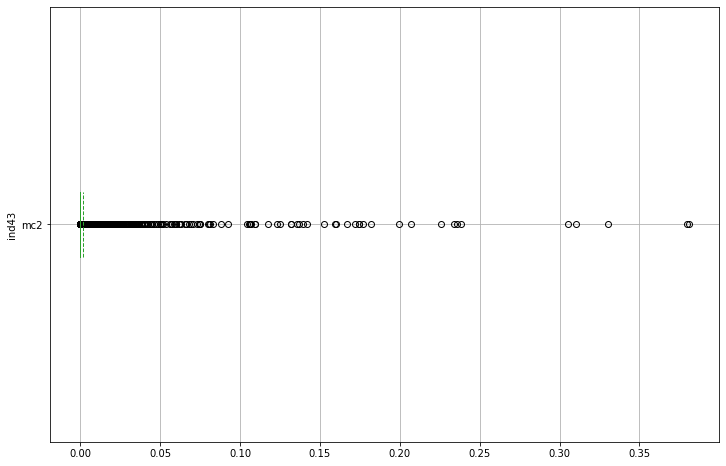

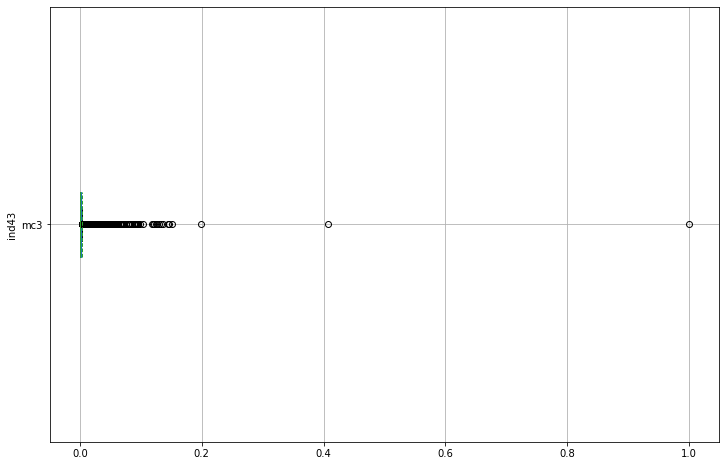

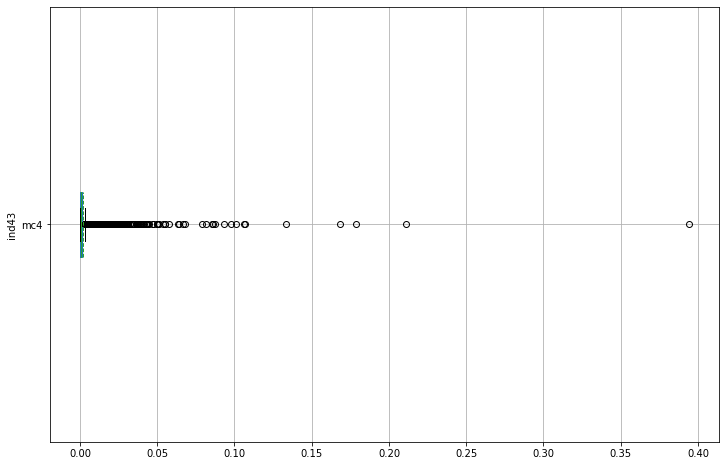

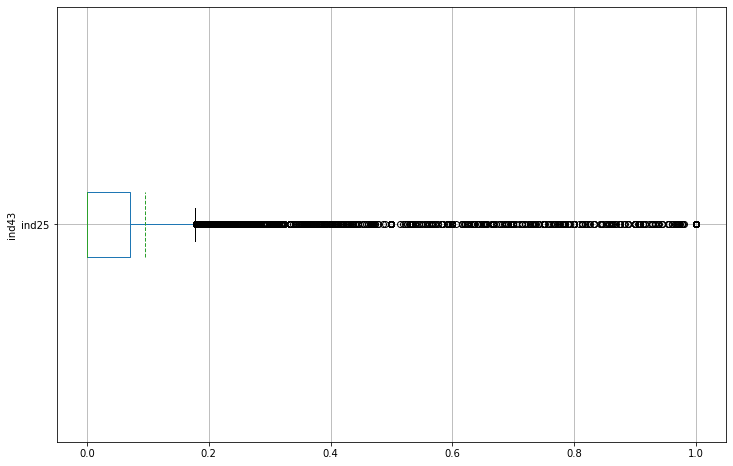

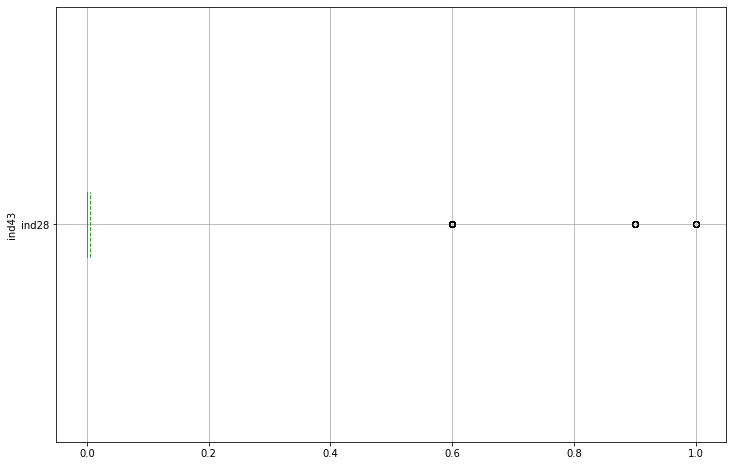

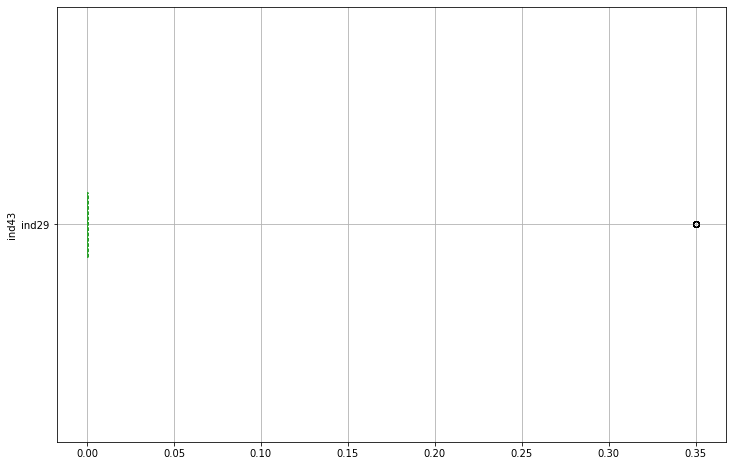

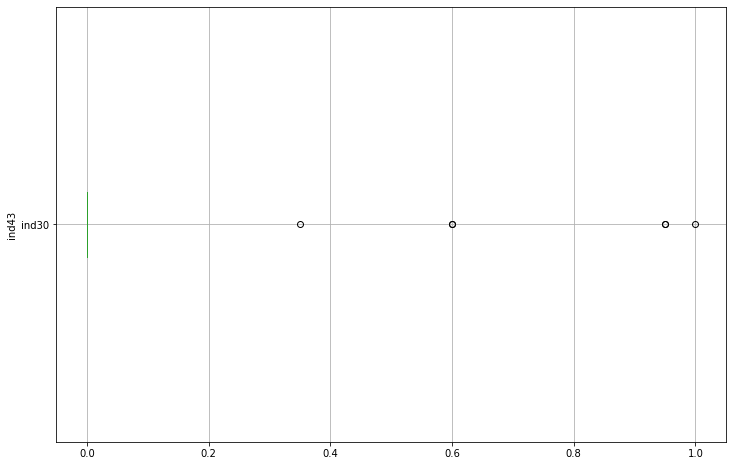

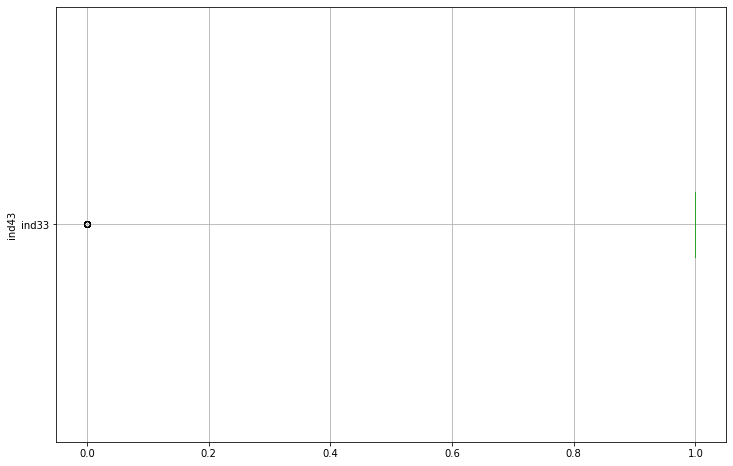

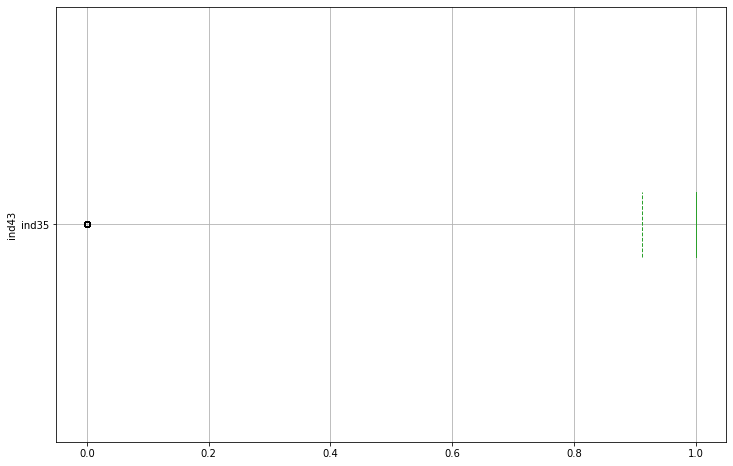

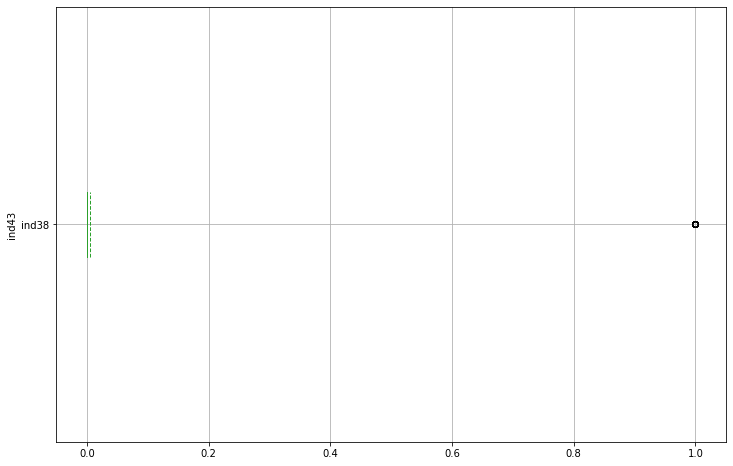

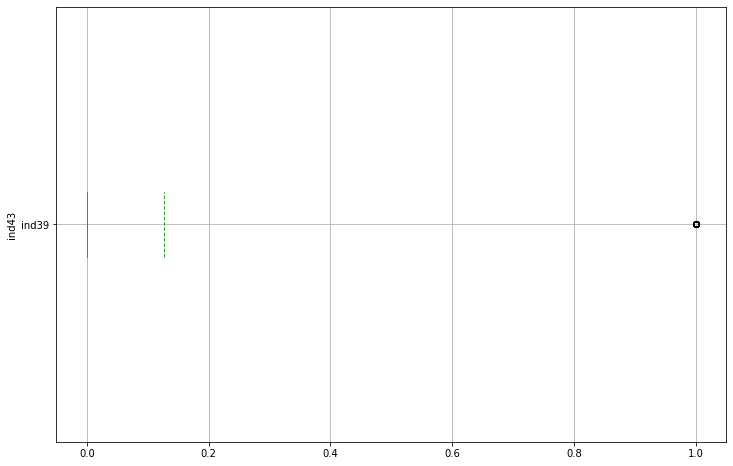

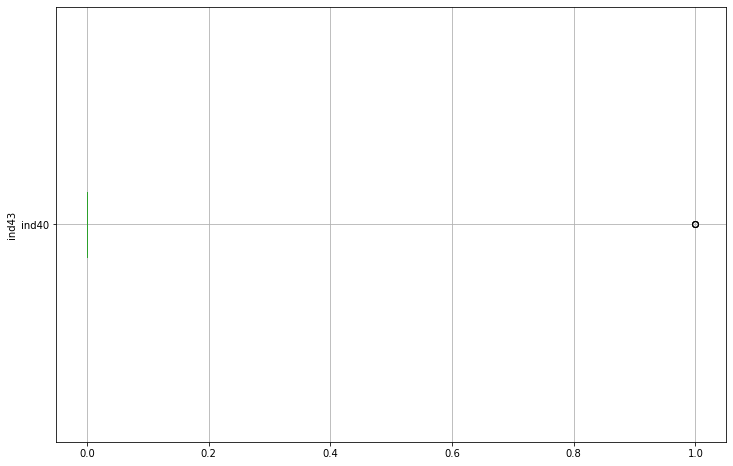

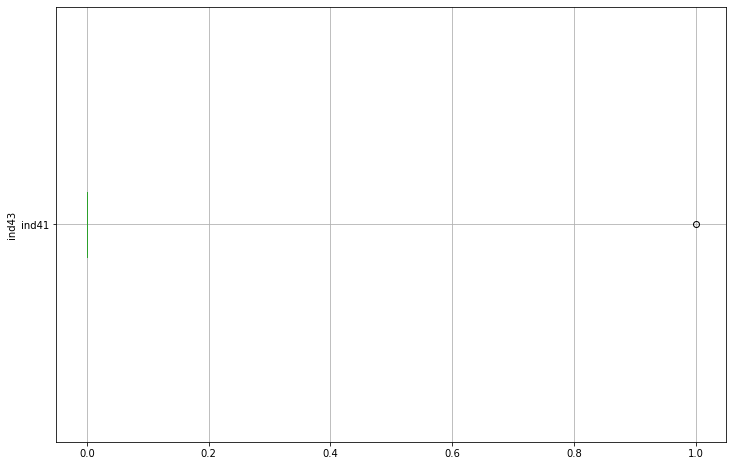

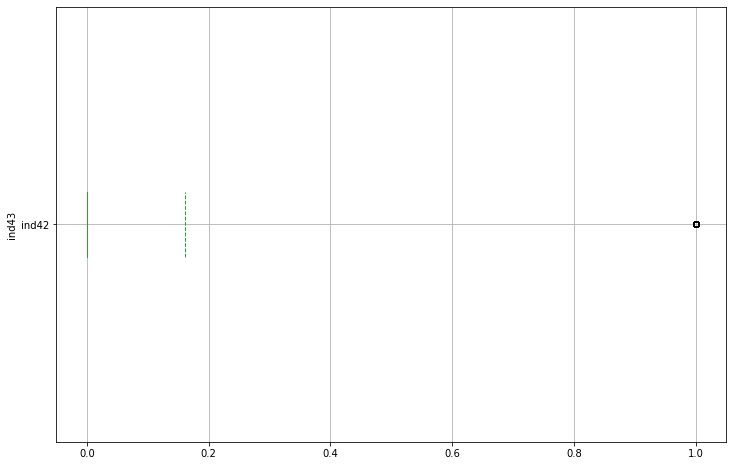

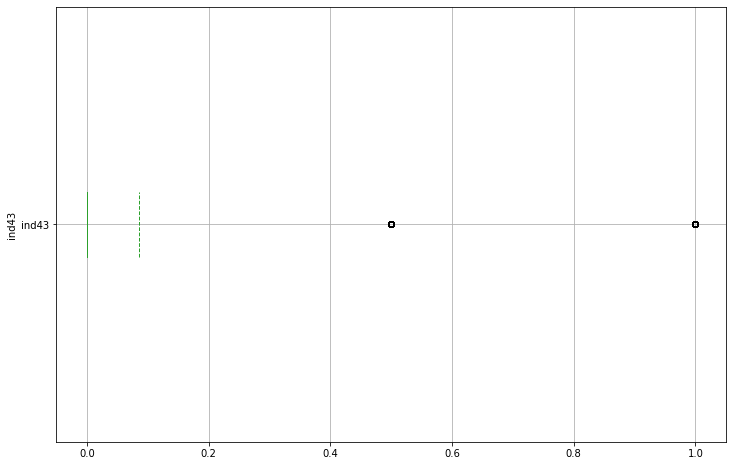

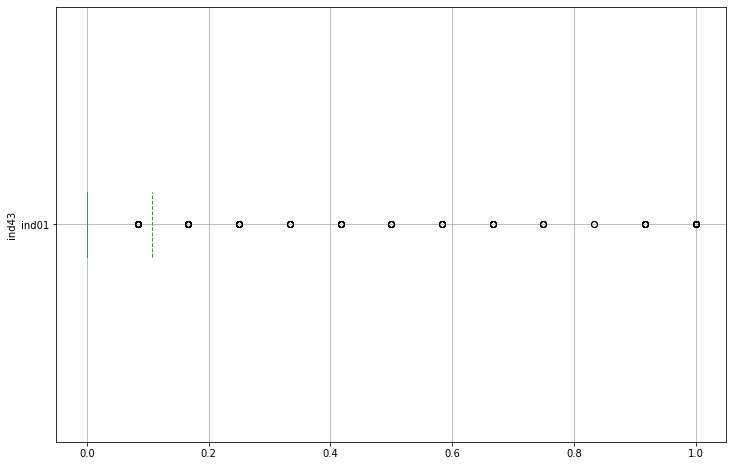

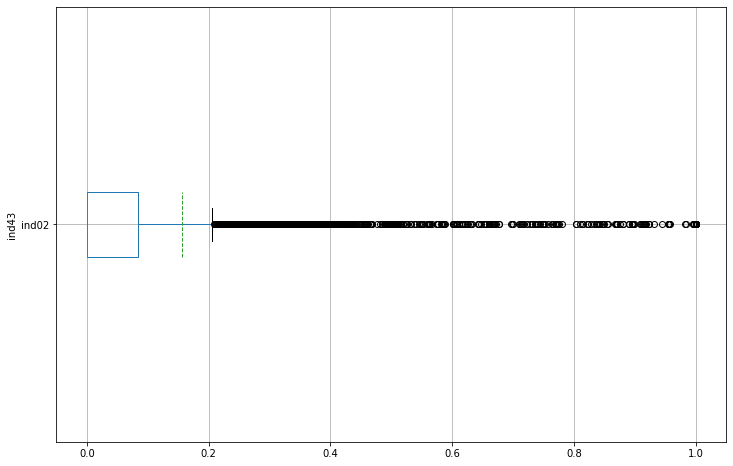

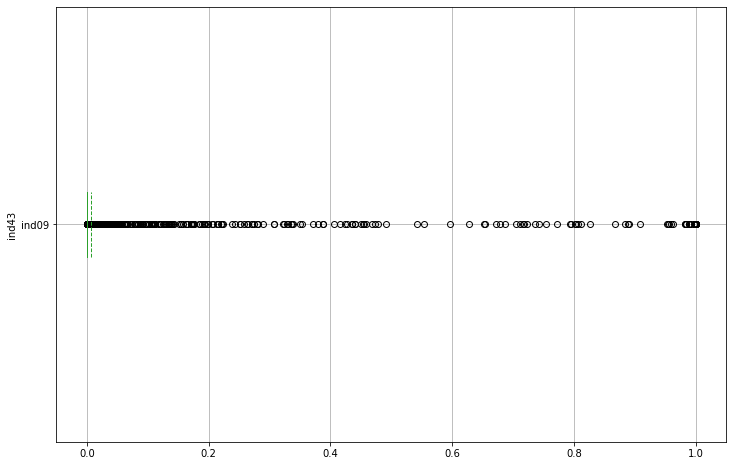

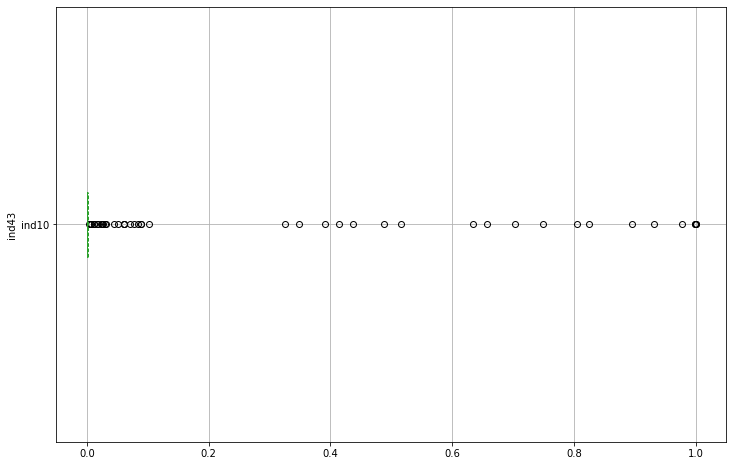

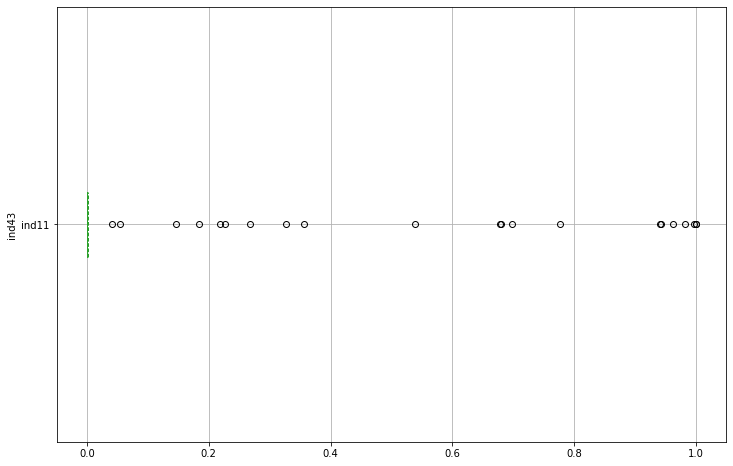

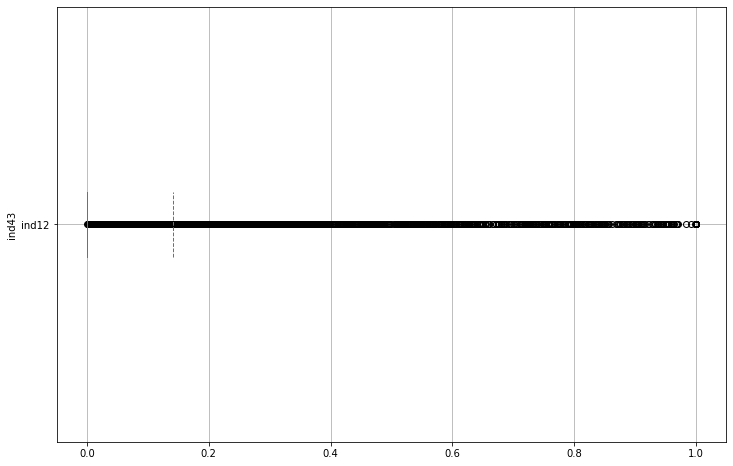

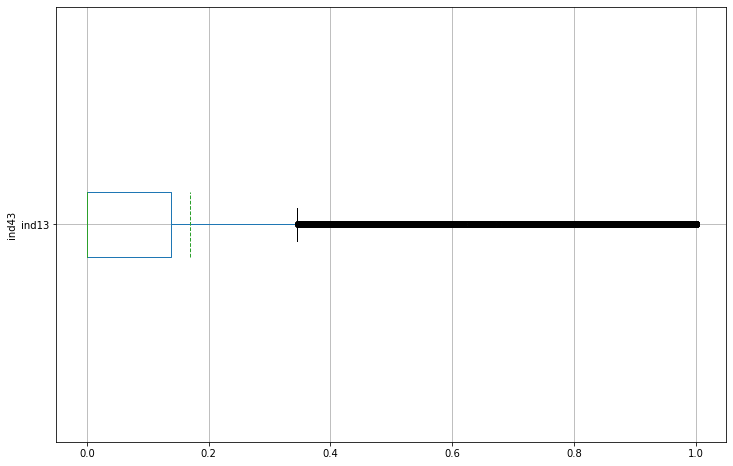

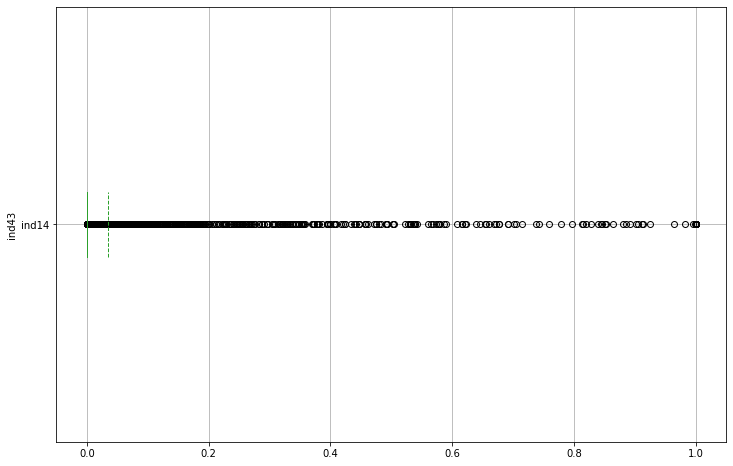

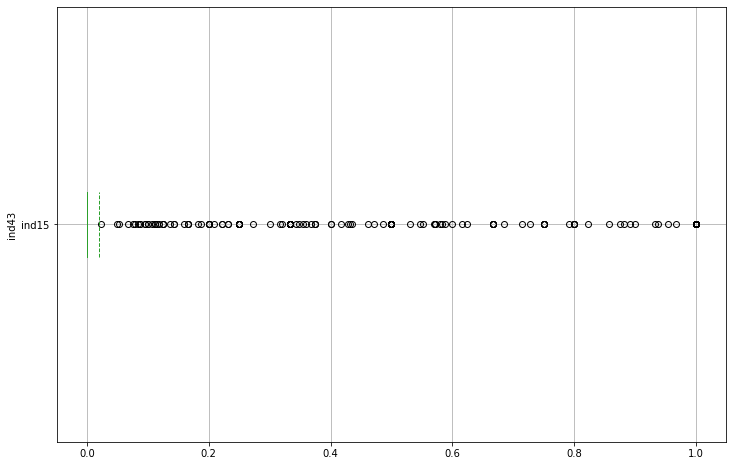

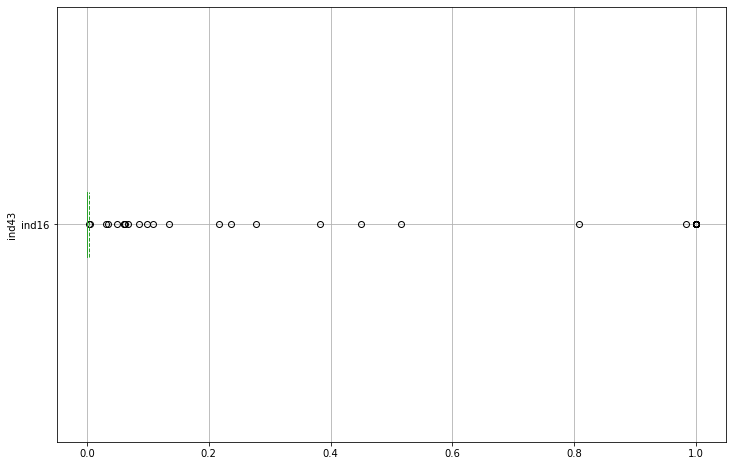

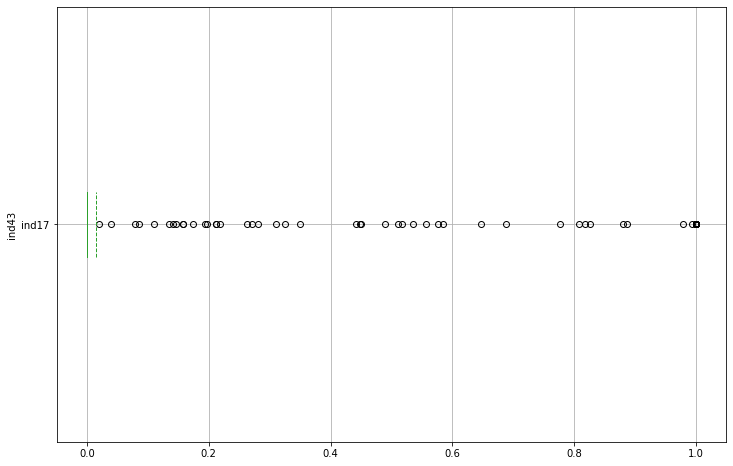

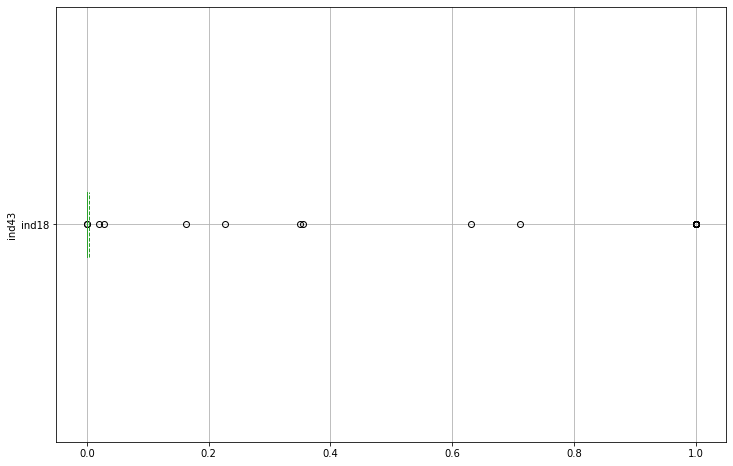

In [ ]:
#ANTES DE TRATAR missing
#outliers na lsita geral
for y in l_geral_out_trei:
    df_rec_trei[[y]].plot(kind = 'box',showmeans = True, meanline = True,
                                   grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
for h in l_lista_geral:
    df_rec_trei, limite_superior_outliers = trata_outliers(df=df_rec_trei, coluna=h)

++++++++
coluna: md1
IQR: 0.00603226914163212
Limite inferior para outlier: -0.009045826331565724; Limite superior para outliers: 0.015083250234962757
Media: 0.011669523491646034
++++++++
coluna: md2
IQR: 0.010317917138124827
Limite inferior para outlier: -0.013054929071653832; Limite superior para outliers: 0.028216739480845476
Media: 0.012927650570991408
++++++++
coluna: md3
IQR: 0.007825731774469255
Limite inferior para outlier: 0.0983384817153378; Limite superior para outliers: 0.12964140881321481
Media: 0.11826675569728777
++++++++
coluna: md4
IQR: 0.011236401576681609
Limite inferior para outlier: -0.01685460236502241; Limite superior para outliers: 0.02809100394170402
Media: 0.013957640580040268
++++++++
coluna: md5
IQR: 0.004188881583286521
Limite inferior para outlier: -0.006283322374929781; Limite superior para outliers: 0.0104722039582163
Media: 0.009200155175519746
++++++++
coluna: md6
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.0

###DF_trei sem missign e out

In [ ]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.00

In [ ]:
#4 colunas (id, cnae, rf, target) + 59 = 63 / 59*2 = 118 ; 118+4 = 122 colunas
df_rec_trei.shape

(11033, 122)

In [ ]:
df_rec_trei_antes_t = df_rec_trei.copy()

In [ ]:
df_rec_trei_antes_t.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       ...
       'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o', 'ind39_o',
       'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o'],
      dtype='object', length=122)

In [ ]:
df_rec_trei_antes_t.drop(columns = ['md1','md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11',
                                    'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',	'ind02','ind03', 'ind04', 'ind05', 'ind06','ind07',
                                    'ind08',	'ind09', 	'ind10',	'ind11', 	'ind12',	'ind13',	'ind14',	'ind15',	'ind16',	'ind17',	'ind18',	'ind19',	'ind20',
                                    'ind21',	'ind22',	'ind23',	'ind24',	'ind25',	'ind26', 'ind27',	'ind28',	'ind29',
                                    'ind30',	'ind31',	'ind32',	'ind33',	'ind34',	'ind35',	'ind36',	'ind37',	'ind38',	'ind39',	'ind40',	'ind41',	'ind42',	'ind43'], inplace=True)

In [ ]:
df_rec_trei_antes_t

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,0,86,i,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.000000,0.028100,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,18,z,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.000000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.140845,0.028600,0.000000,0.0,0.0,0.0,0.0,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,2,74,z,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.000000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,3,49,q,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,4,47,i,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.126892,0.0,0.0,0.161425,0.085969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,12026,23,s,0,0.000000,0.001208,0.109509,0.000000,0.000729,0.0,0.001812,0.019529,0.000000,0.001546,0.0,0.130852,0.000382,0.000000,0.000355,0.000411,0.106393,0.156942,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.128900,0.000000,0.0,0.0,0.0,0.0,1.0,0.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,0.1667,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
11029,12027,49,v,0,0.000003,0.016780,0.122363,0.006032,0.006032,0.0,0.016780,0.034232,0.012331,0.012330,0.0,0.134558,0.000988,0.000000,0.001029,0.002252,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.125000,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
11030,12030,47,y,1,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,0.019253,0.000000,0.000000,0.0,0.130769,0.000295,0.000000,0.000407,0.000392,0.106393,0.156942,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
11031,12031,47,p,0,0.000021,0.001821,0.109838,0.

In [ ]:
df_rec_trei_antes_t.columns[:64]

Index(['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
       'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
       'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
       'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
       'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
       'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
       'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o'],
      dtype='object')

In [ ]:
df_rec_trei_antes_t[['rf2']].value_counts()

rf2
z      3320
s      1379
k      1134
y       861
i       861
r       850
d       786
p       666
q       637
v       539
dtype: int64

In [ ]:
df_rec_trei_antes_t.rf2.replace(['z','s','k','y','i','r','d','p','q','v'], [1,2,3,4,5,6,7,8,9,10], inplace=True)

In [ ]:
df_rec_trei_antes_t

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,0,86,5,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.000000,0.028100,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,18,1,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.000000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.140845,0.028600,0.000000,0.0,0.0,0.0,0.0,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,2,74,1,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.000000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,3,49,9,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,4,47,5,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.126892,0.0,0.0,0.161425,0.085969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,12026,23,2,0,0.000000,0.001208,0.109509,0.000000,0.000729,0.0,0.001812,0.019529,0.000000,0.001546,0.0,0.130852,0.000382,0.000000,0.000355,0.000411,0.106393,0.156942,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.128900,0.000000,0.0,0.0,0.0,0.0,1.0,0.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,0.1667,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
11029,12027,49,10,0,0.000003,0.016780,0.122363,0.006032,0.006032,0.0,0.016780,0.034232,0.012331,0.012330,0.0,0.134558,0.000988,0.000000,0.001029,0.002252,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.125000,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
11030,12030,47,4,1,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,0.019253,0.000000,0.000000,0.0,0.130769,0.000295,0.000000,0.000407,0.000392,0.106393,0.156942,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
11031,12031,47,8,0,0.000021,0.001821,0.109838,0

In [ ]:
df1 = df_rec_trei_antes_t[['id',	'cnae2',	'rf2']].copy()

In [ ]:
df1.head()

,id,cnae2,rf2
0,0,86,5
1,1,18,1
2,2,74,1
3,3,49,9
4,4,47,5


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
df1_st = ss.fit_transform(df1)
df_df1_st = pd.DataFrame(df1_st, columns = ['id', 'cnae2', 'rf2'])

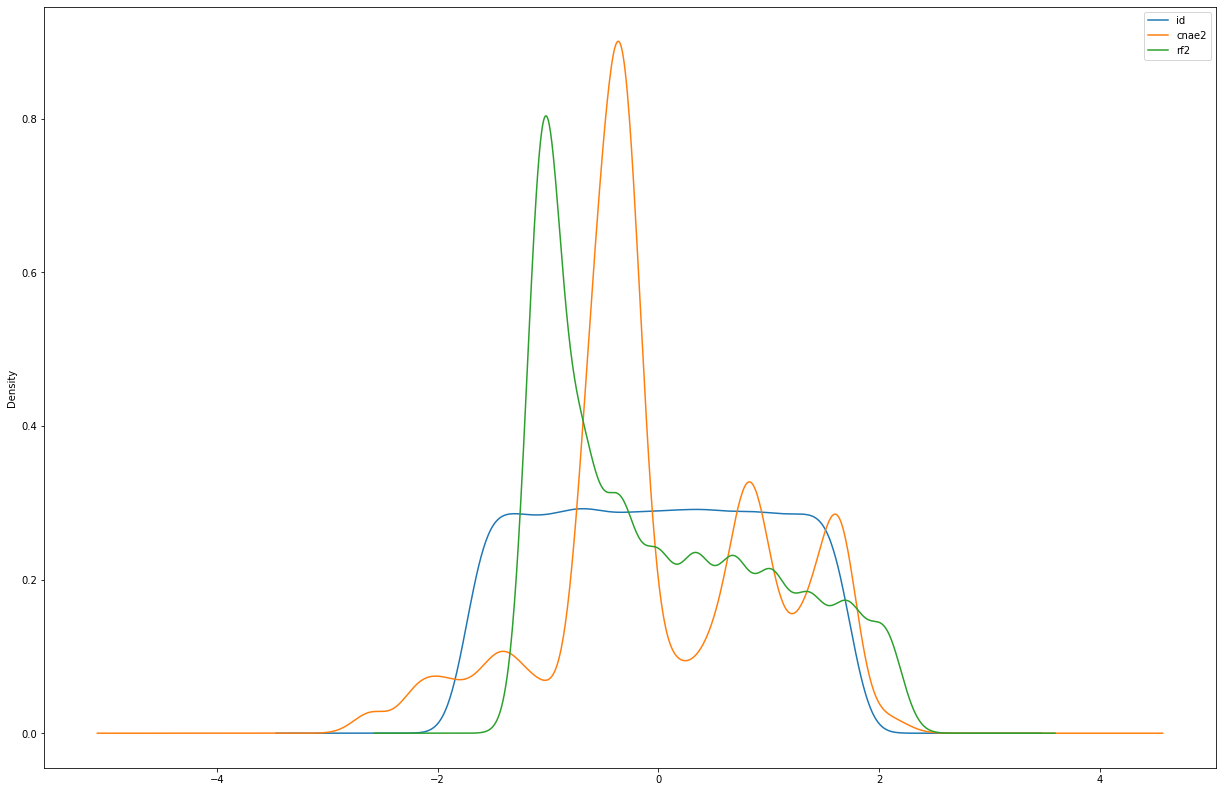

In [ ]:
df_df1_st.plot(kind = 'kde', figsize=(21,14))

In [ ]:
df_df1_st.head()

,id,cnae2,rf2
0,-1.730870,1.654273,0.338212
1,-1.730582,-1.765493,-1.033283
2,-1.730293,1.050785,-1.033283
3,-1.730005,-0.206482,1.709708
4,-1.729717,-0.307064,0.338212


In [ ]:
df_rec_trei_antes_t['id']= df_df1_st['id'].copy()
df_rec_trei_antes_t['cnae2'] =df_df1_st['cnae2'].copy()
df_rec_trei_antes_t['rf2'] = df_df1_st['rf2'].copy()

In [ ]:
df_rec_trei_antes_t.head()

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,-1.730870,1.654273,0.338212,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,-1.730582,-1.765493,-1.033283,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,-1.730293,1.050785,-1.033283,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,-1.730005,-0.206482,1.709708,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,-1.729717,-0.307064,0.338212,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.126892,0.0,0.0,0.161425,0.085969


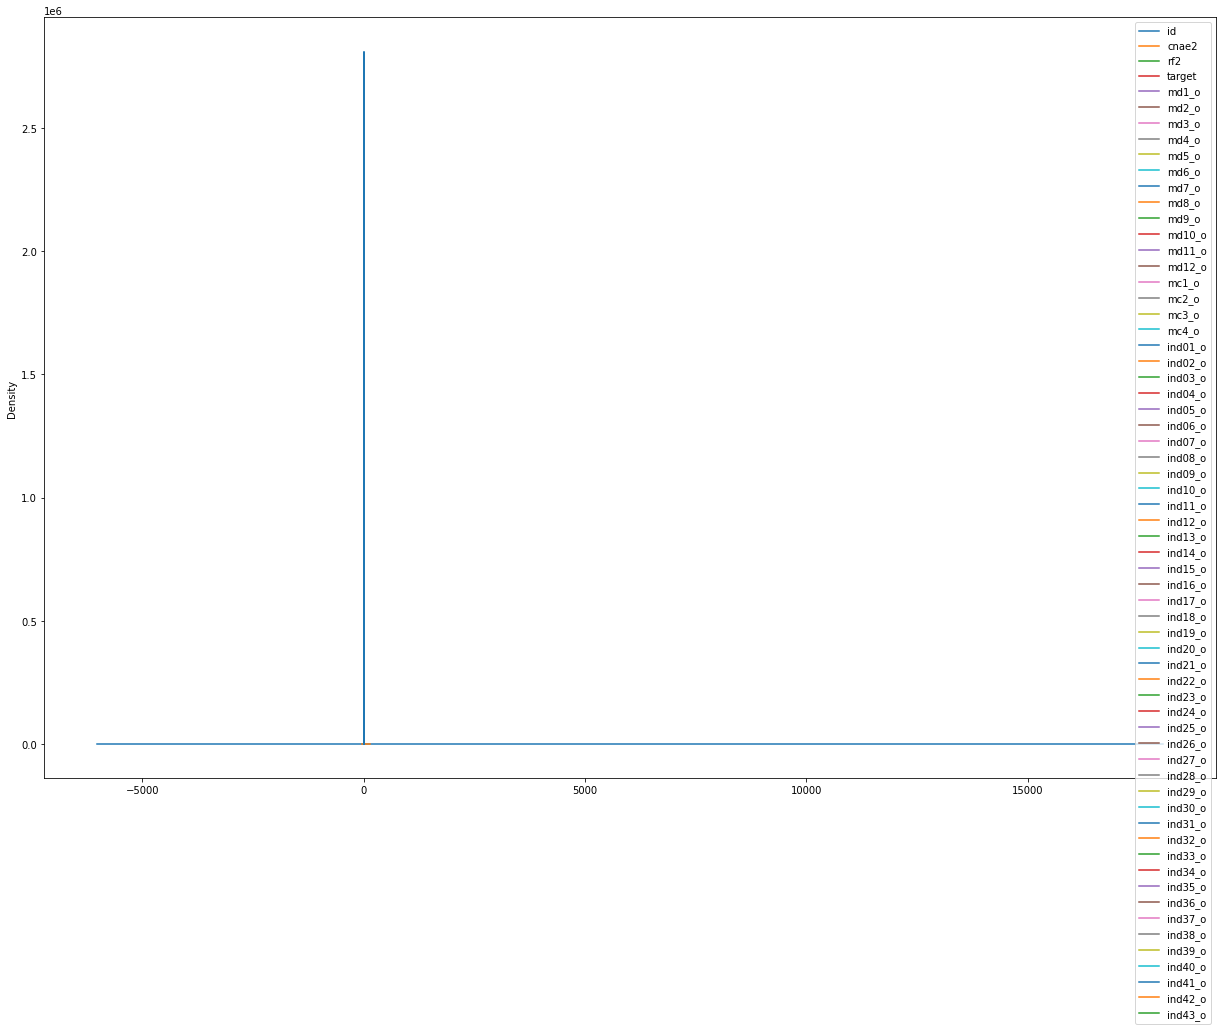

In [ ]:
df_rec_trei_antes_t.plot(kind = 'kde', figsize=(21,14))

In [ ]:
'''l = ['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
       'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
       'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
       'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
       'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
       'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
       'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
rec_trei_st = ss.fit_transform(df_rec_trei_antes_t)
df_rec_trei_st = pd.DataFrame(rec_trei_st, columns = ['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
       'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
       'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
       'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
       'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
       'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
       'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o'])

# Gráfico


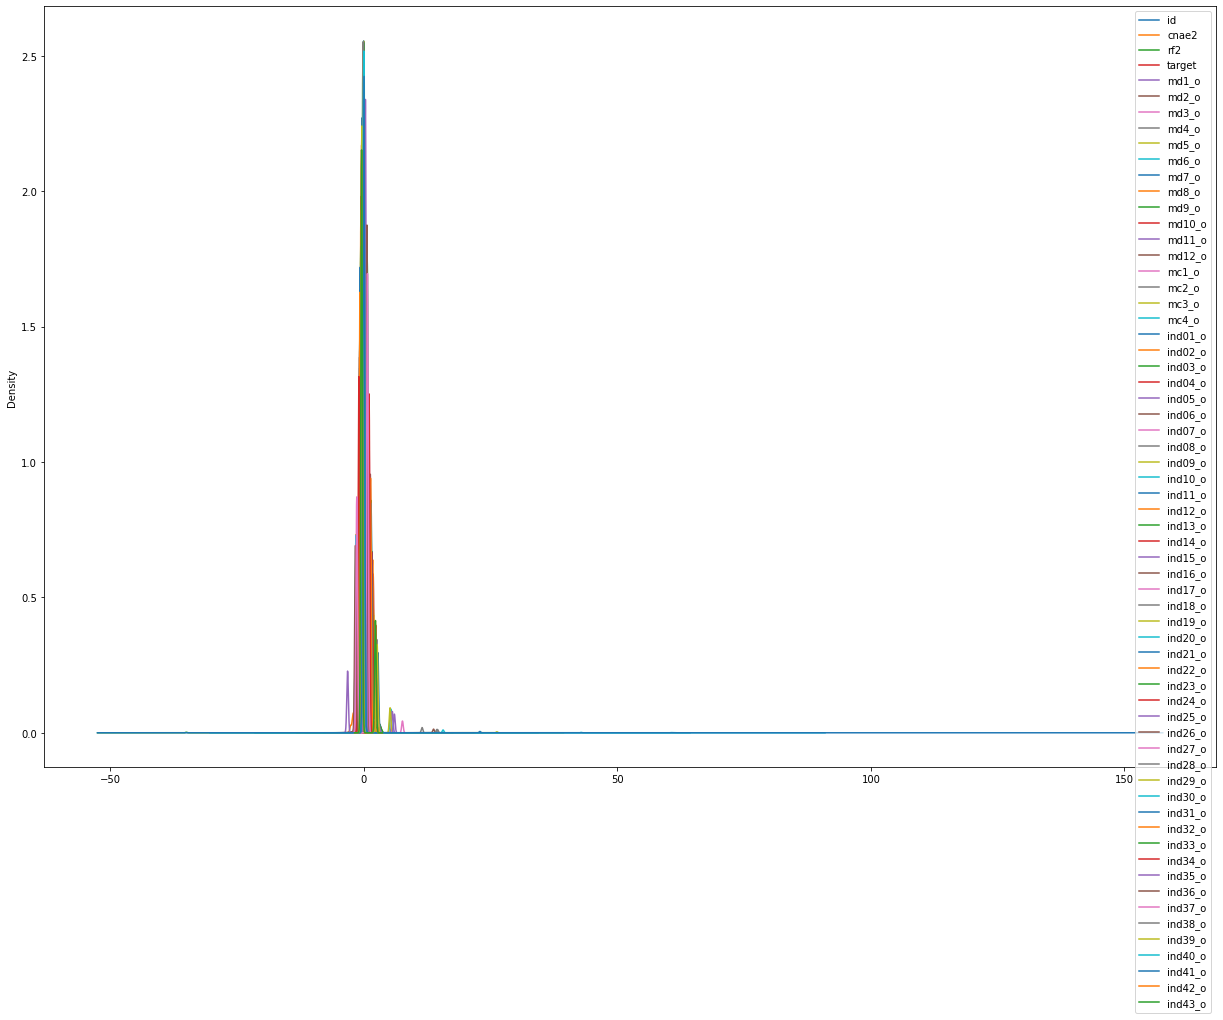

In [ ]:
df_rec_trei_st.plot(kind = 'kde', figsize=(21,14))

In [ ]:
df_rec_trei_st

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,-1.730870,1.654273,0.338212,1.837981,1.798419,0.615792,-0.595287,-0.367558,0.225527,-0.188609,0.870152,-0.749442,-0.403579,0.194521,-0.178045,-0.672982,1.431576,2.538635,-0.555053,1.280758,-0.360991,-0.261178,-0.735539,-0.806095,-0.841568,-0.839062,-0.707050,-0.804816,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,0.673623,-1.556934,-1.251442,-1.233288,-0.748753,-0.735491,1.452220,-1.318588,-1.146977,-0.087063,-0.038109,-0.023326,-0.701970,-0.760228,0.028573,-0.975378,0.312048,0.607337,0.716694,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
1,-1.730582,-1.765493,-1.033283,-0.544075,0.580178,1.953502,2.321880,-0.844328,1.898804,-0.188609,2.505658,2.770144,-0.882126,1.580670,-0.178045,1.139848,2.368524,2.538635,1.851280,1.280758,-0.360991,-0.693879,1.392895,0.117190,0.092937,0.655969,-0.689384,-0.787562,-0.1932,-0.063995,-0.043669,1.737194,-0.260043,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,-1.540288,0.136321,0.946130,0.956324,-0.415572,-0.069378,-0.670530,-0.351164,-0.852014,-0.087063,-0.038109,-0.023326,1.424563,-0.760228,0.028573,1.025244,-3.204631,0.607337,-1.395295,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
2,-1.730293,1.050785,-1.033283,-0.544075,-0.706256,-0.743640,-0.794712,-0.508947,-0.043338,-0.188609,-0.843823,-0.891606,-0.552146,-0.091399,-0.178045,-0.935039,-0.864361,-0.393912,-0.641343,-0.643141,-0.360991,-0.693879,1.392895,1.409612,1.386627,1.276149,-0.707050,-0.804816,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,0.673623,0.663728,0.946130,0.956324,1.582814,1.596020,-0.670530,0.956307,1.025420,-0.087063,-0.038109,-0.023326,1.424563,1.315395,0.028573,1.025244,0.312048,0.607337,0.716694,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
3,-1.730005,-0.206482,1.709708,-0.544075,-0.705628,1.147901,1.379259,-0.844328,-0.681101,-0.188609,0.635836,0.767984,-0.882126,-0.726448,-0.178045,1.139848,-0.432844,-0.393912,-0.648725,-0.759553,-0.360991,-0.693879,-0.735539,-0.806095,-0.841568,-0.839062,-0.170321,-0.280608,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,-1.540288,0.663728,-0.702049,-0.685885,1.388594,1.401806,1.383563,-1.004663,-0.985978,-0.087063,-0.038109,-0.023326,-0.701970,-0.760228,0.028573,-0.975378,0.312048,-1.646532,0.716694,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
4,-1.729717,-0.307064,0.338212,-0.544075,-0.666496,-0.558133,-0.598886,-0.679012,-0.366735,-0.188609,-0.441435,-0.385532,0.370513,1.684271,-0.178045,-0.495543,1.082727,2.538635,1.851280,-0.015729,-0.360991,-0.693879,-0.735539,-0.806095,-0.841568,-0.839062,1.617460,1.465467,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,-1.540288,-1.556934,-1.251442,-1.233288,-0.748753,-0.735491,-0.670530,-1.396951,-1.388355,-0.087063,-0.038109,-0.023326,-0.701970,-0.760228,0.028573,-0.975378,0.312048,-1.646532,-1.395295,-0.069476,2.623112,-0.016492,-0.009521,2.279218,2.279218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,1.734154,-1.514040,-0.690409,-0.544075,-0.707499,-1.019325,-0.933417,-0.844328,-0.476589,-0.188609,-0.982586,-0.964984,-0.882126,-0.412787,-0.178045,-0.711774,-0.489921,-0.393912,-0.342863,-0.394462,2.770152,1.7

In [ ]:
'''l_demais_out = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','ind21', 'ind22', 'ind23', 'ind24',
                'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
                'ind41', 'ind42', 'ind43']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

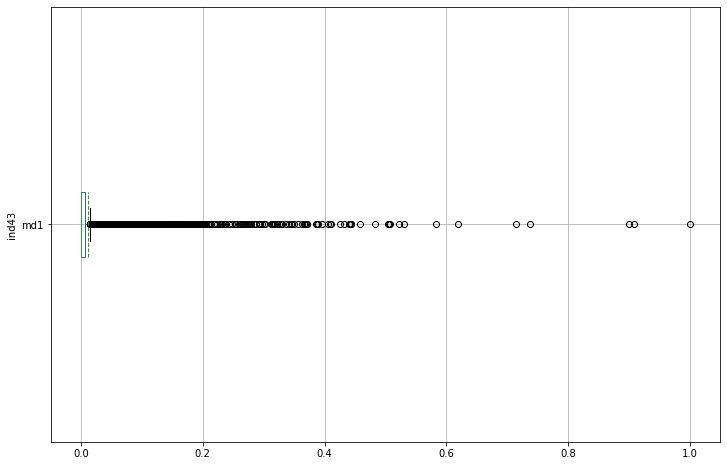

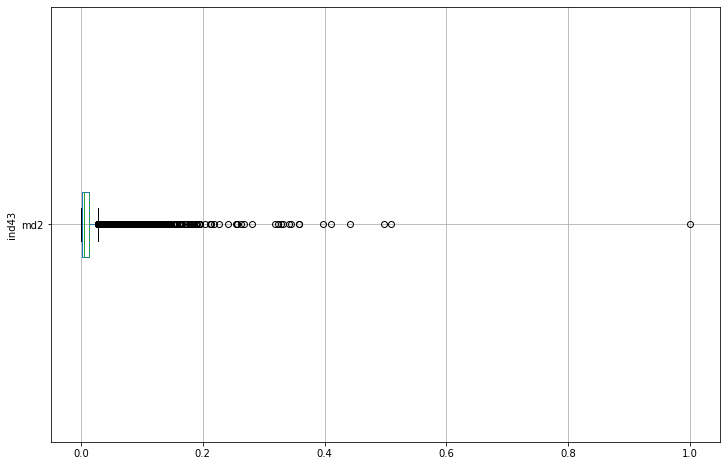

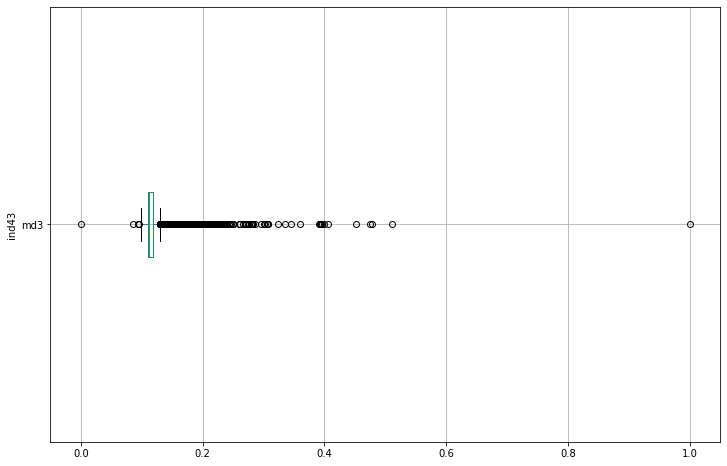

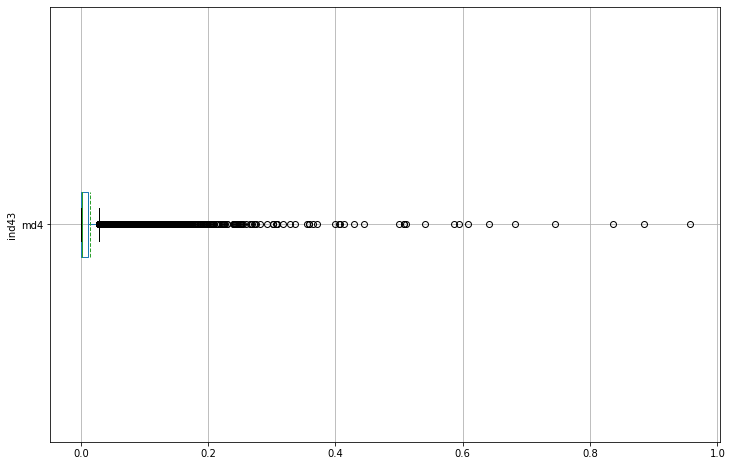

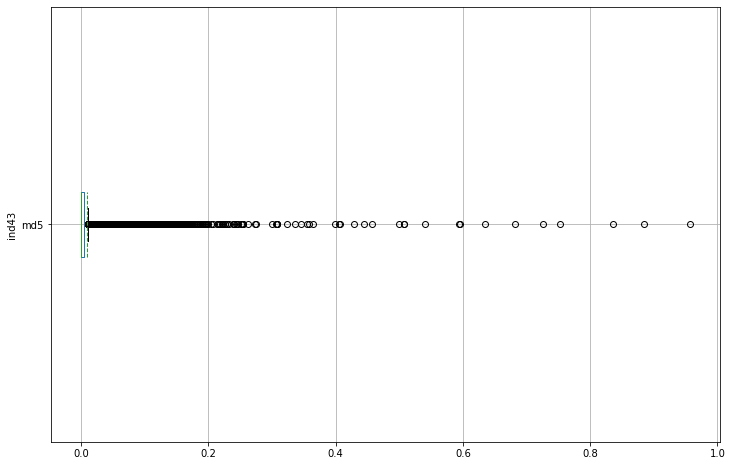

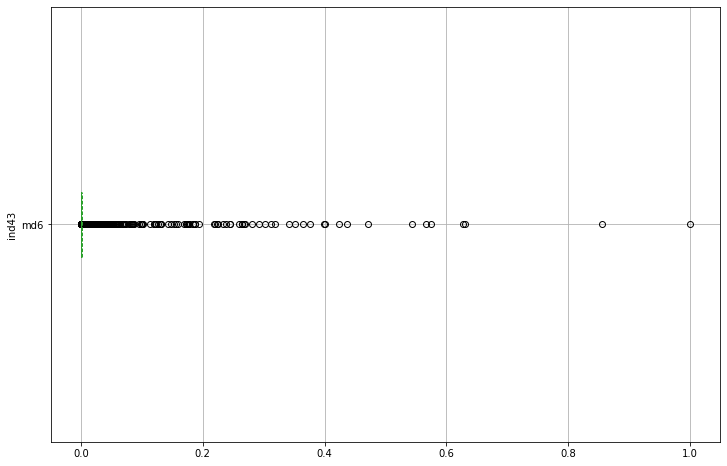

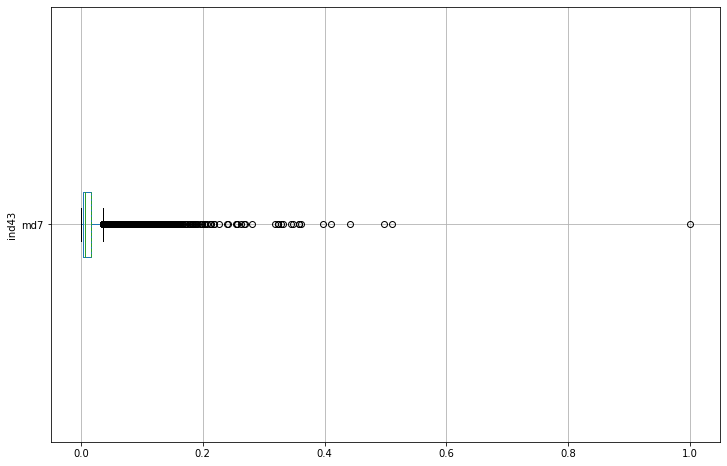

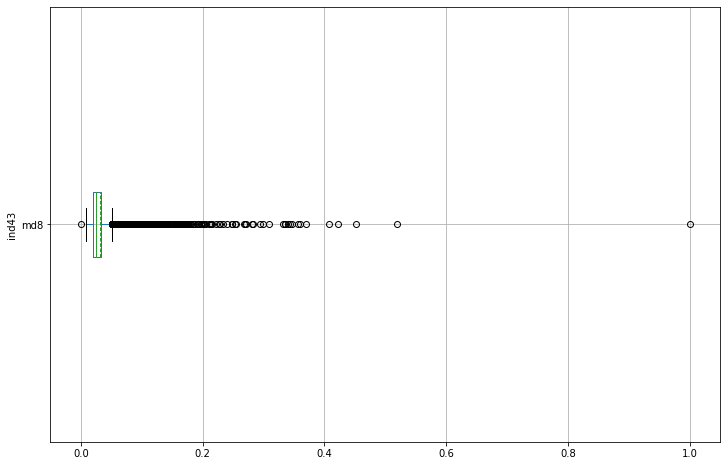

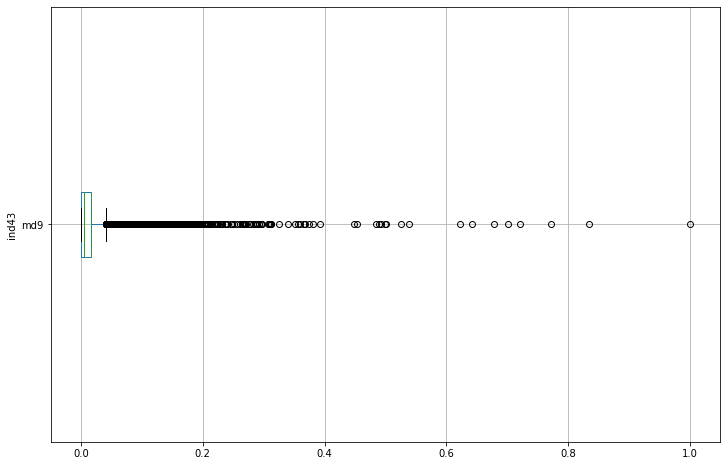

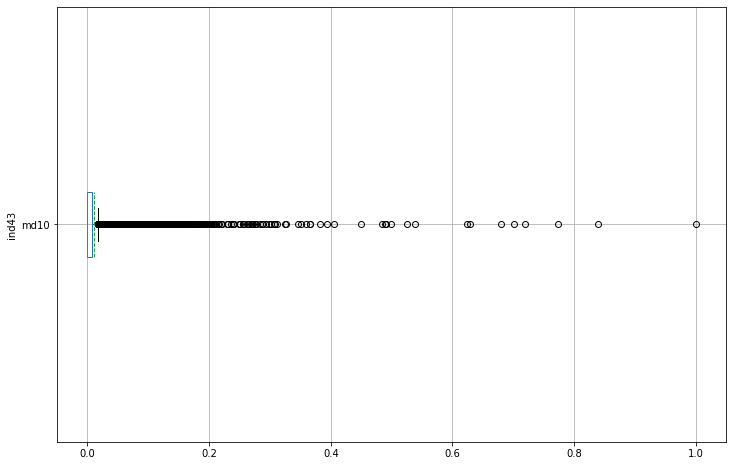

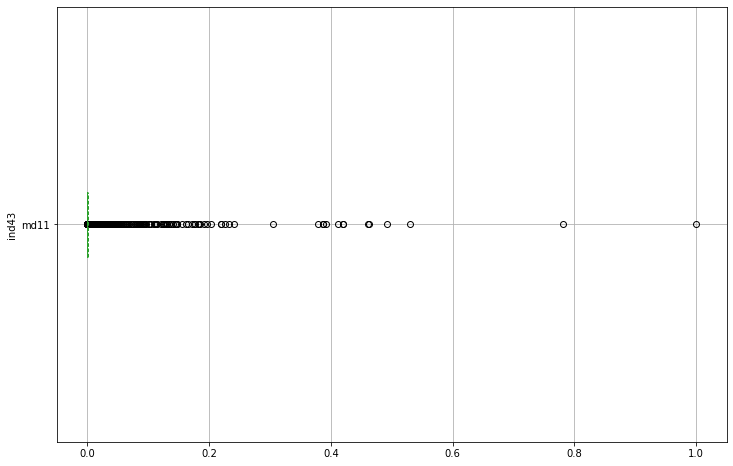

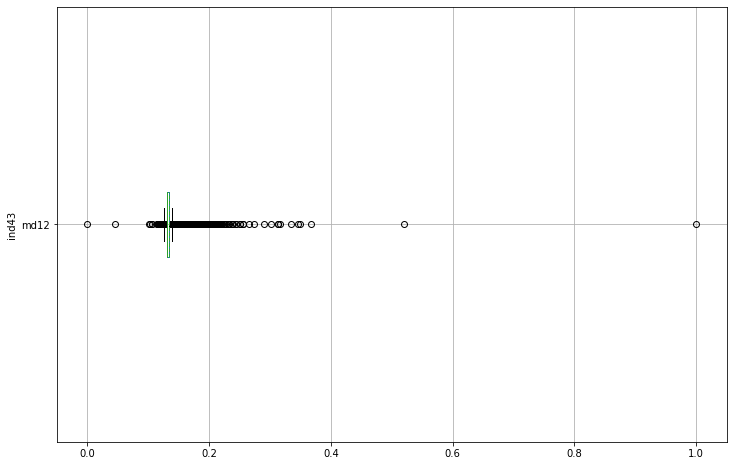

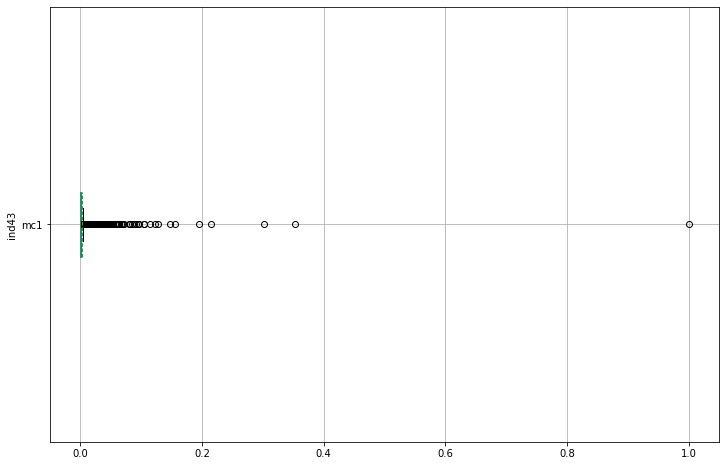

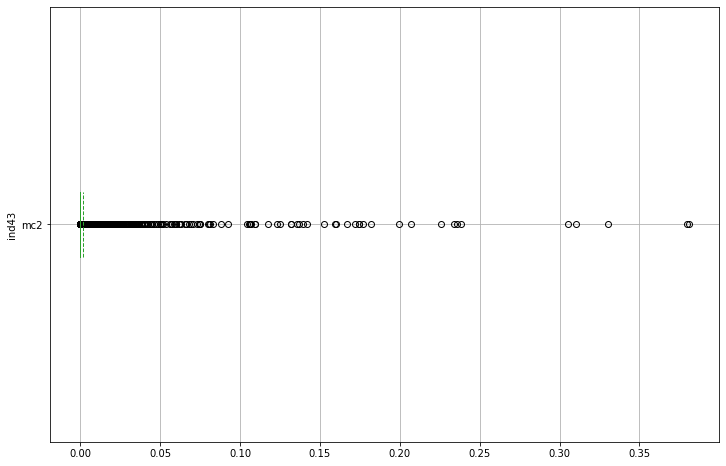

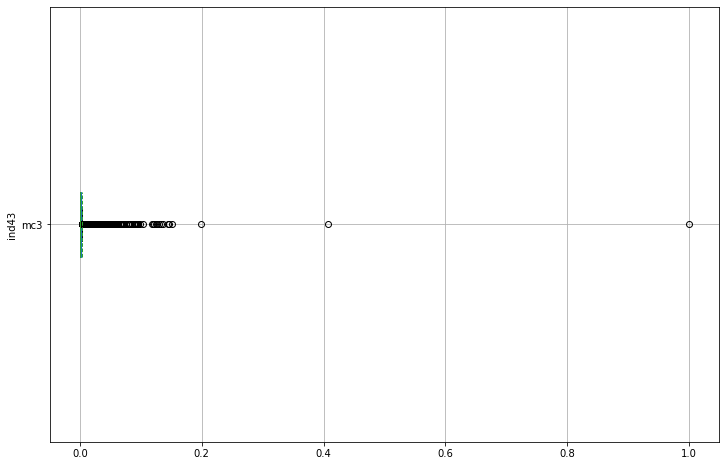

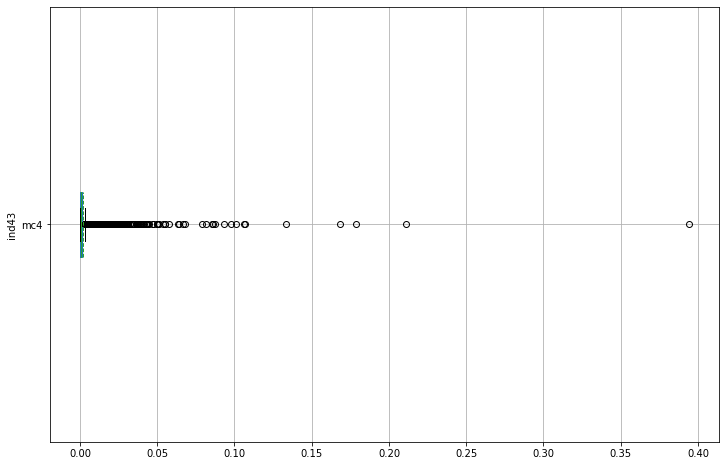

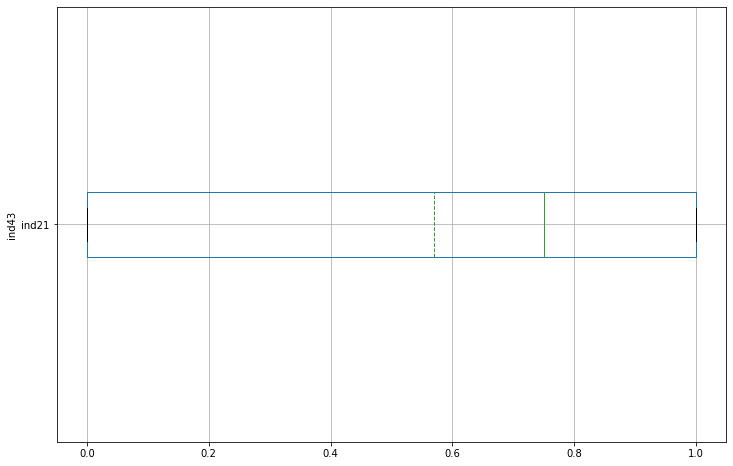

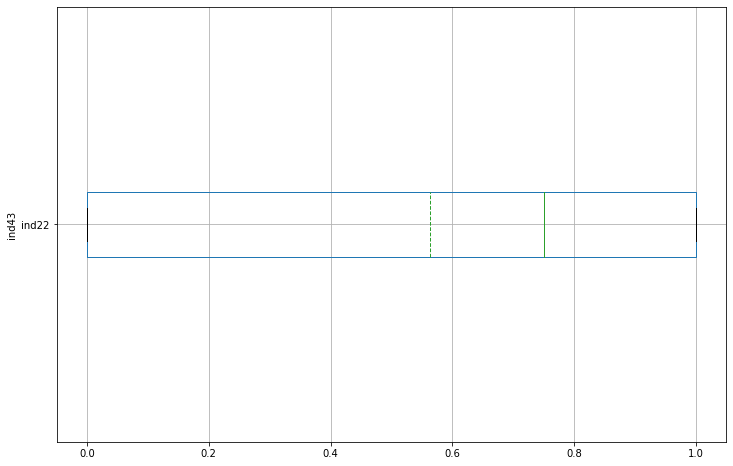

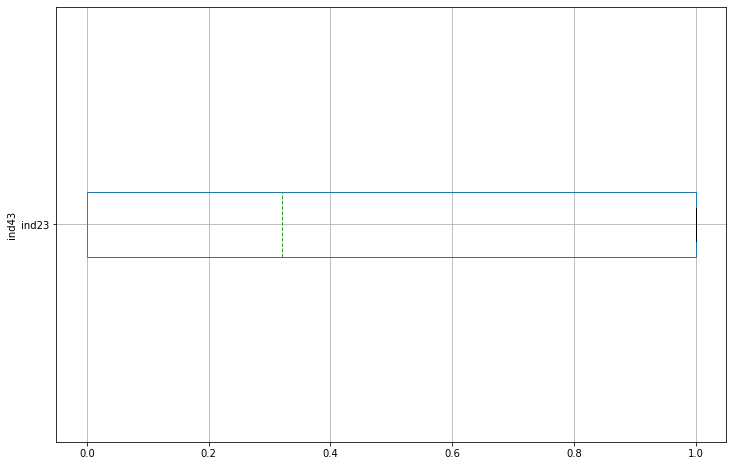

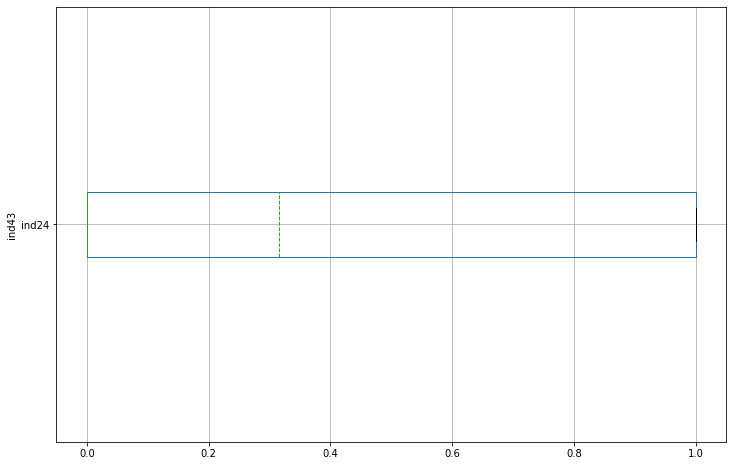

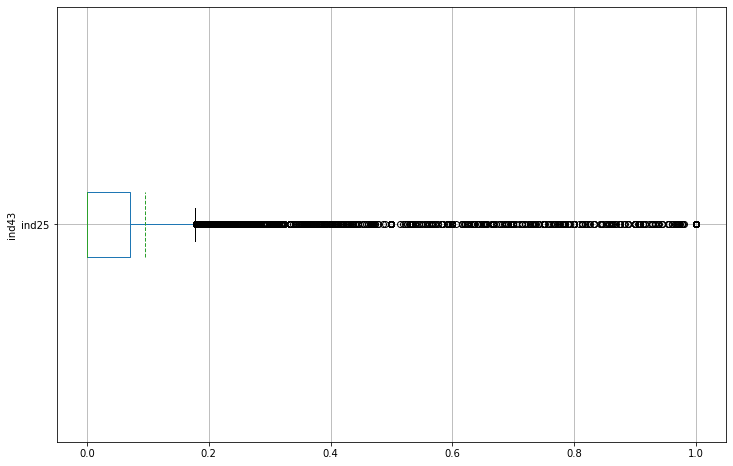

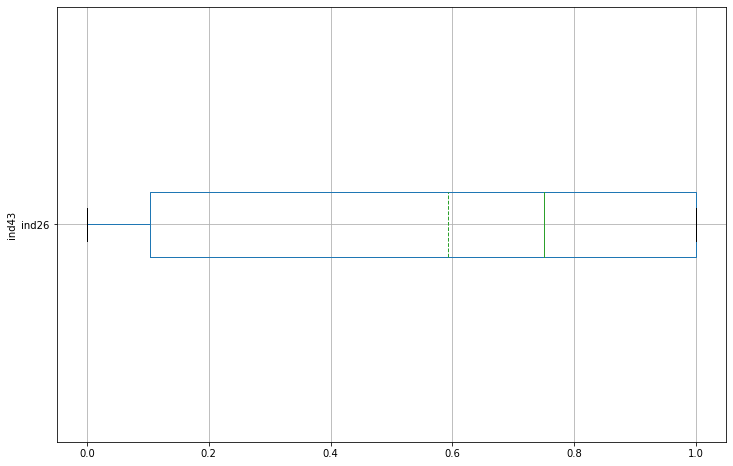

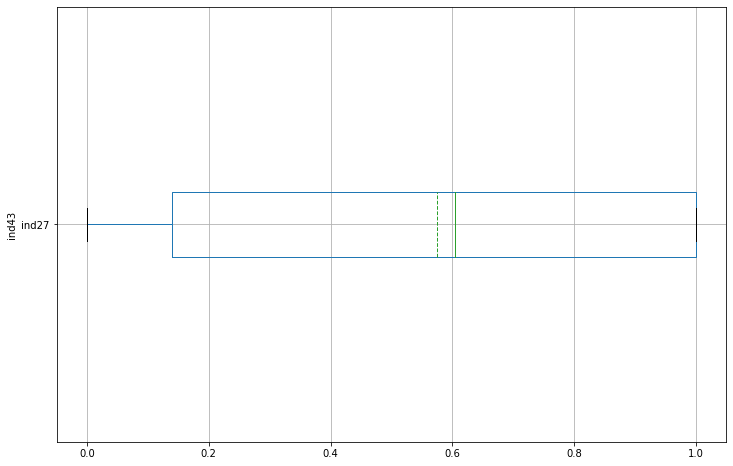

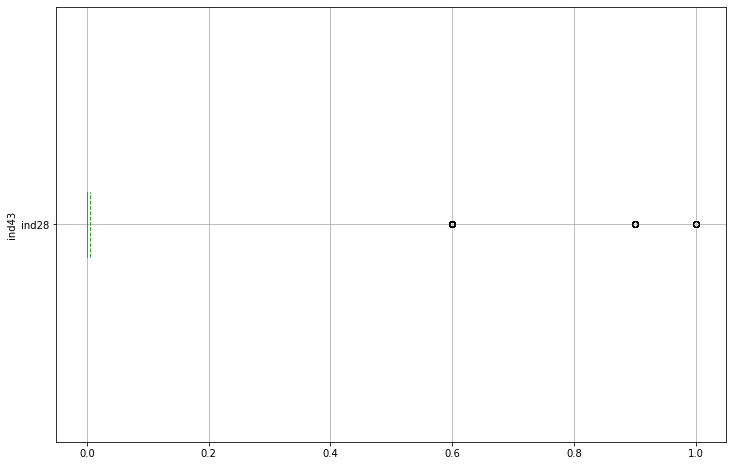

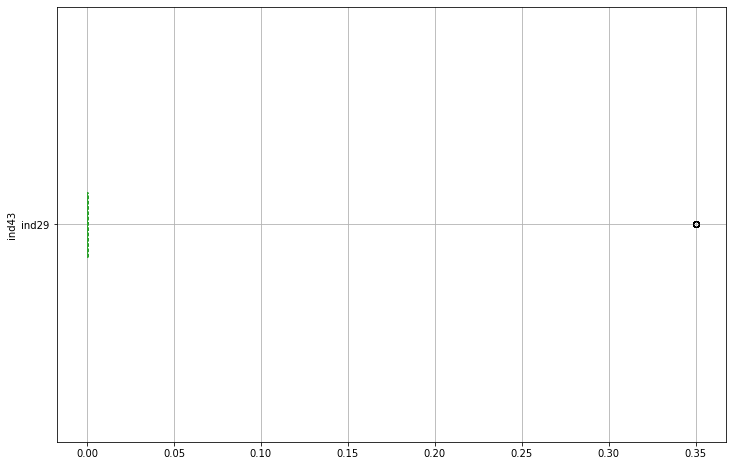

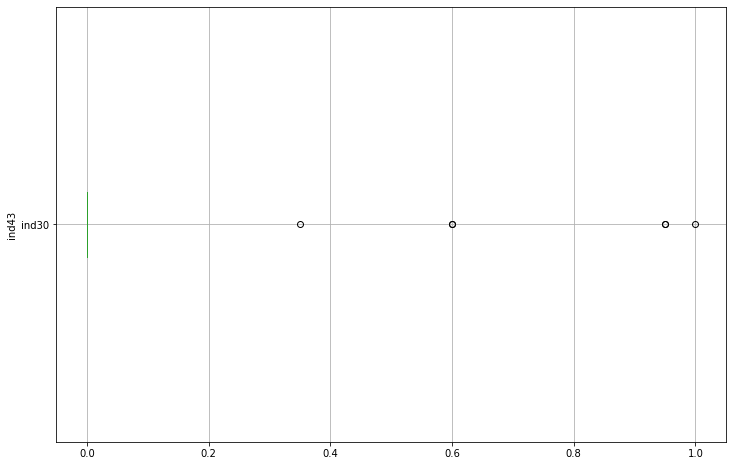

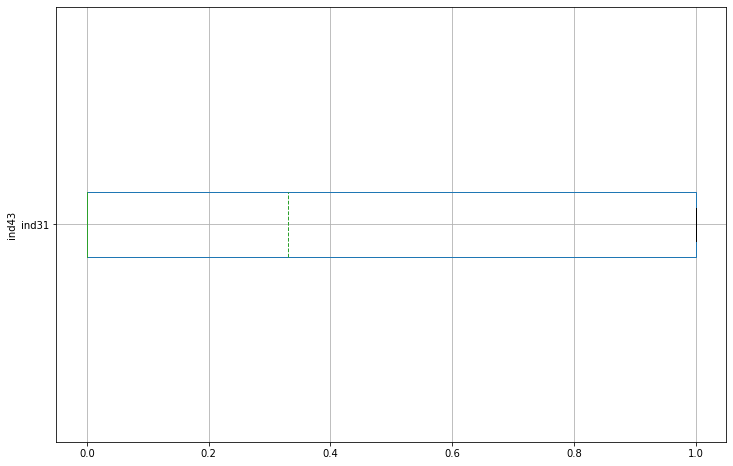

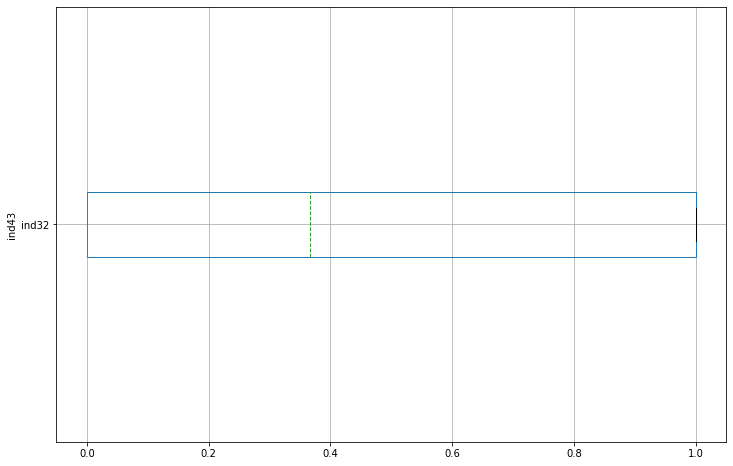

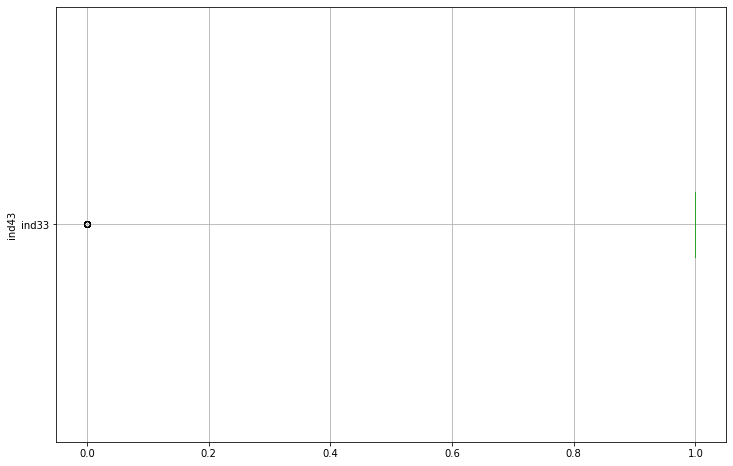

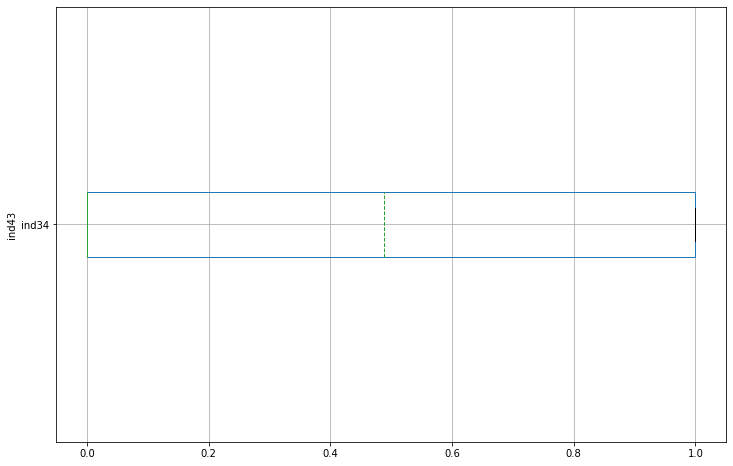

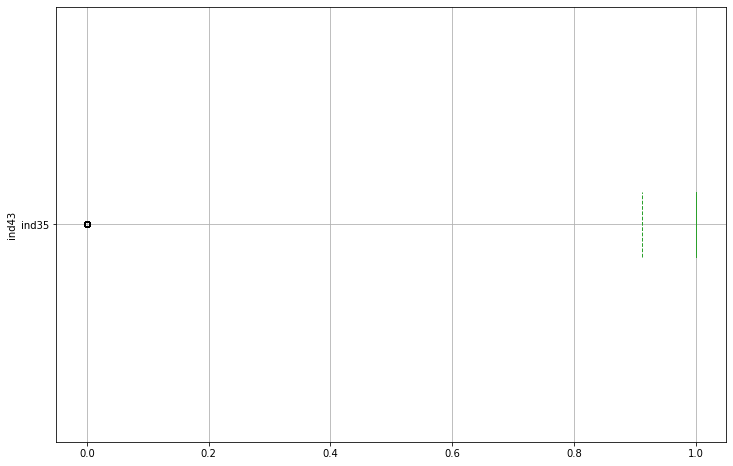

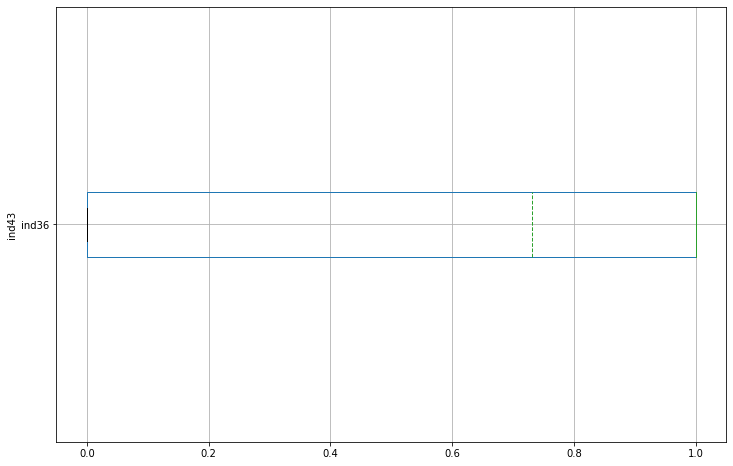

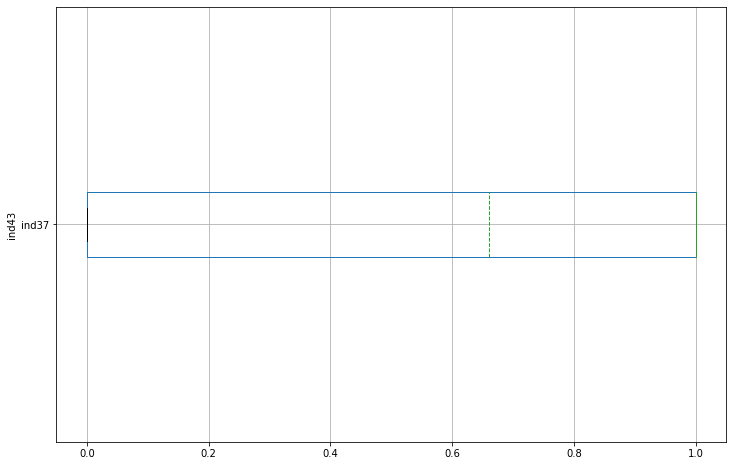

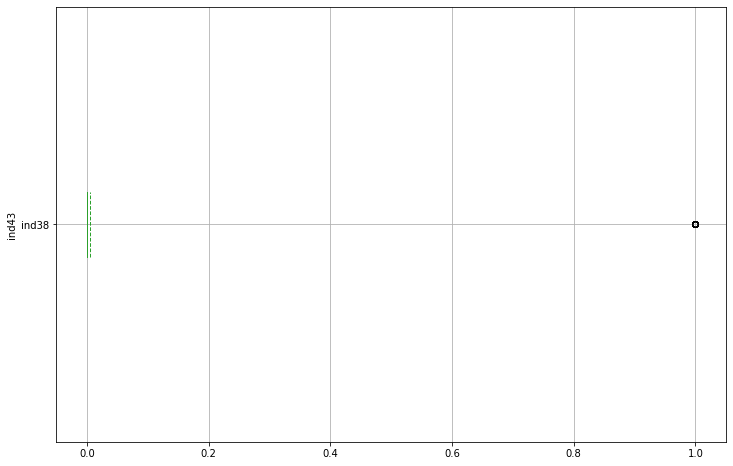

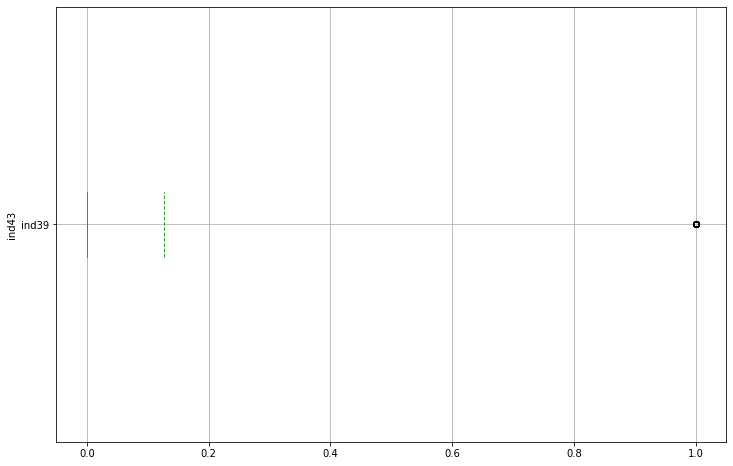

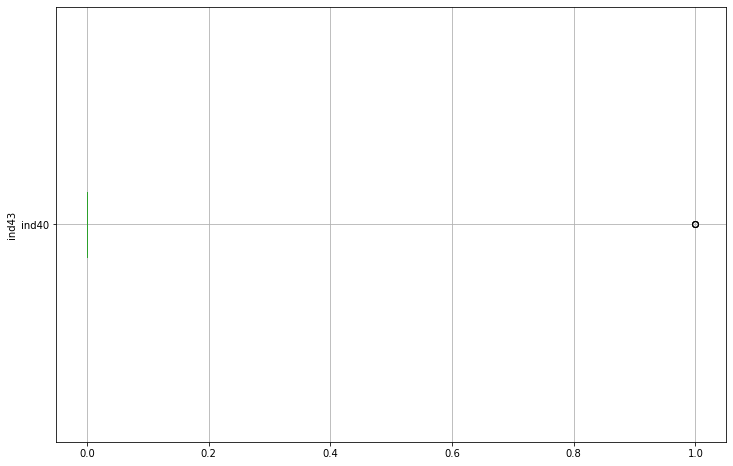

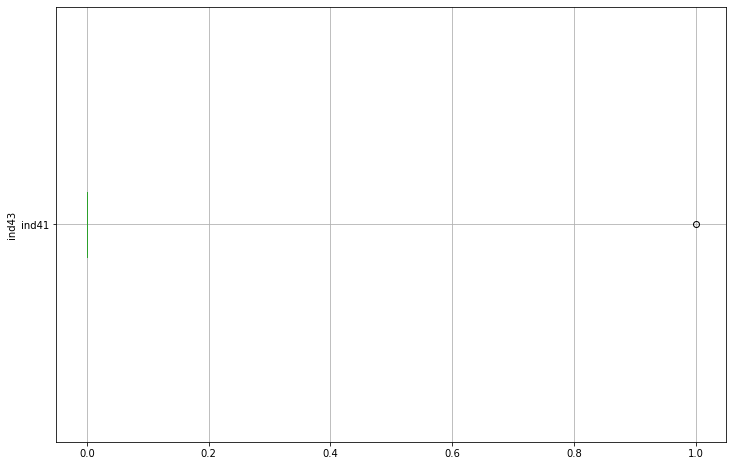

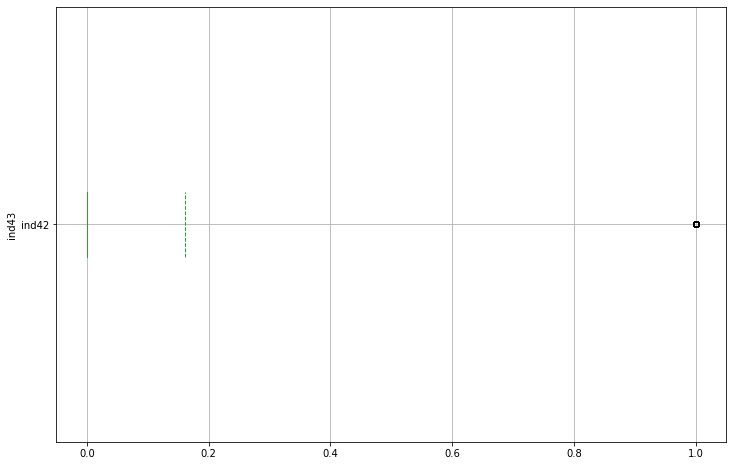

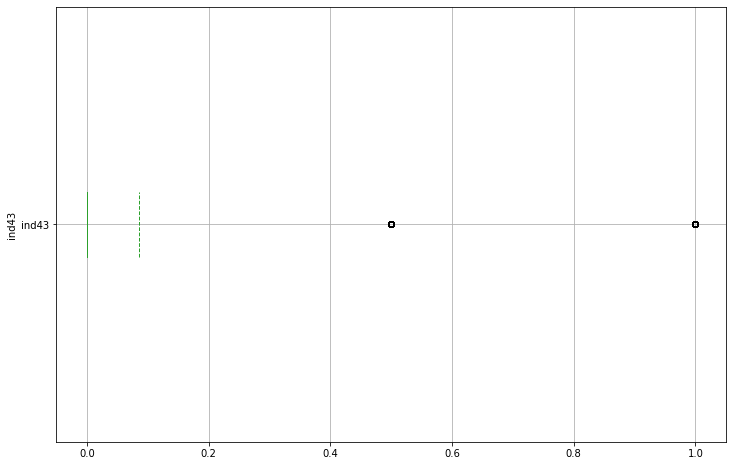

In [ ]:
'''#ANTES DE TRATAR missing
#outliers dos ind01 a ind20
for g in l_demais_out:
    df4[[g]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
'''l_demais_com_out = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
                'ind25', 'ind28', 'ind29', 'ind30', 'ind33', 'ind35', 'ind38', 'ind39', 'ind40',
                'ind41', 'ind42', 'ind43']

In [ ]:
'''for h in l_out_ind0120:
    df_rec_trei, limite_superior_outliers = trata_outliers(df=df_rec_trei, coluna=h)

IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.1063928849814194


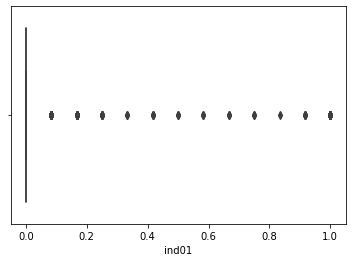

In [ ]:
'''df_rec_trei, limite_superior_outliers = trata_outliers(df=df_rec_trei, coluna='ind01')'''

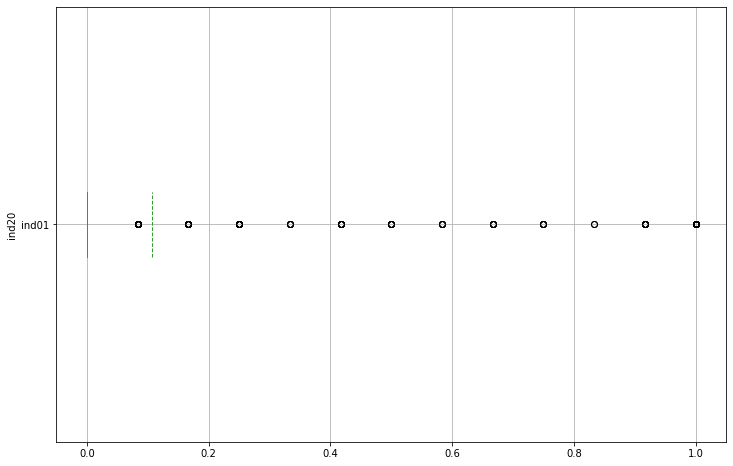

In [ ]:
'''#ANTES DE TRATAR missing
#outliers dos ind01 a ind20
df3[['ind01']].plot(kind = 'box',showmeans = True, meanline = True, grid = True, figsize = (12,8),vert = False, ylabel = d)

IQR: 0.08330000000000004
Limite inferior para outlier: -0.12495000000000006; Limite superior para outliers: 0.2082500000000001
Media: 0.1569422187981514


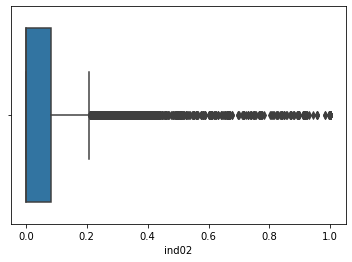

In [ ]:
'''df_rec_trei, limite_superior_outliers = trata_outliers(df=df_rec_trei, coluna='ind02')'''

In [ ]:
'''ind01_outlier = df_rec_trei[df_rec_trei['ind01'] > limite_superior_outliers]
ind01_outlier[['ind01', 'ind01_o']]

,ind01,ind01_o
5,1.0,0.106393
11,1.0,0.106393
24,1.0,0.106393
27,1.0,0.106393
32,1.0,0.106393
...,...,...
11003,1.0,0.106393
11007,1.0,0.106393
11022,1.0,0.106393
11028,1.0,0.106393


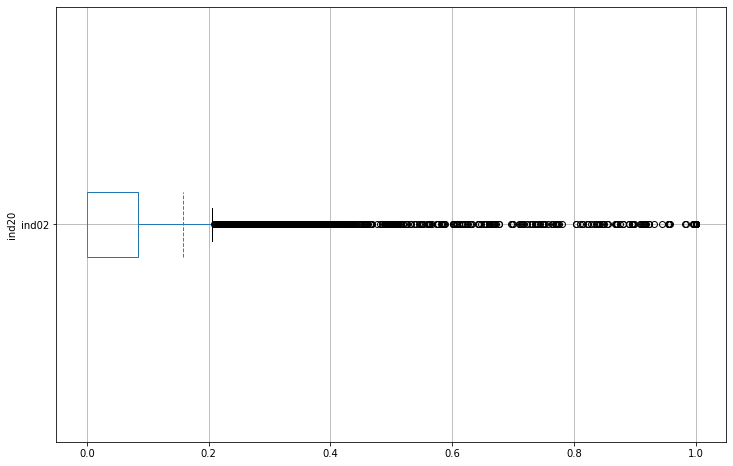

In [ ]:
'''#ANTES DE TRATAR missing
#outliers dos ind01 a ind20
df3[['ind02']].plot(kind = 'box',showmeans = True, meanline = True, grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
'''ind01_outlier = df_rec_trei[df_rec_trei['ind01'] > limite_superior_outliers]
ind01_outlier[['ind02', 'ind02_o']]

,ind02,ind02_o
5,1.0,0.156942
11,1.0,0.156942
24,1.0,0.156942
27,1.0,0.156942
32,1.0,0.156942
...,...,...
11003,1.0,0.156942
11007,1.0,0.156942
11022,1.0,0.156942
11028,1.0,0.156942


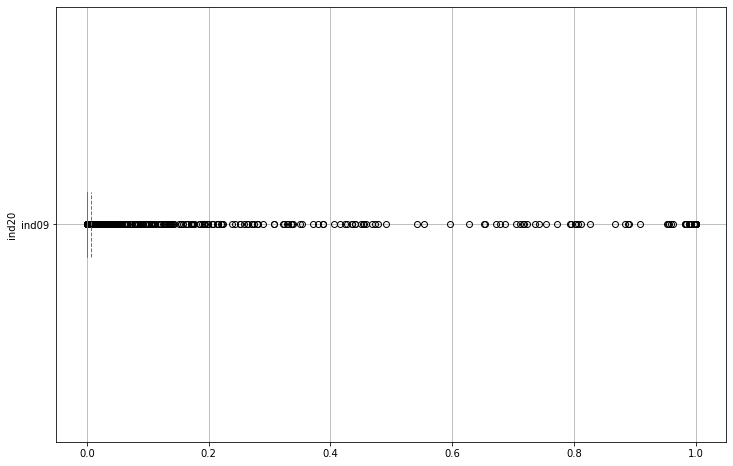

In [ ]:
'''df3[['ind09']].plot(kind = 'box',showmeans = True, meanline = True, grid = True, figsize = (12,8),vert = False, ylabel = d)

IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.007430716940088825


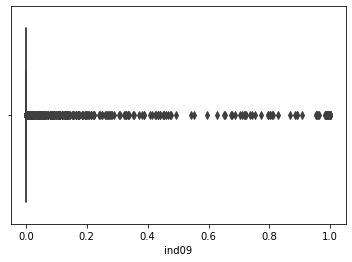

In [ ]:
'''df_rec_trei, limite_superior_outliers = trata_outliers(df=df_rec_trei, coluna='ind09')

In [ ]:
'''#missing values
from sklearn.impute import SimpleImputer

# fit()
imputer_mv = SimpleImputer(strategy = 'mean')
imputer_mv.fit(df3[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']])

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [ ]:
df4 = df_rec_trei[['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']]

In [ ]:
l_demais = df4.columns

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

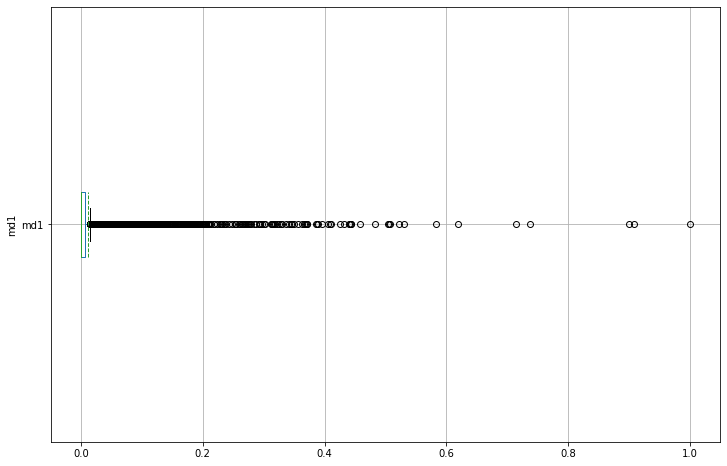

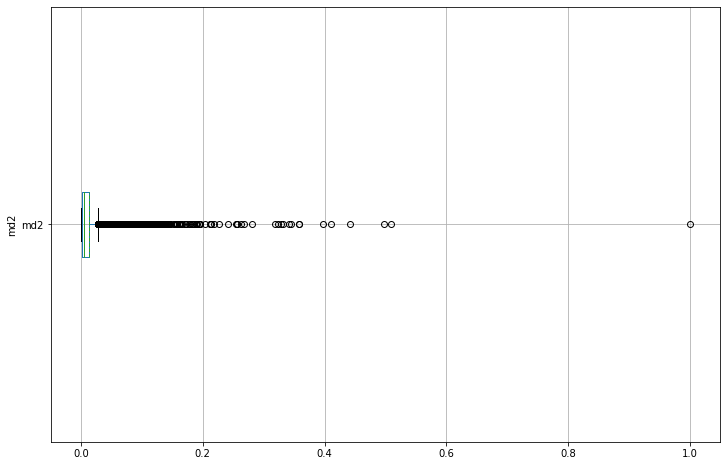

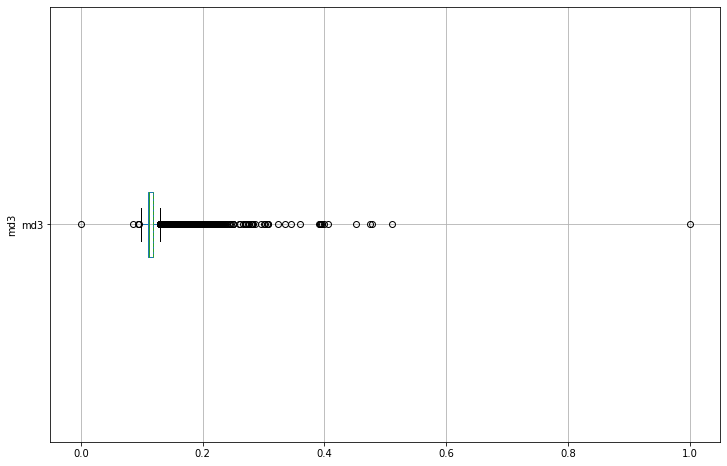

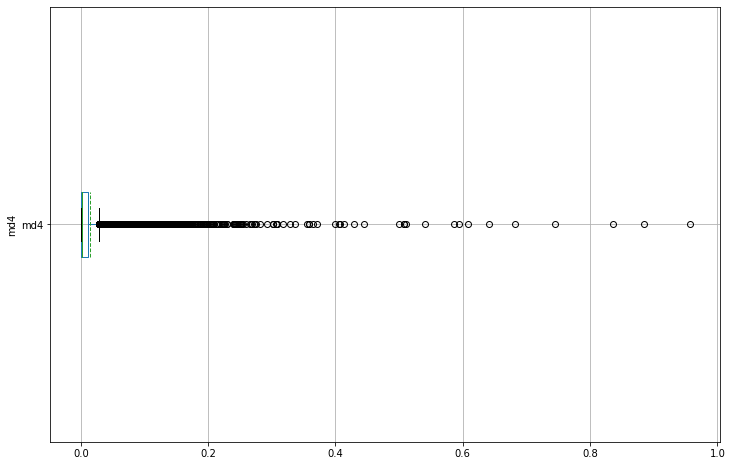

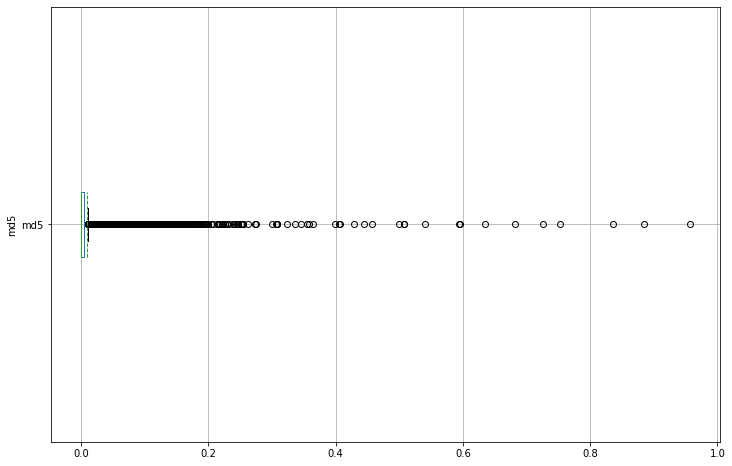

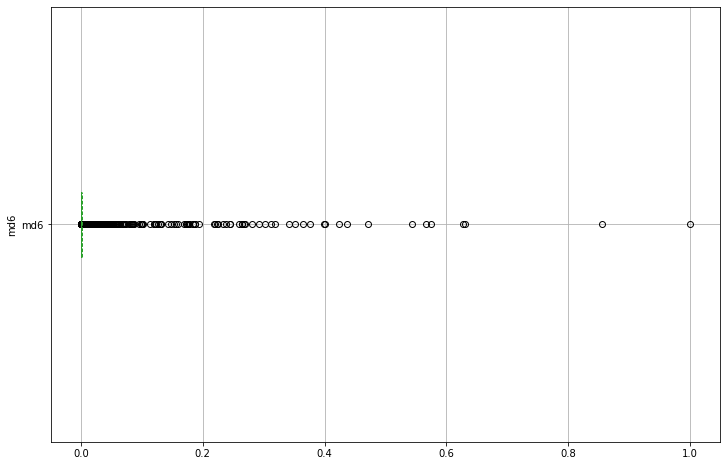

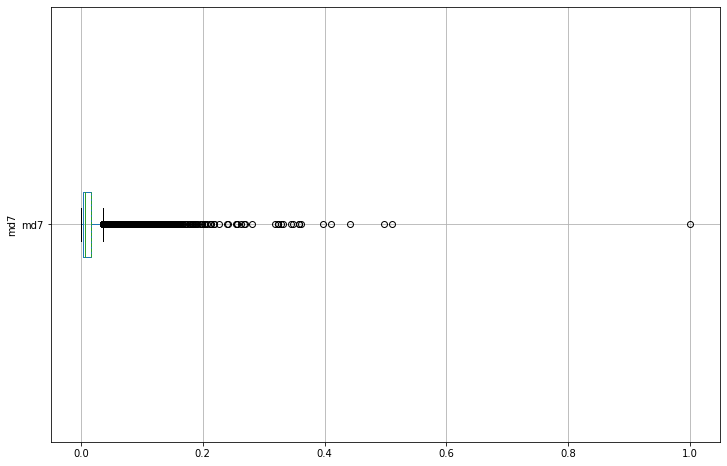

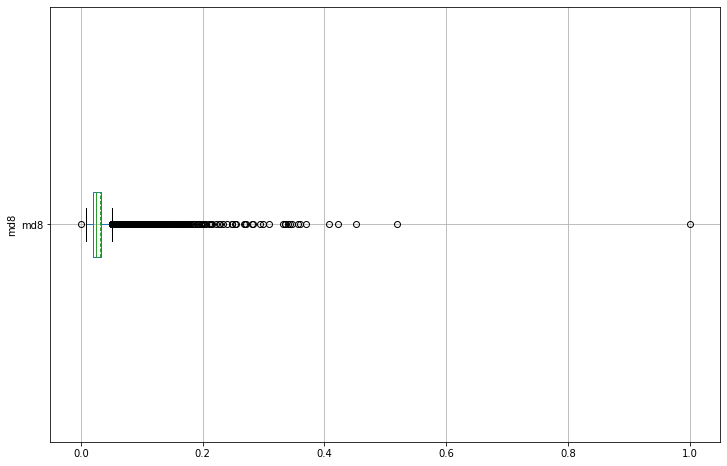

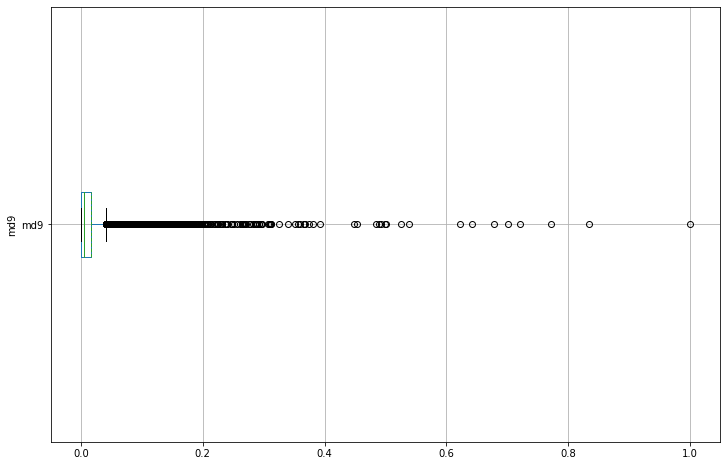

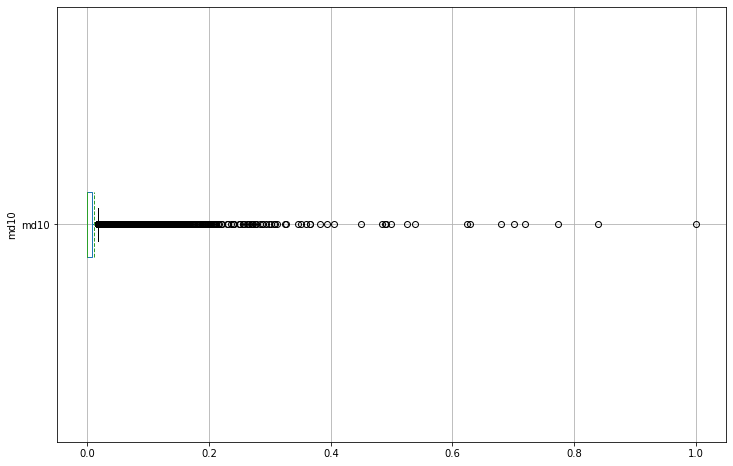

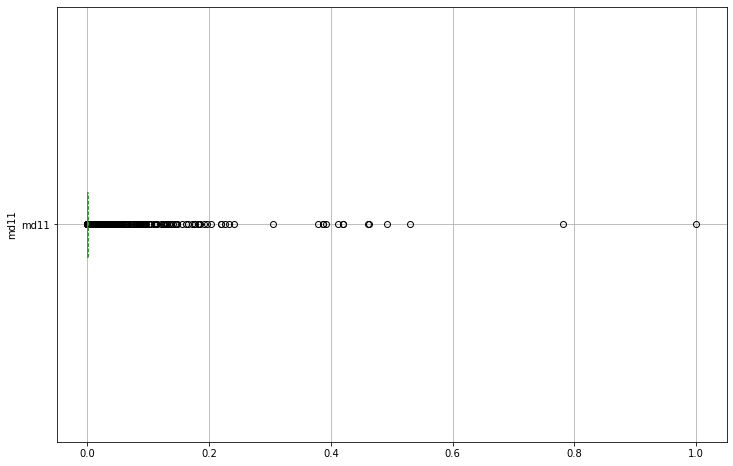

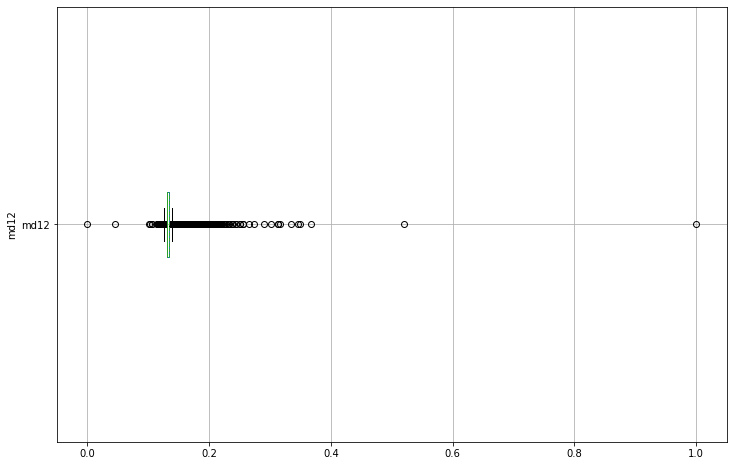

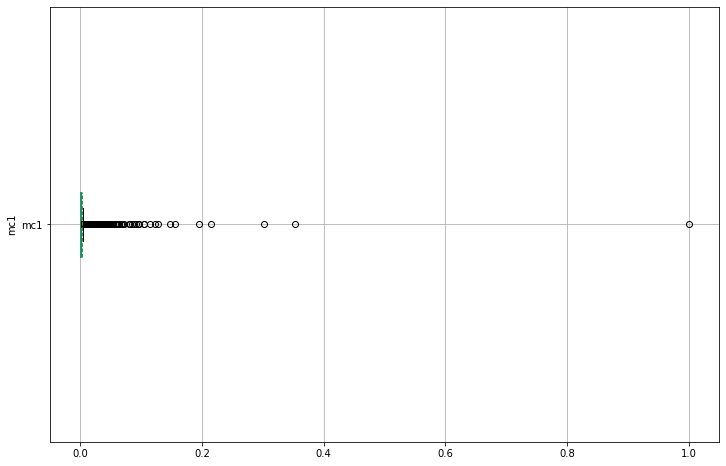

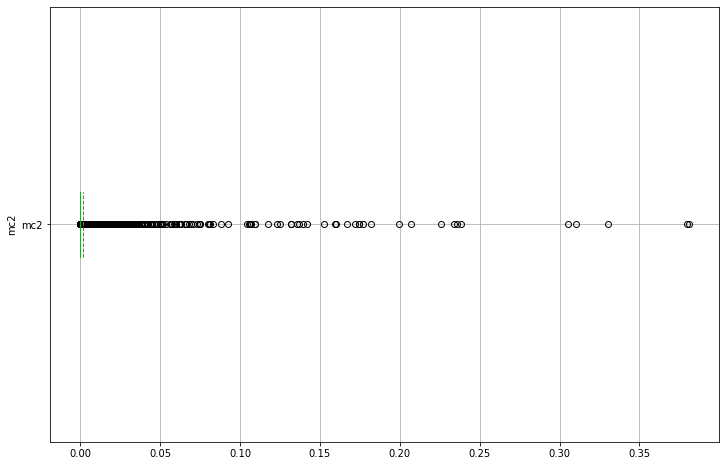

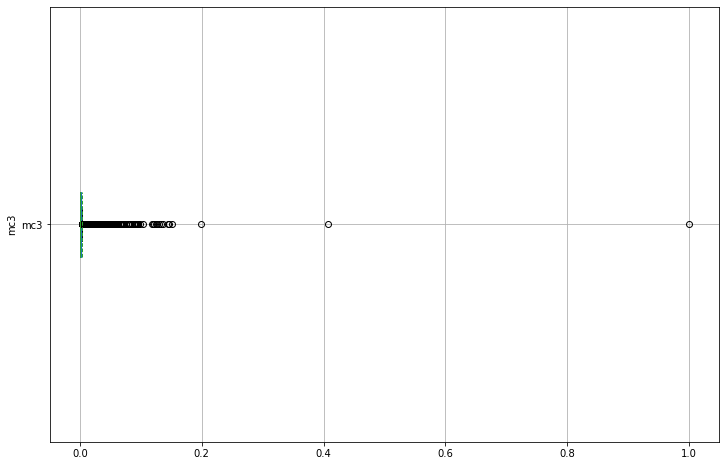

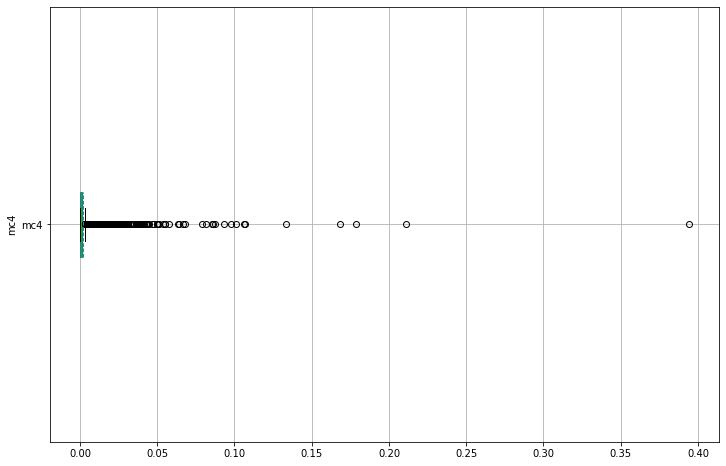

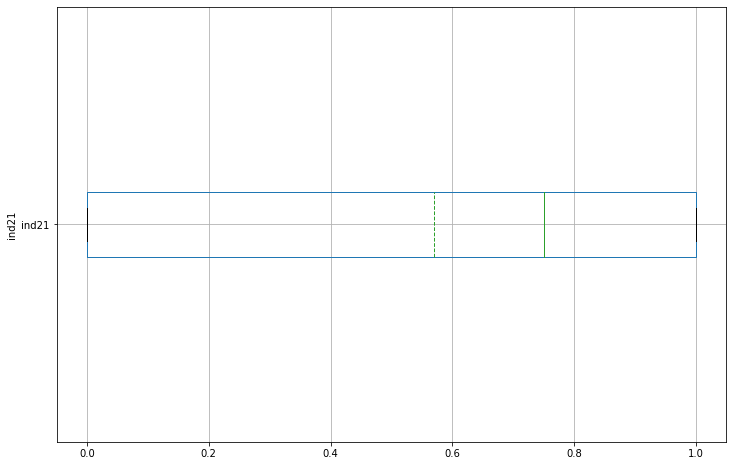

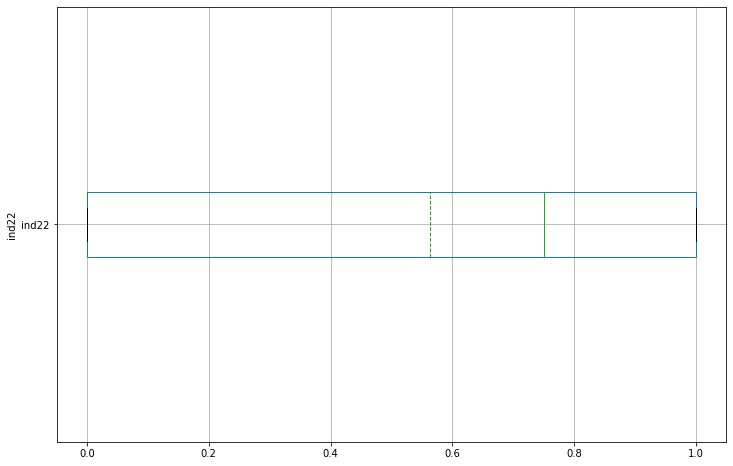

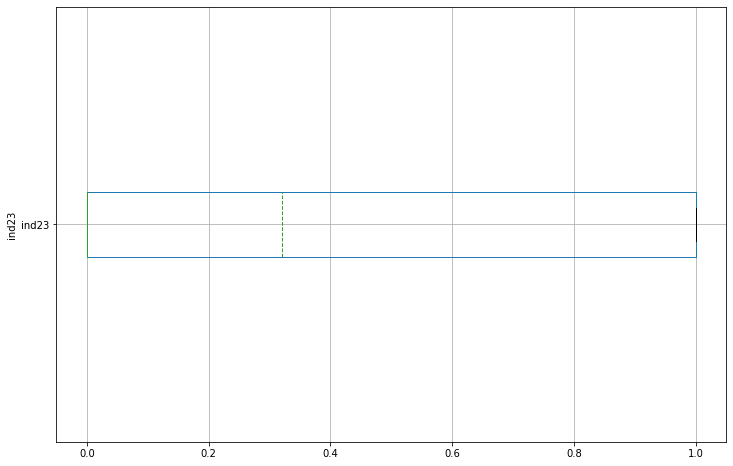

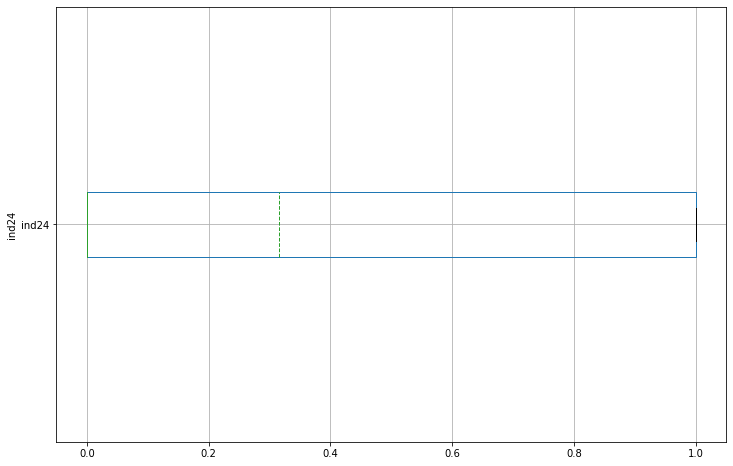

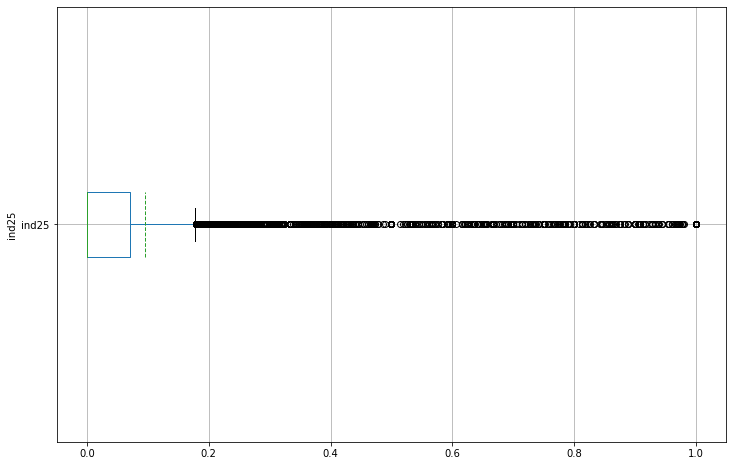

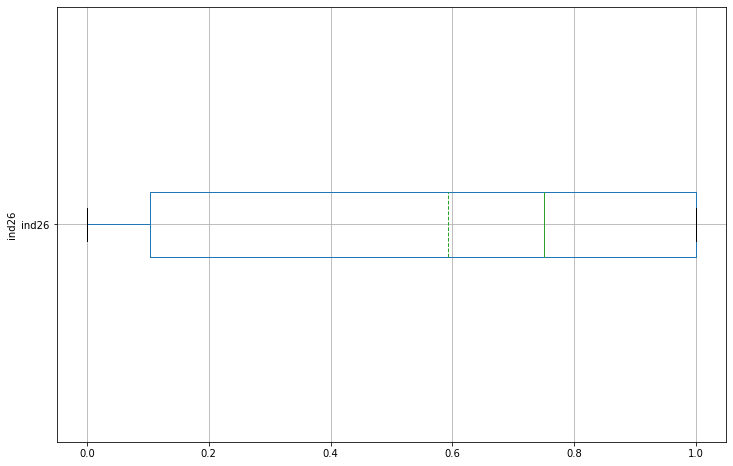

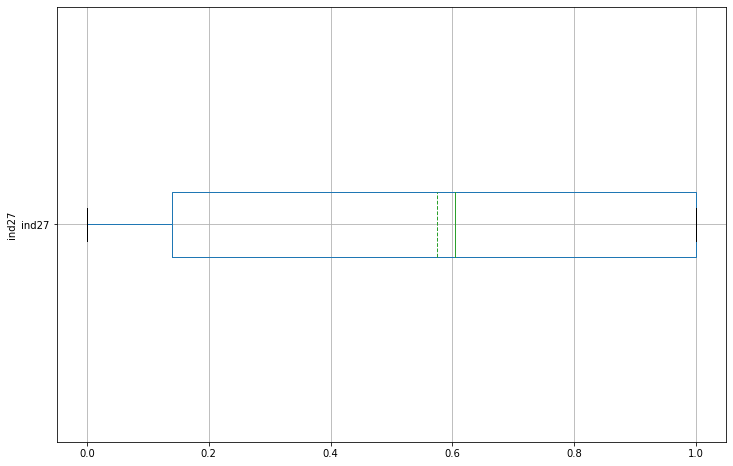

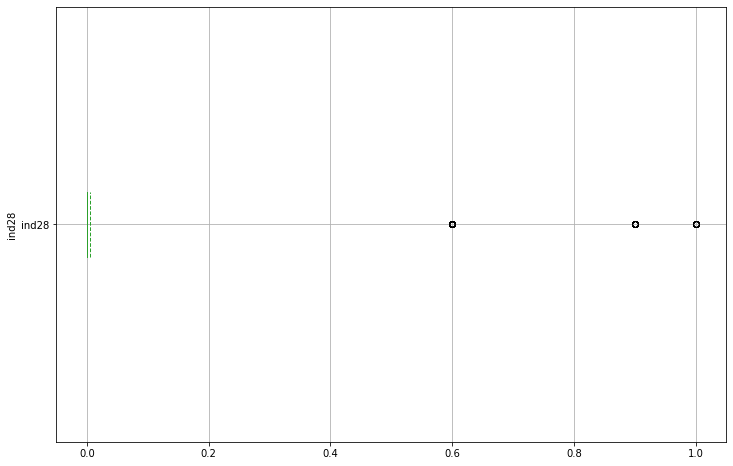

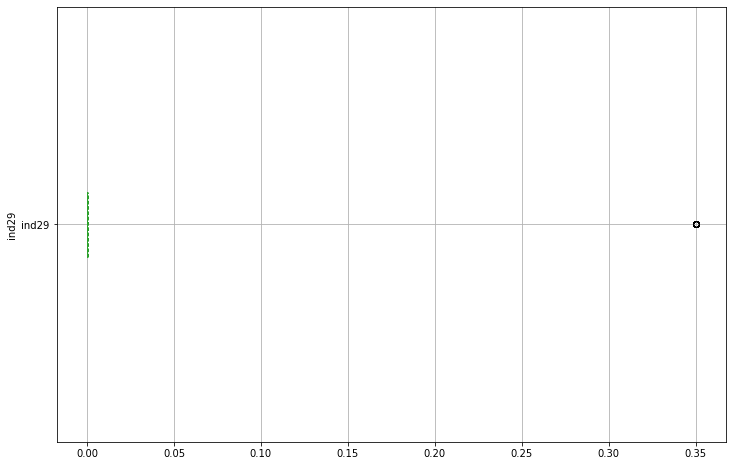

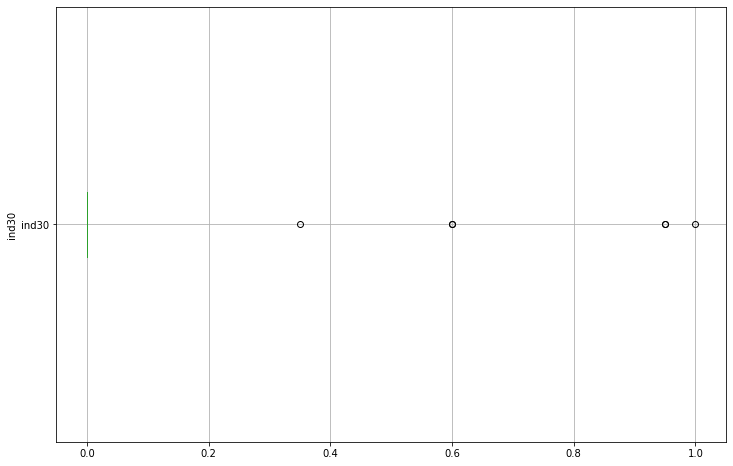

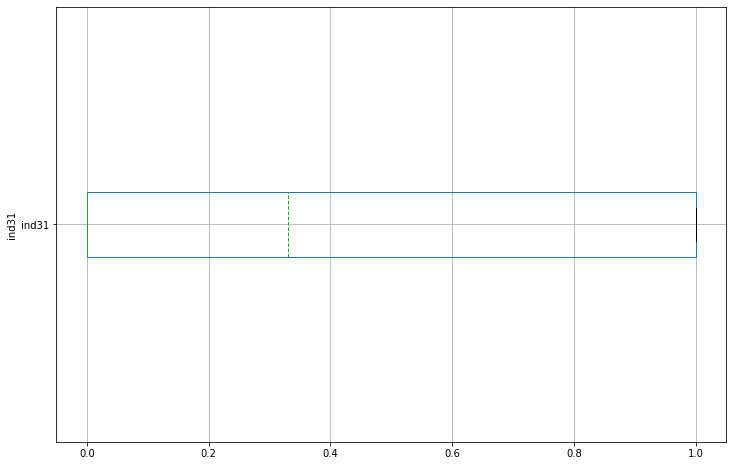

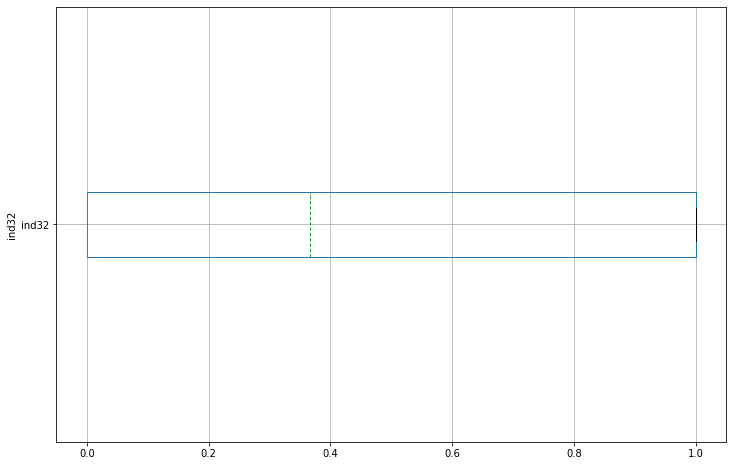

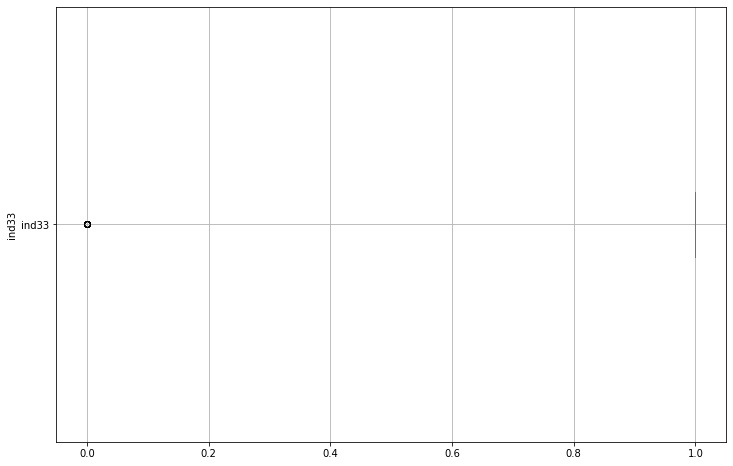

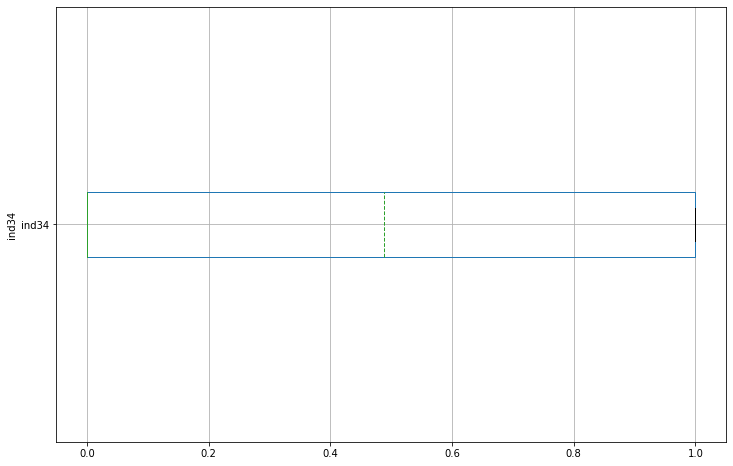

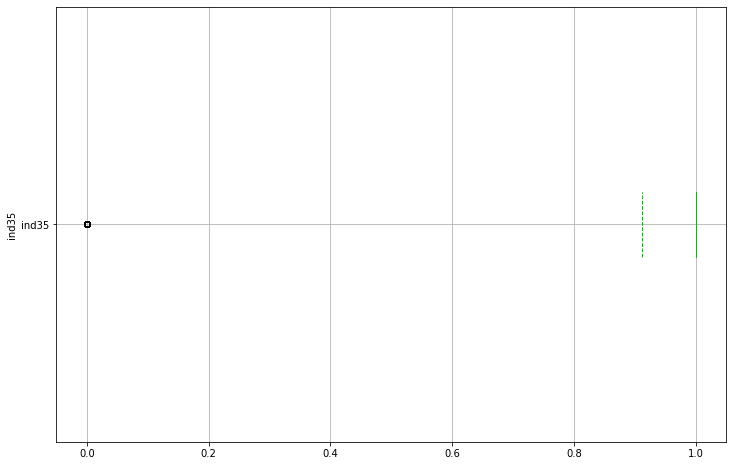

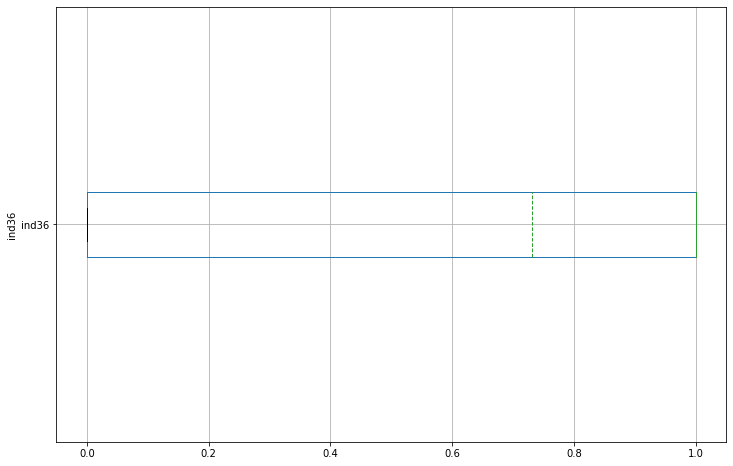

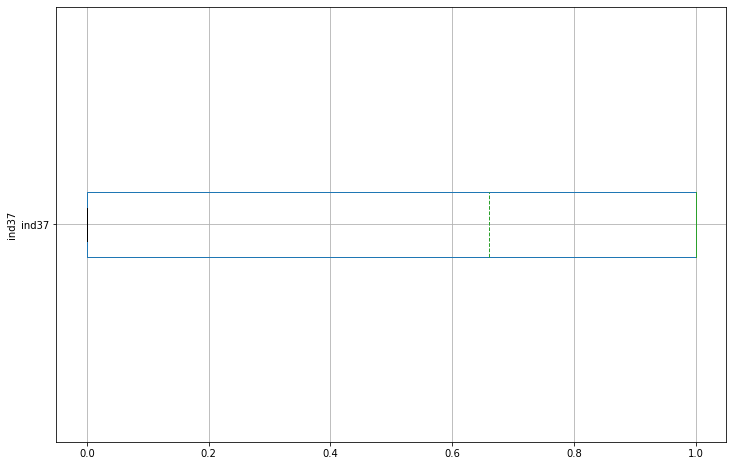

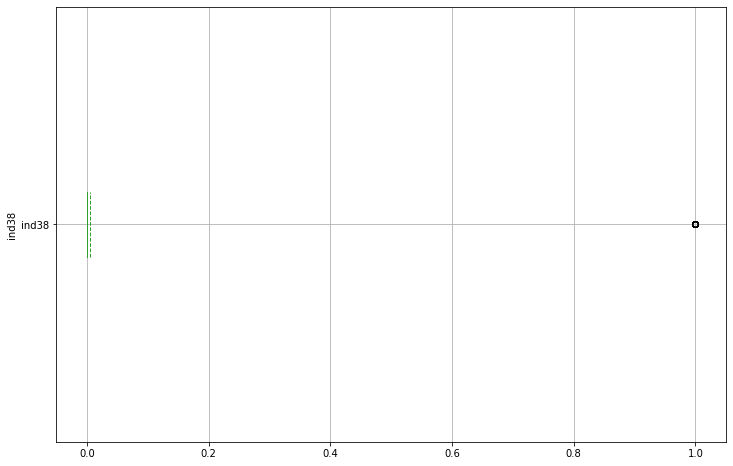

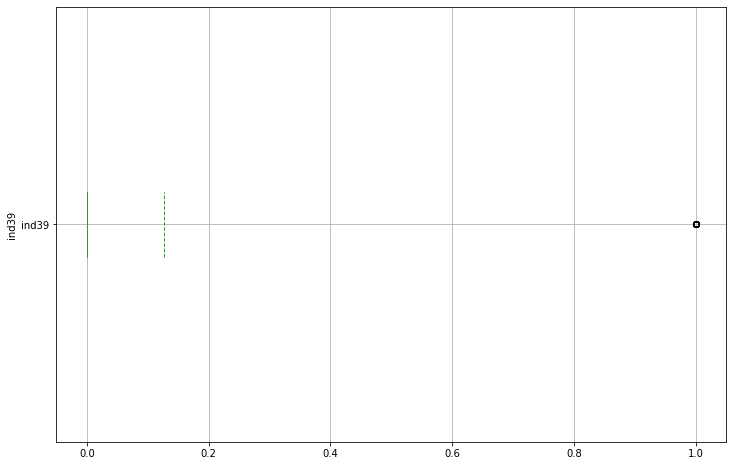

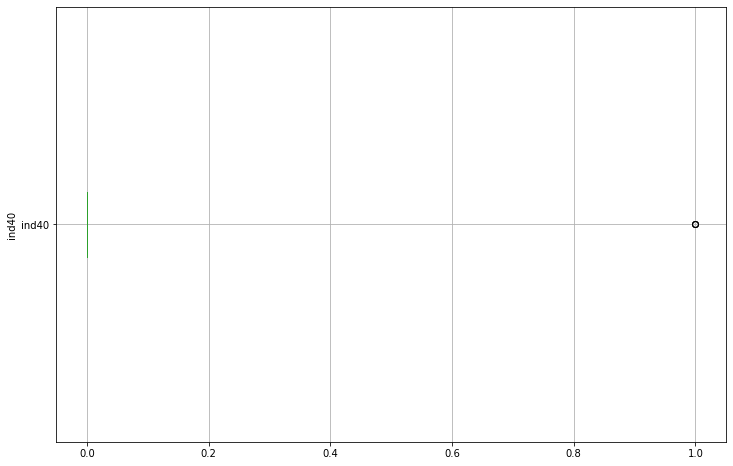

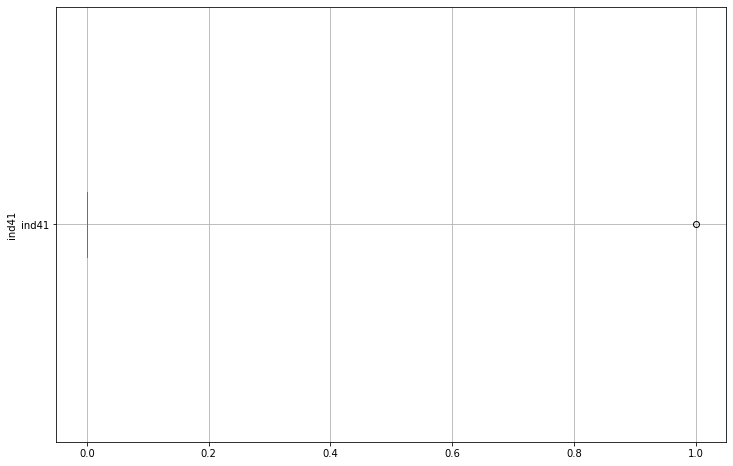

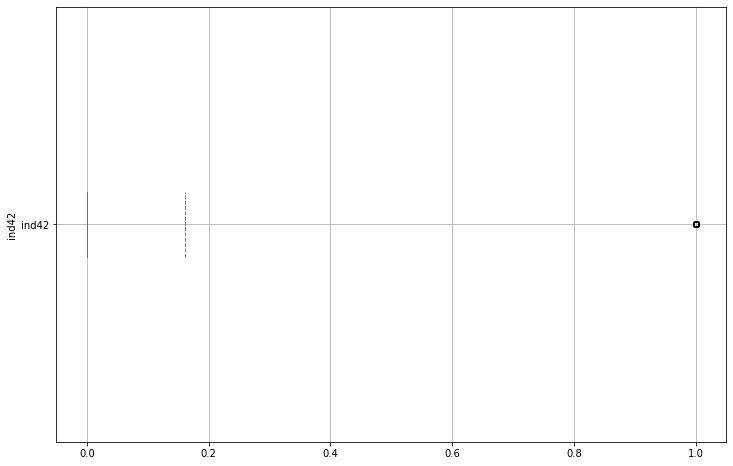

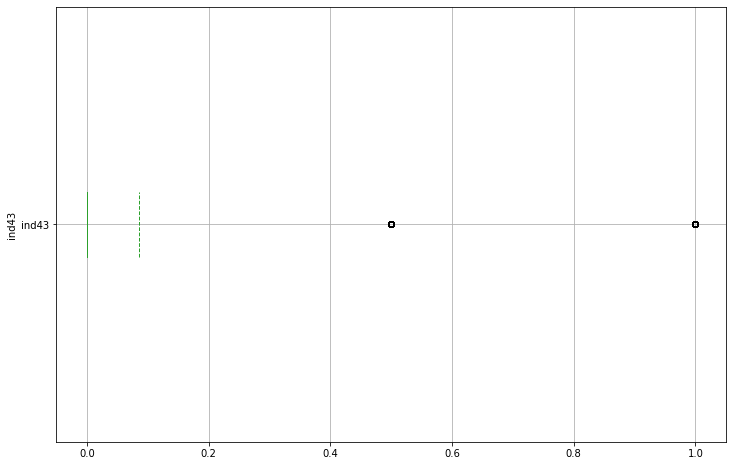

In [ ]:
#DEPOIS DE TRATAR missing
#outliers demais
for d in l_demais:
    df4[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
df4.columns

Index(['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10',
       'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind21', 'ind22', 'ind23',
       'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31',
       'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39',
       'ind40', 'ind41', 'ind42', 'ind43'],
      dtype='object')

In [ ]:
#l_out_md_mc_ind2143 =['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10',
       'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind25','ind28', 'ind29', 'ind30','ind33', 'ind35','ind38', 'ind39',
       'ind40', 'ind41', 'ind42', 'ind43' ]

#l_out_mc_ind2143_inf = ['ind33', 'ind35', 'md3', 'md8', 'md11', 'md12']

In [ ]:
'''for u in l_out_md_mc_ind2143:
    df_rec_trei, limite_superior_outliers = trata_outliers(df=df_rec_trei, coluna=u)

++++++++
coluna: md1
IQR: 0.00603226914163212
Limite inferior para outlier: -0.009045826331565724; Limite superior para outliers: 0.015083250234962757
Media: 0.011669523491646034
++++++++
coluna: md2
IQR: 0.010317917138124827
Limite inferior para outlier: -0.013054929071653832; Limite superior para outliers: 0.028216739480845476
Media: 0.012927650570991408
++++++++
coluna: md3
IQR: 0.007825731774469255
Limite inferior para outlier: 0.0983384817153378; Limite superior para outliers: 0.12964140881321481
Media: 0.11826675569728777
++++++++
coluna: md4
IQR: 0.011236401576681609
Limite inferior para outlier: -0.01685460236502241; Limite superior para outliers: 0.02809100394170402
Media: 0.013957640580040268
++++++++
coluna: md5
IQR: 0.004188881583286521
Limite inferior para outlier: -0.006283322374929781; Limite superior para outliers: 0.0104722039582163
Media: 0.009200155175519746
++++++++
coluna: md6
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.0

In [ ]:
'''for q in l_out_mc_ind2143_inf:
    df_rec_trei, limite_superior_outliers = trata_outliers_inf(df=df_rec_trei, coluna=u)

++++++++
coluna: ind43
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.08596936463337261
++++++++
coluna: ind43
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.08596936463337261
++++++++
coluna: ind43
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.08596936463337261
++++++++
coluna: ind43
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.08596936463337261
++++++++
coluna: ind43
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.08596936463337261
++++++++
coluna: ind43
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.08596936463337261


In [ ]:
'''df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,...,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind33_o,ind35_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,...,0.0,0.0281,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,...,0.0,0.0000,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,...,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,...,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,...,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.126892,0.0,0.0,0.161425,0.085969


In [ ]:
'''df_rec_trei.shape

(11033, 103)

In [ ]:
'''df_trei_copy = df_rec_trei.copy()

In [ ]:
'''l_out_ind0120

['ind01',
 'ind02',
 'ind09',
 'ind10',
 'ind11',
 'ind12',
 'ind13',
 'ind14',
 'ind15',
 'ind16',
 'ind17',
 'ind18']

In [ ]:
'''l_out_md_mc_ind2143

['md1',
 'md2',
 'md3',
 'md4',
 'md5',
 'md6',
 'md7',
 'md8',
 'md9',
 'md10',
 'md11',
 'md12',
 'mc1',
 'mc2',
 'mc3',
 'mc4',
 'ind25',
 'ind28',
 'ind29',
 'ind30',
 'ind38',
 'ind39',
 'ind40',
 'ind41',
 'ind42',
 'ind43']

In [ ]:
'''df_trei_copy.drop(columns=['ind01', 'ind02', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18','md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','ind25', 'ind28', 'ind29', 'ind30',
       'ind38', 'ind39', 'ind40', 'ind41', 'ind42', 'ind43'], inplace=True)

In [ ]:
'''df_trei_copy.head()

,id,cnae2,rf2,ind03,ind04,ind05,ind06,ind07,ind08,ind19,ind20,ind21,ind22,ind23,ind24,ind26,ind27,ind31,ind32,ind33,ind34,ind35,ind36,ind37,target,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,0,86,i,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0333,0.1000,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,0.0,0.0281,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,18,z,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.4444,0.2222,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0.0,0.0000,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,2,74,z,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,1.0,1.0000,1.00,1.00,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,3,49,q,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.1667,0.1667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,4,47,i,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,0.0,0.126892,0.0,0.0,0.161425,0.085969


In [ ]:
'''df_trei_copy.shape

(11033, 63)

####AUTO ML

In [ ]:
df_rec_excluir.head()

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind12_o,ind13_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind30_o,ind31_o,ind32_o,ind34_o,ind36_o,ind37_o,ind38_o,ind42_o
0,-1.730870,1.654273,0.338212,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.130930,0.002267,0.000138,0.001772,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000
1,-1.730582,-1.765493,-1.033283,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.134558,0.003186,0.002602,0.001772,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.140845,0.0286,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000
2,-1.730293,1.050785,-1.033283,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.130405,0.000015,0.000050,0.000209,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.000000,0.0000,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000
3,-1.730005,-0.206482,1.709708,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.134558,0.000438,0.000042,0.000115,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.000000,0.0000,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
4,-1.729717,-0.307064,0.338212,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.131285,0.001925,0.002602,0.000719,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.000000,0.0000,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161425


In [ ]:
df_rec_excluir.shape

(11033, 44)

In [ ]:
l_exc = list(df_rec_excluir.columns)

In [ ]:
#DEPOIS DE TRATAR missing
#outliers demais
for d in l_exc:
    df4[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
df_rec_excluir.columns[:45]

Index(['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o', 'ind02_o', 'ind03_o', 'ind04_o', 'ind05_o',
       'ind06_o', 'ind07_o', 'ind08_o', 'ind12_o', 'ind13_o', 'ind19_o',
       'ind20_o', 'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o',
       'ind26_o', 'ind27_o', 'ind30_o', 'ind31_o', 'ind32_o', 'ind34_o',
       'ind36_o', 'ind37_o', 'ind38_o', 'ind42_o'],
      dtype='object')

In [ ]:
clf = setup(data = df_rec_excluir,
            target = 'target',
            numeric_features = ['cnae2', 'rf2', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o', 'ind02_o', 'ind03_o', 'ind04_o', 'ind05_o',
       'ind06_o', 'ind07_o', 'ind08_o', 'ind12_o', 'ind13_o', 'ind19_o',
       'ind20_o', 'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o',
       'ind26_o', 'ind27_o', 'ind30_o', 'ind31_o', 'ind32_o', 'ind34_o',
       'ind36_o', 'ind37_o', 'ind38_o', 'ind42_o'], 
            #numeric_imputation = 'mean'
            #categorical_features = ['seniorcitizen', 'onlinesecurity', 'streamingmovies',
            #                        'phoneservice_No', 'phoneservice_Yes', 'internetservice_Fiber optic',
            #                        'contract_Month-to-month', 'paperlessbilling_No',
            #                        'paperlessbilling_Yes', 'paymentmethod_Mailed check'], # lista das variáveis categóricas
            ignore_features = ['id'],
            silent = False)

,Description,Value
0,session_id,8888
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(11033, 44)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7694,0.7046,0.0542,0.5409,0.0980,0.0573,0.1106,1.627
svm,SVM - Linear Kernel,0.7682,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.093
ridge,Ridge Classifier,0.7681,0.0000,0.0078,0.4267,0.0153,0.0080,0.0319,0.035
gbc,Gradient Boosting Classifier,0.7677,0.7173,0.0413,0.5122,0.0762,0.0415,0.0891,2.762
lr,Logistic Regression,0.7676,0.6757,0.0106,0.4121,0.0206,0.0099,0.0341,0.428
catboost,CatBoost Classifier,0.7646,0.7241,0.0978,0.4678,0.1612,0.0877,0.1252,10.476
lda,Linear Discriminant Analysis,0.7629,0.6937,0.0575,0.4181,0.1009,0.0475,0.0797,0.078
et,Extra Trees Classifier,0.7628,0.6936,0.0575,0.4302,0.1011,0.0475,0.0819,1.094
ada,Ada Boost Classifier,0.7589,0.7052,0.0832,0.4062,0.1374,0.0635,0.0913,0.692
lightgbm,Light Gradient Boosting Machine,0.7576,0.7156,0.1257,0.4291,0.1941,0.0983,0.1249,0.362


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8888, verbose=0,
                       warm_start=False)

In [ ]:
rid = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.0,0.0343,0.4286,0.0635,0.0310,0.0656
1,0.7775,0.0,0.0514,0.6000,0.0947,0.0612,0.1256
2,0.7788,0.0,0.0511,0.6923,0.0952,0.0660,0.1449
3,0.7746,0.0,0.0286,0.5556,0.0543,0.0329,0.0853
4,0.7837,0.0,0.0629,0.7857,0.1164,0.0857,0.1815
5,0.7785,0.0,0.0571,0.6250,0.1047,0.0694,0.1384
6,0.7694,0.0,0.0286,0.3846,0.0532,0.0225,0.0494
7,0.7772,0.0,0.0514,0.6000,0.0947,0.0611,0.1255
8,0.7746,0.0,0.0571,0.5263,0.1031,0.0614,0.1137
9,0.7733,0.0,0.0286,0.5000,0.0541,0.0303,0.0748


In [ ]:
tuned_rid = tune_model(rid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.0,0.0114,0.3333,0.0221,0.0072,0.0226
1,0.7762,0.0,0.0229,0.6667,0.0442,0.0296,0.0930
2,0.7749,0.0,0.0170,0.7500,0.0333,0.0235,0.0898
3,0.7759,0.0,0.0171,0.7500,0.0335,0.0236,0.0902
4,0.7785,0.0,0.0229,1.0000,0.0447,0.0349,0.1333
5,0.7785,0.0,0.0286,0.8333,0.0552,0.0408,0.1282
6,0.7733,0.0,0.0171,0.5000,0.0331,0.0184,0.0578
7,0.7746,0.0,0.0114,0.6667,0.0225,0.0149,0.0656
8,0.7759,0.0,0.0229,0.6667,0.0442,0.0296,0.0930
9,0.7733,0.0,0.0057,0.5000,0.0113,0.0062,0.0333


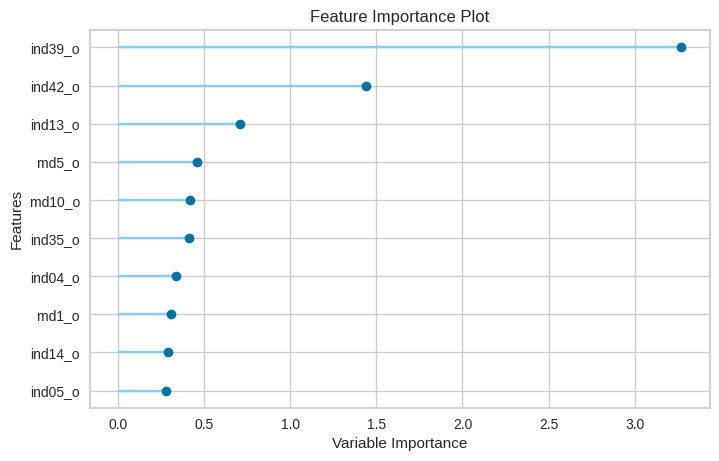

In [ ]:
plot_model(estimator = tuned_rid, plot = 'feature')

In [ ]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.7476,0.1356,0.5000,0.2133,0.1282,0.1660
1,0.7710,0.7295,0.1412,0.5000,0.2203,0.1328,0.1696
2,0.7684,0.7483,0.1299,0.4792,0.2044,0.1183,0.1532
3,0.7966,0.7561,0.1818,0.7111,0.2896,0.2169,0.2865
4,0.7850,0.7689,0.1648,0.6042,0.2589,0.1787,0.2309
5,0.7785,0.7355,0.1307,0.5610,0.2120,0.1377,0.1880
6,0.7785,0.7323,0.1751,0.5536,0.2661,0.1752,0.2158
7,0.7733,0.7223,0.1073,0.5278,0.1784,0.1094,0.1570
8,0.7772,0.7451,0.1412,0.5556,0.2252,0.1458,0.1931
9,0.7707,0.7278,0.1299,0.5000,0.2063,0.1234,0.1621


In [ ]:
cat.get_params

In [ ]:
tuned_cat = tune_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7749,0.7360,0.0678,0.5714,0.1212,0.0763,0.1362
1,0.7723,0.7292,0.0282,0.5556,0.0538,0.0323,0.0844
2,0.7684,0.7182,0.0452,0.4444,0.0821,0.0415,0.0792
3,0.7824,0.7584,0.0682,0.7500,0.1250,0.0904,0.1810
4,0.7746,0.7570,0.0511,0.5625,0.0938,0.0580,0.1160
5,0.7798,0.7149,0.0511,0.7500,0.0957,0.0686,0.1564
6,0.7811,0.7069,0.0734,0.7222,0.1333,0.0950,0.1812
7,0.7811,0.7071,0.0734,0.7222,0.1333,0.0950,0.1812
8,0.7798,0.7228,0.0791,0.6667,0.1414,0.0975,0.1740
9,0.7707,0.7302,0.0395,0.5000,0.0733,0.0411,0.0875


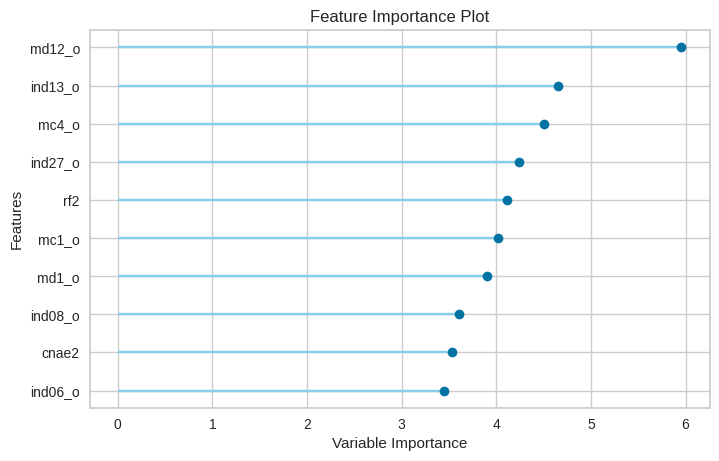

In [ ]:
plot_model(estimator = tuned_cat, plot = 'feature')

###REDE NEURAL

In [ ]:
df_rec_trei_antes_t.head()

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,-1.730870,1.654273,0.338212,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,-1.730582,-1.765493,-1.033283,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,-1.730293,1.050785,-1.033283,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,-1.730005,-0.206482,1.709708,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,-1.729717,-0.307064,0.338212,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.126892,0.0,0.0,0.161425,0.085969


In [ ]:
df_ind01 = df_rec_trei_antes_t['ind01_o'].value_counts()
df_ind01

0.000000    9761
0.106393    1272
Name: ind01_o, dtype: int64

In [ ]:
df_rec_trei_antes_t['ind01_o'].value_counts()/df_rec_trei_antes_t.shape[0] 

0.000000    0.88471
0.106393    0.11529
Name: ind01_o, dtype: float64

In [ ]:
l_lista_num =['md1_o', 'md2_o', 'md3_o', 'md4_o',
                                'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
                                'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
                                'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
                                'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
                                'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
                                'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
                                'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
                                'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
                                'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o']


In [ ]:
for j in l_lista_num:
    print(f'++++++')
    print(f'coluna: {j}')
    print(df_rec_trei_antes_t[j].value_counts()/df_rec_trei_antes_t.shape[0] )


++++++
coluna: md1_o
1.166952e-02    0.150276
0.000000e+00    0.123448
2.162232e-09    0.003082
4.324465e-09    0.002175
8.648929e-09    0.001631
                  ...   
1.262744e-06    0.000091
6.478878e-03    0.000091
1.540067e-03    0.000091
5.559177e-03    0.000091
4.480383e-04    0.000091
Name: md1_o, Length: 7172, dtype: float64
++++++
coluna: md2_o
0.012928    0.107043
0.015110    0.000725
0.001655    0.000634
0.001986    0.000544
0.004966    0.000544
              ...   
0.001081    0.000091
0.022229    0.000091
0.006621    0.000091
0.004853    0.000091
0.012397    0.000091
Name: md2_o, Length: 9789, dtype: float64
++++++
coluna: md3_o
0.118267    0.109399
0.108862    0.001450
0.120872    0.000725
0.111818    0.000544
0.109971    0.000363
              ...   
0.109895    0.000091
0.113298    0.000091
0.127316    0.000091
0.113301    0.000091
0.121783    0.000091
Name: md3_o, Length: 9762, dtype: float64
++++++
coluna: md4_o
0.000000e+00    0.250884
1.395764e-02    0.121273
1.5

In [ ]:
df_rec_excluir = df_rec_trei_antes_t.copy()

In [ ]:
l_lista_num =['md1_o', 'md2_o', 'md3_o', 'md4_o',
                                'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
                                'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
                                'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
                                'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
                                'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
                                'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
                                'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
                                'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
                                'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o']


In [ ]:
df_rec_excluir.drop(columns=['ind09_o', 'ind10_o', 'ind11_o', 'ind14_o',
                                'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind28_o', 'ind29_o', 'ind33_o','ind35_o', 'ind40_o', 'ind41_o'], inplace= True)

In [ ]:
df_rec_excluir.drop(columns=['md11_o','mc2_o', 'ind01_o','ind39_o','ind43_o' ], inplace= True)

In [ ]:
df_rec_excluir.shape

(11033, 44)

In [ ]:
X_rec = df_rec_excluir.copy()
X_rec= X_rec.drop(columns= ['target'])
y_rec= df_rec_excluir['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_rec, y_rec, test_size = 0.2, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste= {X_teste.shape}')

X: Treinamento=  (8826, 43); X: Teste= (2207, 43)


In [ ]:
print(f'Y: Treinamento=  {y_treinamento.shape}; Y: Teste= {y_teste.shape}')

Y: Treinamento=  (8826,); Y: Teste= (2207,)


In [ ]:
X_rec.shape[1]

43

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from tensorflow import keras

In [ ]:
np.set_printoptions(precision = 5)

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
# Número de Neurônios na Input Layer:
N_I = X_rec.shape[1]

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 128
N_H1 = 128
N_H2 = 128
N_H3 = 128
N_H4 = 128
N_H5 = 128
N_H6 = 128
N_H7 = 128

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.swish

# Função de Ativação da Output Layer:
FA_O = tf.nn.swish

In [ ]:
#np.random.seed(20111974)
#tf.random.set_seed(20111974)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN = Sequential()
RN.add(Dense(units = N_H, input_dim = N_I, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H1, input_dim = N_I, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H2, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H3, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H4, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H5, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H6, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H7, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))

RN.add(Dense(units = N_O, activation = FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_64 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_65 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)             

In [ ]:
algoritmo_otimizacao = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name= 'Adam')
loss_function = tf.keras.losses.BinaryCrossentropy()
metrica_performance = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = algoritmo_otimizacao, loss = loss_function, metrics = metrica_performance)

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
RNA_processo = RN.fit(X_treinamento, y_treinamento, epochs = 1000, validation_data = (X_teste, y_teste), callbacks = callbacks)

Epoch 1/1000
276/276 [==============================] - 1s 5ms/step - loss: 2.5053 - binary_accuracy: 0.7632 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 2/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 3/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 4/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 5/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 6/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 7/1000
276/276 [==============================

####ANALISE TESTE

In [ ]:
df_rec_test.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43'],
      dtype='object')

In [ ]:
l_rec_test_ind01_18 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18']
l_rec_test_ind21_43 =[ 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [ ]:
df5_test = df_rec_test[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']]

In [ ]:
l_rec_test_ind19_20 =['ind19', 'ind20']

In [ ]:
for i in l_rec_test_ind01_18:
    print(f'coluna: {i}')
    print(f'mode: {df_rec_test[i].mode()}')
    print(f'mediana: {df_rec_test[i].median()}')  
    print(f'+++++++++++')

coluna: ind01
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind02
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind03
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind04
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind05
mode: 0    0.0
dtype: float64
mediana: 0.021100000000000008
+++++++++++
coluna: ind06
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind07
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind08
mode: 0    0.0
dtype: float64
mediana: 0.019299999999999984
+++++++++++
coluna: ind09
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind10
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind11
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind12
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind13
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind14
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++


In [ ]:
#opção de substituir tudo pela moda dos ind01 a ind18

for i in l_rec_test_ind01_18:
    df_rec_test[i].fillna(0.0, inplace=True)

In [ ]:
#opção de substituir tudo pela moda dos ind01 a ind18

for i in l_rec_test_ind19_20:
    df_rec_test[i].fillna(1.0, inplace=True)

In [ ]:
for i in l_rec_test_ind21_43:
    print(f'indicador: {i}')
    print(f'mode: {df_rec_test[i].mode()}')
    print(f'mediana: {df_rec_test[i].median()}')  
    print(f'+++++++++++')

indicador: ind21
mode: 0    1.0
dtype: float64
mediana: 0.5
+++++++++++
indicador: ind22
mode: 0    1.0
dtype: float64
mediana: 0.5832999999999999
+++++++++++
indicador: ind23
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
indicador: ind24
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
indicador: ind25
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind26
mode: 0    1.0
dtype: float64
mediana: 0.5417000000000001
+++++++++++
indicador: ind27
mode: 0    1.0
dtype: float64
mediana: 0.5
+++++++++++
indicador: ind28
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind29
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind30
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind31
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind32
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind33
mode: 0    1.0
dtype: float64
mediana: 1.0
+++++++++++
in